In [1]:
from distribution_fit_class import DistributionFit
from portfolio_optimization_class import PortfolioOptimization, optimize_windows
import pandas as pd
import numpy as np

In [3]:
# distribution_fit = DistributionFit()
# file_path = r'data\random_data\n_stocks_per_sector.csv'
# distribution_fit.load_df_from_csv(file_path)

# returns_df = pd.read_csv(r'data\random_data\n_stocks_per_sector.csv', index_col=0, parse_dates=True)

copulas = ["clayton_random", "gaussian", "t_student"]
distributions = ["gauss_dist", "t_dist"]
window_size = 32

In [4]:
taus = [0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2]
maximum_weight = 0.3

In [ ]:

all_tau_dfs = []

for tau in taus:
    tau_results = []

    for copula in copulas:
        model_aggregation = []

        for window in range(3, 63): # 60 WINDOWS INSTEAD OF 64 AS THERE WERE PROBLEMS WITH CALCULATIONS (first 3 windows invalid values, last windows contains NaNs)
            if window % 5 == 0:
                print(f'Iter: {copula} - {window}, tau: {tau}')
            for dist in distributions:
                tau_str = str(tau).replace(".", "_")
                input_path = r"../scores/taus/" + f'tau_{tau_str}/{copula}_22_stocks_{window}_window_{dist}_tau_{tau_str}_SCORES.csv'
                try:
                    df = pd.read_csv(input_path, index_col=0)

                    statistics = {
                        'Window': window,
                        'Copula': copula,
                        'Distribution': dist,
                        'mean_validation': df['Expected Validation Value'].mean(),
                        'std_validation': df['Expected Validation Value'].std(),
                        'p1_validation': np.percentile(df['Expected Validation Value'], 1),
                        'p5_validation': np.percentile(df['Expected Validation Value'], 5),
                        'p95_validation': np.percentile(df['Expected Validation Value'], 95),
                        'p99_validation': np.percentile(df['Expected Validation Value'], 99),

                        'mean_scoring': df['Expected Scoring Value'].mean(),
                        'std_scoring': df['Expected Scoring Value'].std(),
                        'p1_scoring': np.percentile(df['Expected Scoring Value'], 1),
                        'p5_scoring': np.percentile(df['Expected Scoring Value'], 5),
                        'p95_scoring': np.percentile(df['Expected Scoring Value'], 95),
                        'p99_scoring': np.percentile(df['Expected Scoring Value'], 99),
                    }

                    model_aggregation.append(statistics) # (copula + distribution)

                except FileNotFoundError:
                    print(f"FILE '{input_path}' NOT FOUND")
                    continue

        tau_df = pd.DataFrame(model_aggregation) # Fixed tau
        tau_results.append(tau_df)

    all_tau_dfs.append(tau_results)


Iter: clayton_random - 5, tau: 0.0005
Iter: clayton_random - 10, tau: 0.0005
Iter: clayton_random - 15, tau: 0.0005
Iter: clayton_random - 20, tau: 0.0005
Iter: clayton_random - 25, tau: 0.0005
Iter: clayton_random - 30, tau: 0.0005
Iter: clayton_random - 35, tau: 0.0005
Iter: clayton_random - 40, tau: 0.0005
Iter: clayton_random - 45, tau: 0.0005
Iter: clayton_random - 50, tau: 0.0005
Iter: clayton_random - 55, tau: 0.0005
Iter: clayton_random - 60, tau: 0.0005
Iter: gaussian - 5, tau: 0.0005
Iter: gaussian - 10, tau: 0.0005
Iter: gaussian - 15, tau: 0.0005
Iter: gaussian - 20, tau: 0.0005
Iter: gaussian - 25, tau: 0.0005
Iter: gaussian - 30, tau: 0.0005
Iter: gaussian - 35, tau: 0.0005
Iter: gaussian - 40, tau: 0.0005
Iter: gaussian - 45, tau: 0.0005
Iter: gaussian - 50, tau: 0.0005
Iter: gaussian - 55, tau: 0.0005
Iter: gaussian - 60, tau: 0.0005
Iter: t_student - 5, tau: 0.0005
Iter: t_student - 10, tau: 0.0005
Iter: t_student - 15, tau: 0.0005
Iter: t_student - 20, tau: 0.0005
Ite

In [131]:

# all_tau_dfs[1][2][all_tau_dfs[1][2]["mean_validation"] < -0.002]
all_tau_dfs[7][0]

Window          Copula Distribution  mean_validation  std_validation  \
0         3  clayton_random   gauss_dist        -0.011951        0.001836   
1         3  clayton_random       t_dist        -0.011882        0.001804   
2         4  clayton_random   gauss_dist        -0.011935        0.001993   
3         4  clayton_random       t_dist        -0.011822        0.001946   
4         5  clayton_random   gauss_dist        -0.001537        0.001104   
..      ...             ...          ...              ...             ...   
115      60  clayton_random       t_dist        -0.001924        0.000151   
116      61  clayton_random   gauss_dist        -0.001890        0.000160   
117      61  clayton_random       t_dist        -0.001801        0.000159   
118      62  clayton_random   gauss_dist        -0.001688        0.000051   
119      62  clayton_random       t_dist        -0.001628        0.000026   

     p1_validation  p5_validation  p95_validation  p99_validation  \
0        -0.018140      -0.015653       -0.009991       -0.009757   
1        -0.018046      -0.015514       -0.009976       -0.009745   
2        -0.018691      -0.015958       -0.009837       -0.009604   
3        -0.018565      -0.015747       -0.009803       -0.009578   
4        -0.006171      -0.003937       -0.000663       -0.000539   
..             ...            ...             ...             ...   
115      -0.002347      -0.002197       -0.001695       -0.001623   
116      -0.002342      -0.002223       -0.001661       -0.001596   
117      -0.002328      -0.002183       -0.001614       -0.001574   
118      -0.001782      -0.001765       -0.001598       -0.001575   
119      -0.001676      -0.001667       -0.001582       -0.001570   

     mean_scoring   std_scoring  p1_scoring  p5_scoring  p95_scoring  \
0        0.000032  1.497680e-05    0.000016    0.000017     0.000063   
1        0.000031  1.449460e-05    0.000015    0.000017     0.000060   
2        0.000032  1.487288e-05    0.000015    0.000017     0.000062   
3        0.000030  1.467938e-05    0.000015    0.000016     0.000060   
4        0.000031  2.979703e-05    0.000003    0.000004     0.000093   
..            ...           ...         ...         ...          ...   
115      0.000039  7.323961e-06    0.000027    0.000029     0.000052   
116      0.000037  6.942155e-06    0.000027    0.000028     0.000050   
117      0.000032  3.802365e-06    0.000027    0.000027     0.000039   
118      0.000031  2.536099e-06    0.000027    0.000027     0.000036   
119      0.000028  6.761812e-07    0.000027    0.000027     0.000029   

     p99_scoring  
0       0.000088  
1       0.000088  
2       0.000086  
3       0.000087  
4       0.000144  
..           ...  
115     0.000057  
116     0.000054  
117     0.000042  
118     0.000036  
119     0.000029  

[120 rows x 15 columns]

In [89]:
all_tau_dfs[1][0]

Window          Copula Distribution  mean_validation  std_validation  \
0         3  clayton_random   gauss_dist        -0.000112    3.037360e-04   
1         3  clayton_random       t_dist        -0.000104    3.062275e-04   
2         4  clayton_random   gauss_dist        -0.000110    3.042200e-04   
3         4  clayton_random       t_dist        -0.000102    3.084659e-04   
4         5  clayton_random   gauss_dist        -0.000125    2.876828e-04   
..      ...             ...          ...              ...             ...   
115      60  clayton_random       t_dist        -0.000105    1.766154e-06   
116      61  clayton_random   gauss_dist        -0.000105    1.745272e-06   
117      61  clayton_random       t_dist        -0.000105    1.745273e-06   
118      62  clayton_random   gauss_dist        -0.000104    6.333989e-07   
119      62  clayton_random       t_dist        -0.000104    4.131713e-07   

     p1_validation  p5_validation  p95_validation  p99_validation  \
0        -0.001656      -0.000643       -0.000024       -0.000022   
1        -0.001722      -0.000549       -0.000024       -0.000023   
2        -0.001668      -0.000620       -0.000024       -0.000022   
3        -0.001743      -0.000513       -0.000024       -0.000023   
4        -0.001790      -0.000480       -0.000055       -0.000053   
..             ...            ...             ...             ...   
115      -0.000109      -0.000108       -0.000102       -0.000101   
116      -0.000108      -0.000108       -0.000102       -0.000101   
117      -0.000108      -0.000108       -0.000102       -0.000101   
118      -0.000106      -0.000105       -0.000103       -0.000103   
119      -0.000104      -0.000104       -0.000103       -0.000103   

     mean_scoring   std_scoring    p1_scoring    p5_scoring  p95_scoring  \
0    8.148785e-07  1.776805e-07  5.048636e-07  5.564269e-07     0.000001   
1    8.118513e-07  1.717544e-07  5.094081e-07  5.613851e-07     0.000001   
2    8.165548e-07  1.796894e-07  5.026331e-07  5.552468e-07     0.000001   
3    8.138895e-07  1.730461e-07  5.072425e-07  5.608395e-07     0.000001   
4    4.021983e-06  8.441717e-07  2.800647e-06  2.966355e-06     0.000006   
..            ...           ...           ...           ...          ...   
115  1.118231e-05  3.820278e-07  1.039739e-05  1.053985e-05     0.000012   
116  1.110389e-05  3.744496e-07  1.037408e-05  1.048983e-05     0.000012   
117  1.110390e-05  3.744505e-07  1.037409e-05  1.048984e-05     0.000012   
118  1.093666e-05  1.279747e-07  1.066539e-05  1.071323e-05     0.000011   
119  1.079649e-05  7.084164e-08  1.065542e-05  1.067827e-05     0.000011   

     p99_scoring  
0       0.000001  
1       0.000001  
2       0.000001  
3       0.000001  
4       0.000007  
..           ...  
115     0.000012  
116     0.000012  
117     0.000012  
118     0.000011  
119     0.000011  

[120 rows x 15 columns]

In [61]:
all_tau_dfs[0][0]

Window          Copula Distribution  mean_validation  std_validation  \
0         3  clayton_random   gauss_dist        -0.000094    2.949747e-04   
1         3  clayton_random       t_dist        -0.000087    2.977295e-04   
2         4  clayton_random   gauss_dist        -0.000092    2.948771e-04   
3         4  clayton_random       t_dist        -0.000084    2.994149e-04   
4         5  clayton_random   gauss_dist        -0.000092    2.798838e-04   
..      ...             ...          ...              ...             ...   
115      60  clayton_random       t_dist        -0.000053    8.812133e-07   
116      61  clayton_random   gauss_dist        -0.000053    8.729011e-07   
117      61  clayton_random       t_dist        -0.000053    8.729014e-07   
118      62  clayton_random   gauss_dist        -0.000053    3.195794e-07   
119      62  clayton_random       t_dist        -0.000053    2.092329e-07   

     p1_validation  p5_validation  p95_validation  p99_validation  \
0        -0.001605      -0.000604       -0.000012       -0.000011   
1        -0.001673      -0.000503       -0.000012       -0.000011   
2        -0.001609      -0.000581       -0.000012       -0.000011   
3        -0.001687      -0.000466       -0.000012       -0.000011   
4        -0.001721      -0.000415       -0.000028       -0.000027   
..             ...            ...             ...             ...   
115      -0.000055      -0.000055       -0.000052       -0.000051   
116      -0.000055      -0.000055       -0.000052       -0.000051   
117      -0.000055      -0.000055       -0.000052       -0.000051   
118      -0.000053      -0.000053       -0.000052       -0.000052   
119      -0.000053      -0.000053       -0.000052       -0.000052   

     mean_scoring   std_scoring    p1_scoring    p5_scoring   p95_scoring  \
0    4.169525e-07  8.913205e-08  2.598045e-07  2.865821e-07  5.774649e-07   
1    4.154909e-07  8.612190e-08  2.622326e-07  2.890849e-07  5.700486e-07   
2    4.178698e-07  9.018433e-08  2.586968e-07  2.859768e-07  5.803083e-07   
3    4.165940e-07  8.681010e-08  2.610490e-07  2.887795e-07  5.723917e-07   
4    2.044051e-06  4.217174e-07  1.429095e-06  1.514684e-06  2.861827e-06   
..            ...           ...           ...           ...           ...   
115  5.727488e-06  1.928397e-07  5.330748e-06  5.403050e-06  6.039326e-06   
116  5.690259e-06  1.895532e-07  5.320082e-06  5.379010e-06  6.002466e-06   
117  5.690264e-06  1.895536e-07  5.320083e-06  5.379012e-06  6.002473e-06   
118  5.608578e-06  6.544651e-08  5.469271e-06  5.494008e-06  5.710143e-06   
119  5.537715e-06  3.656899e-08  5.464192e-06  5.476458e-06  5.595616e-06   

      p99_scoring  
0    6.453083e-07  
1    6.374277e-07  
2    6.463899e-07  
3    6.370551e-07  
4    3.365943e-06  
..            ...  
115  6.125259e-06  
116  6.089373e-06  
117  6.089377e-06  
118  5.734646e-06  
119  5.606899e-06  

[120 rows x 15 columns]

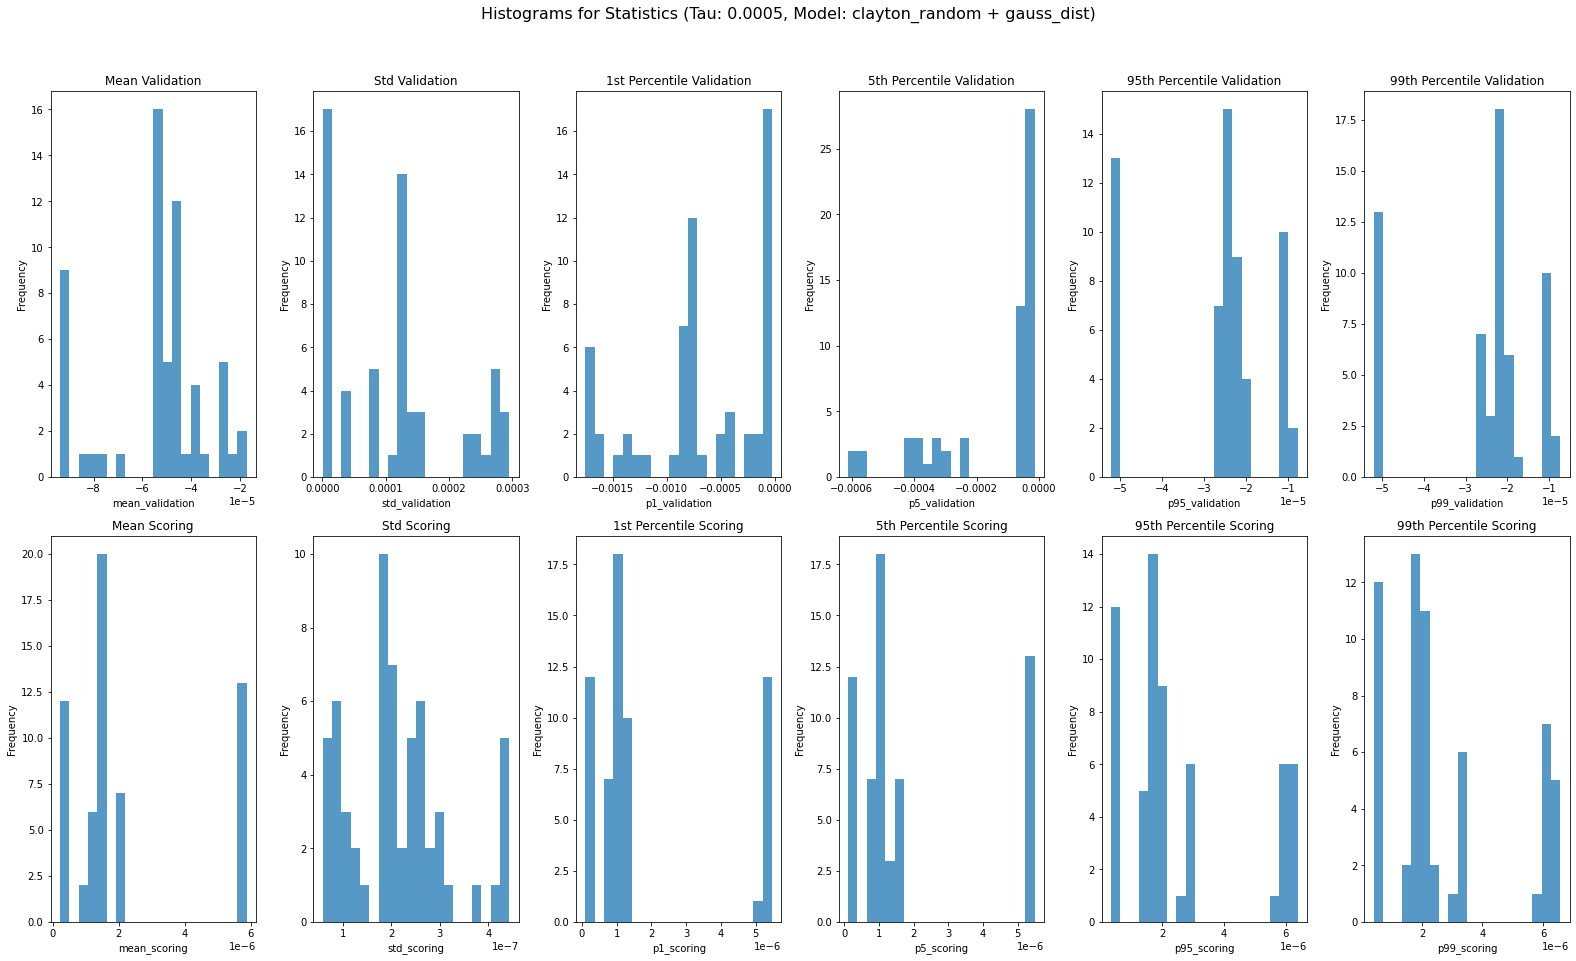

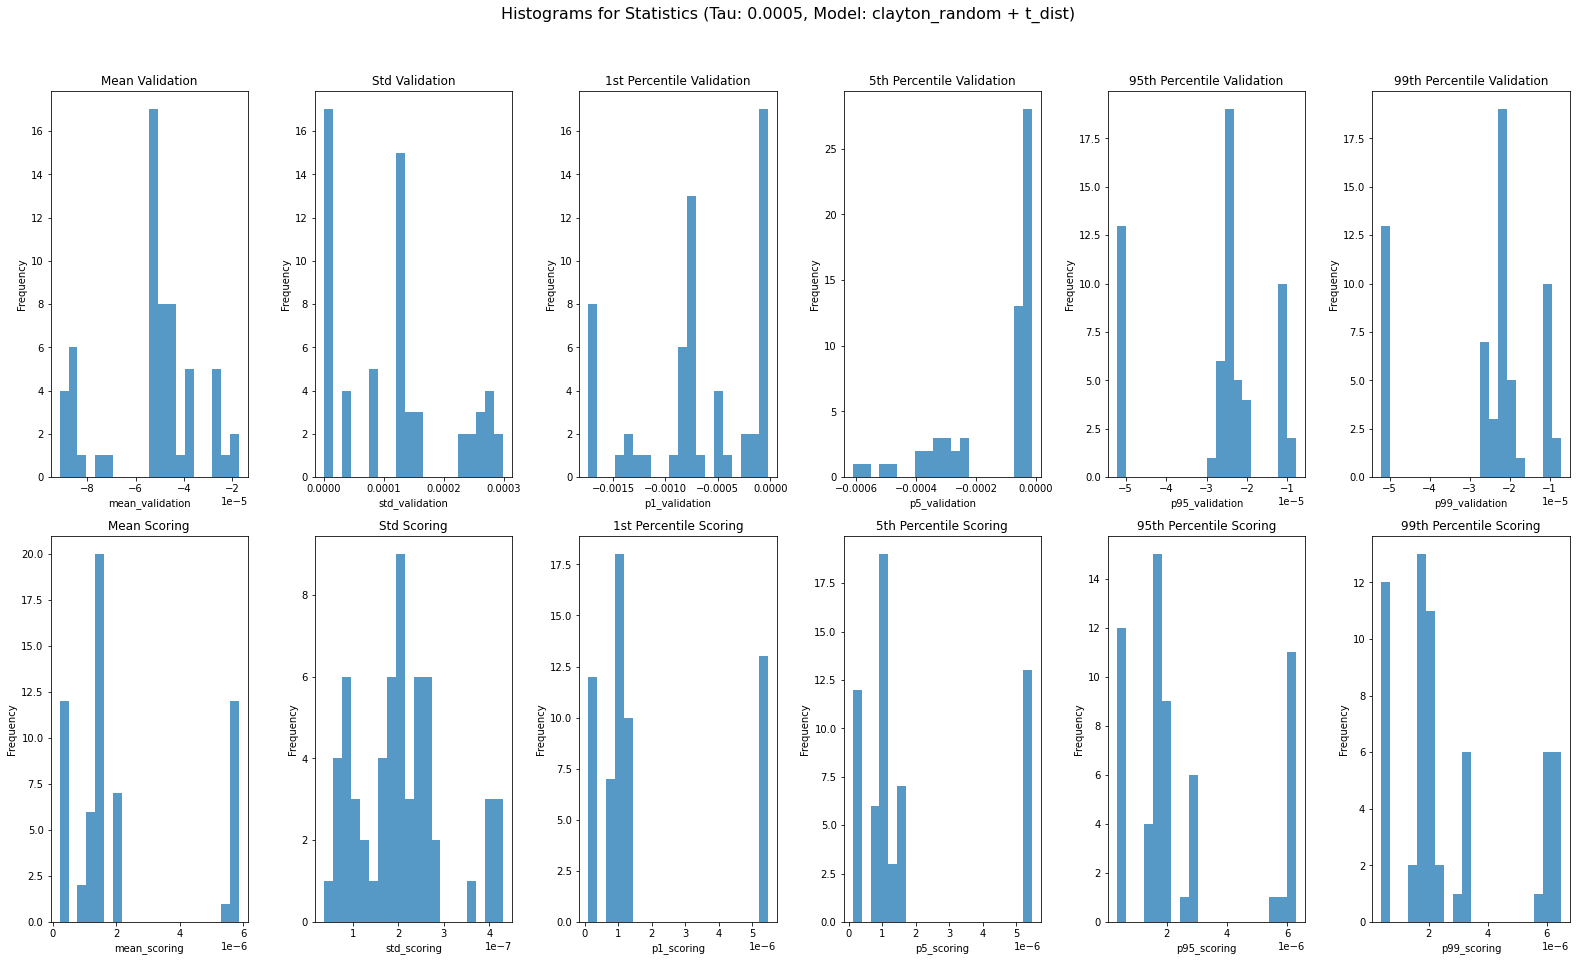

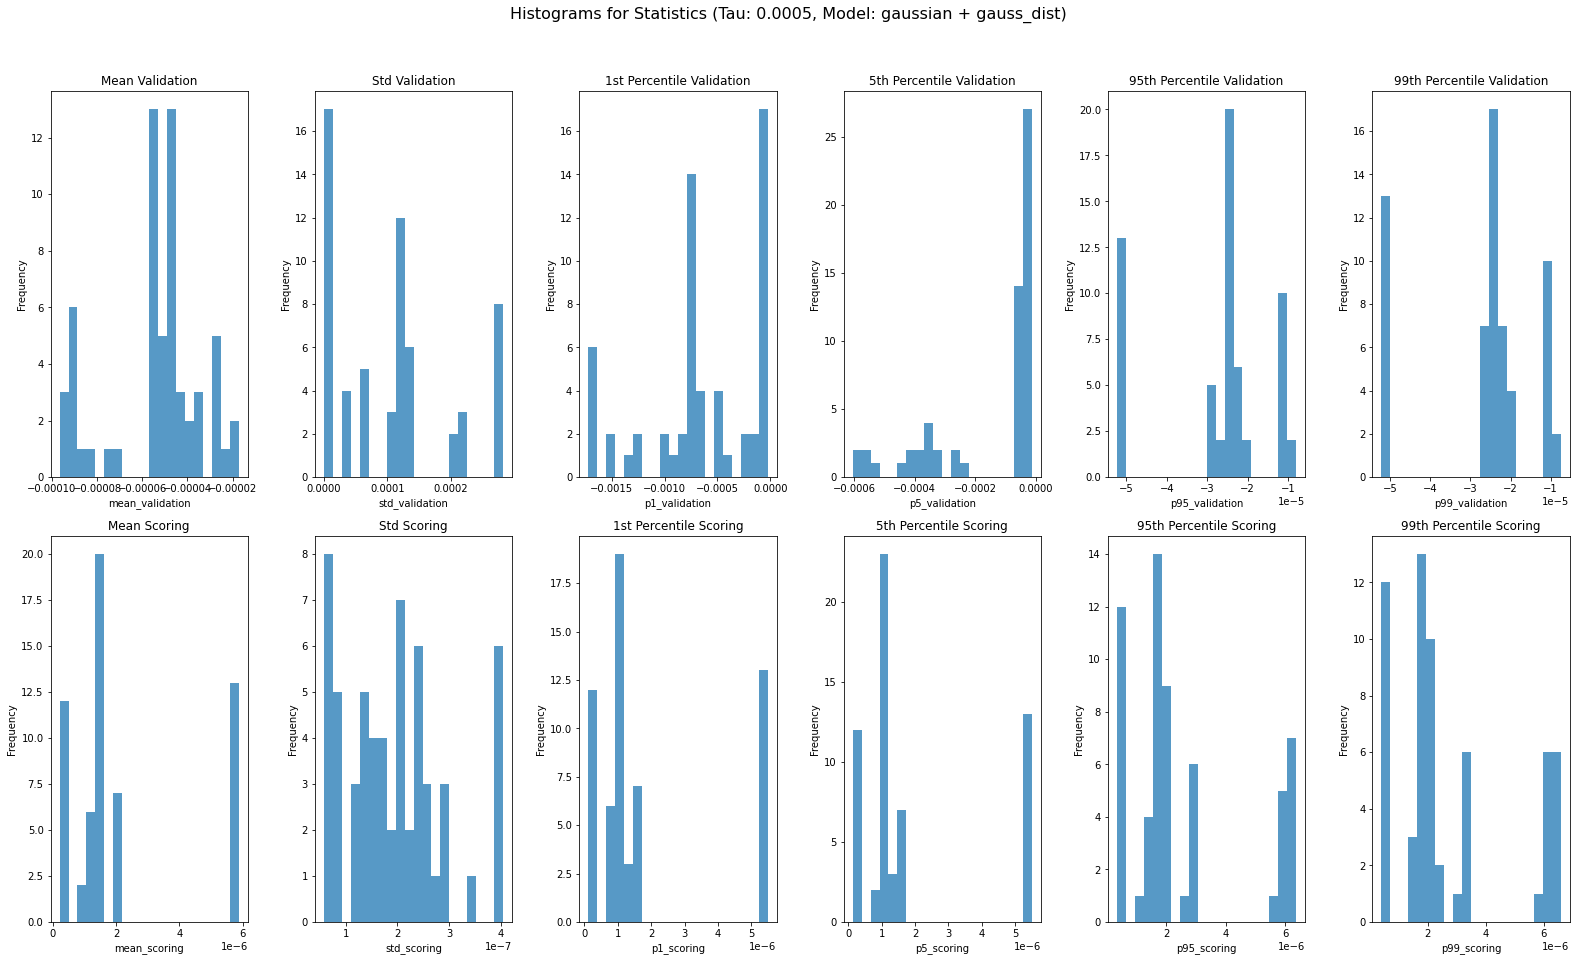

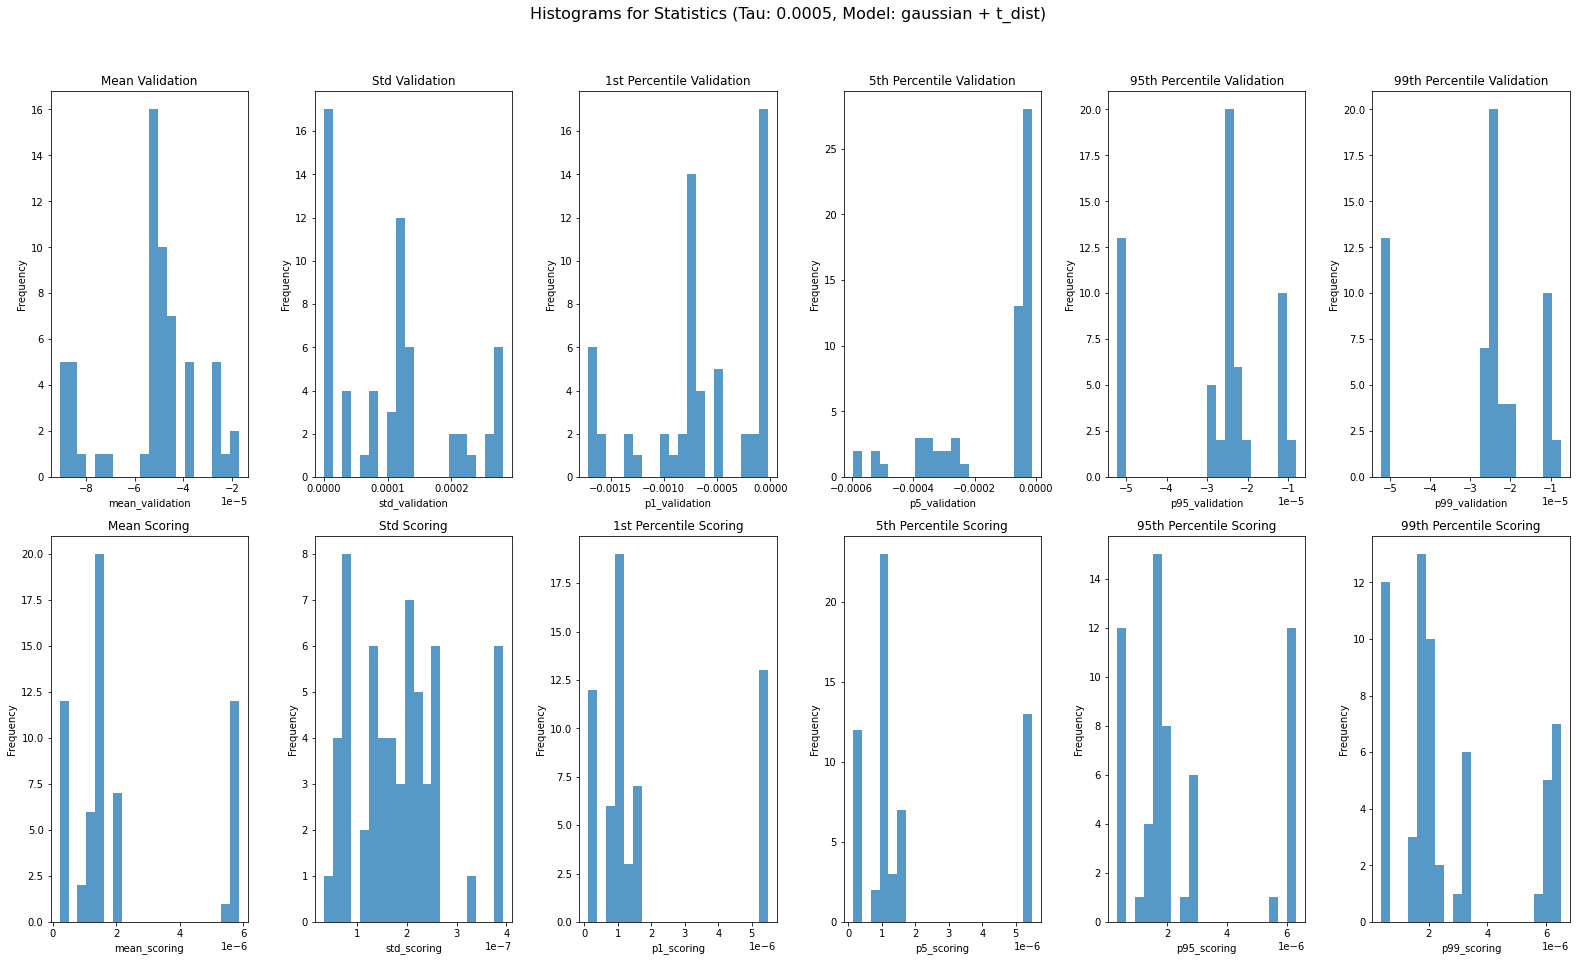

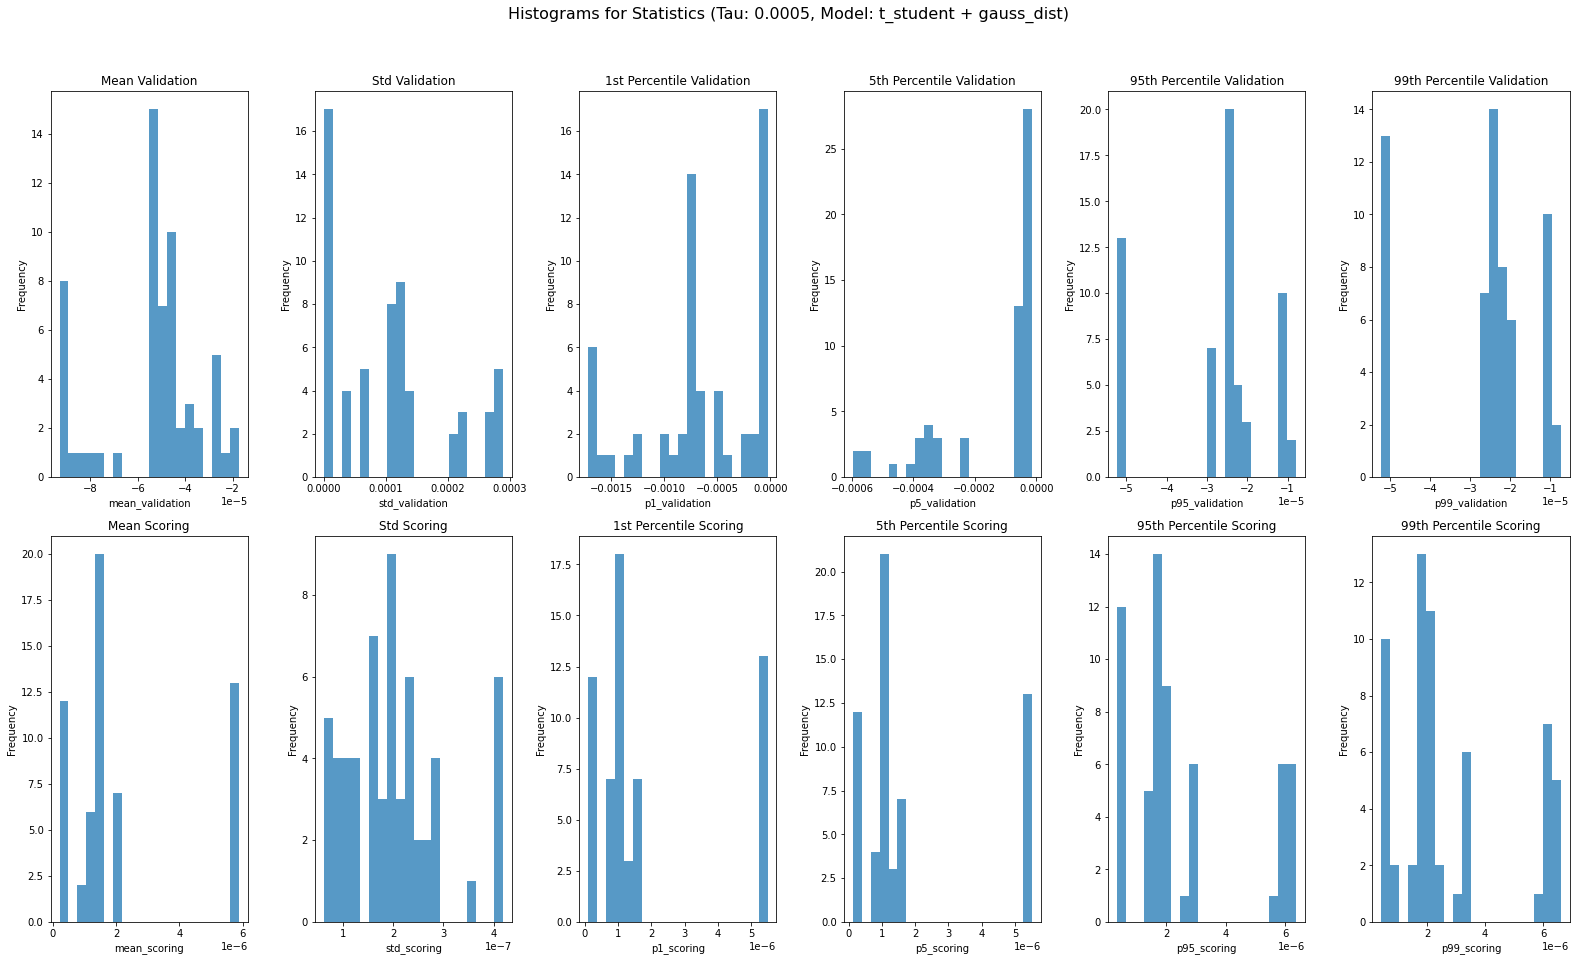

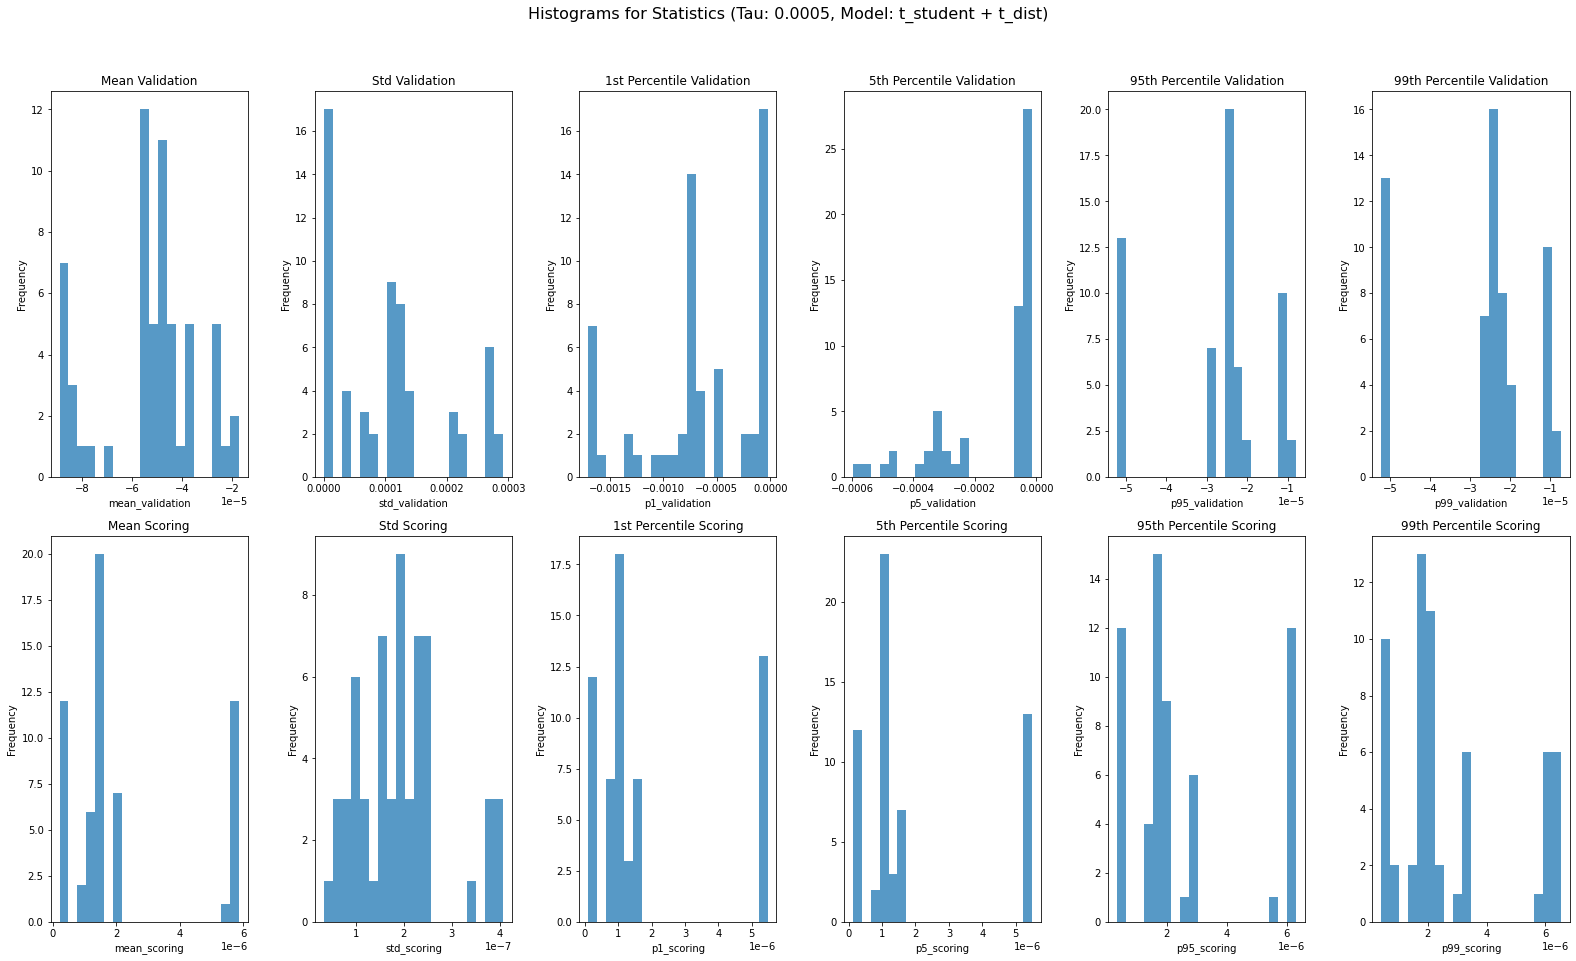

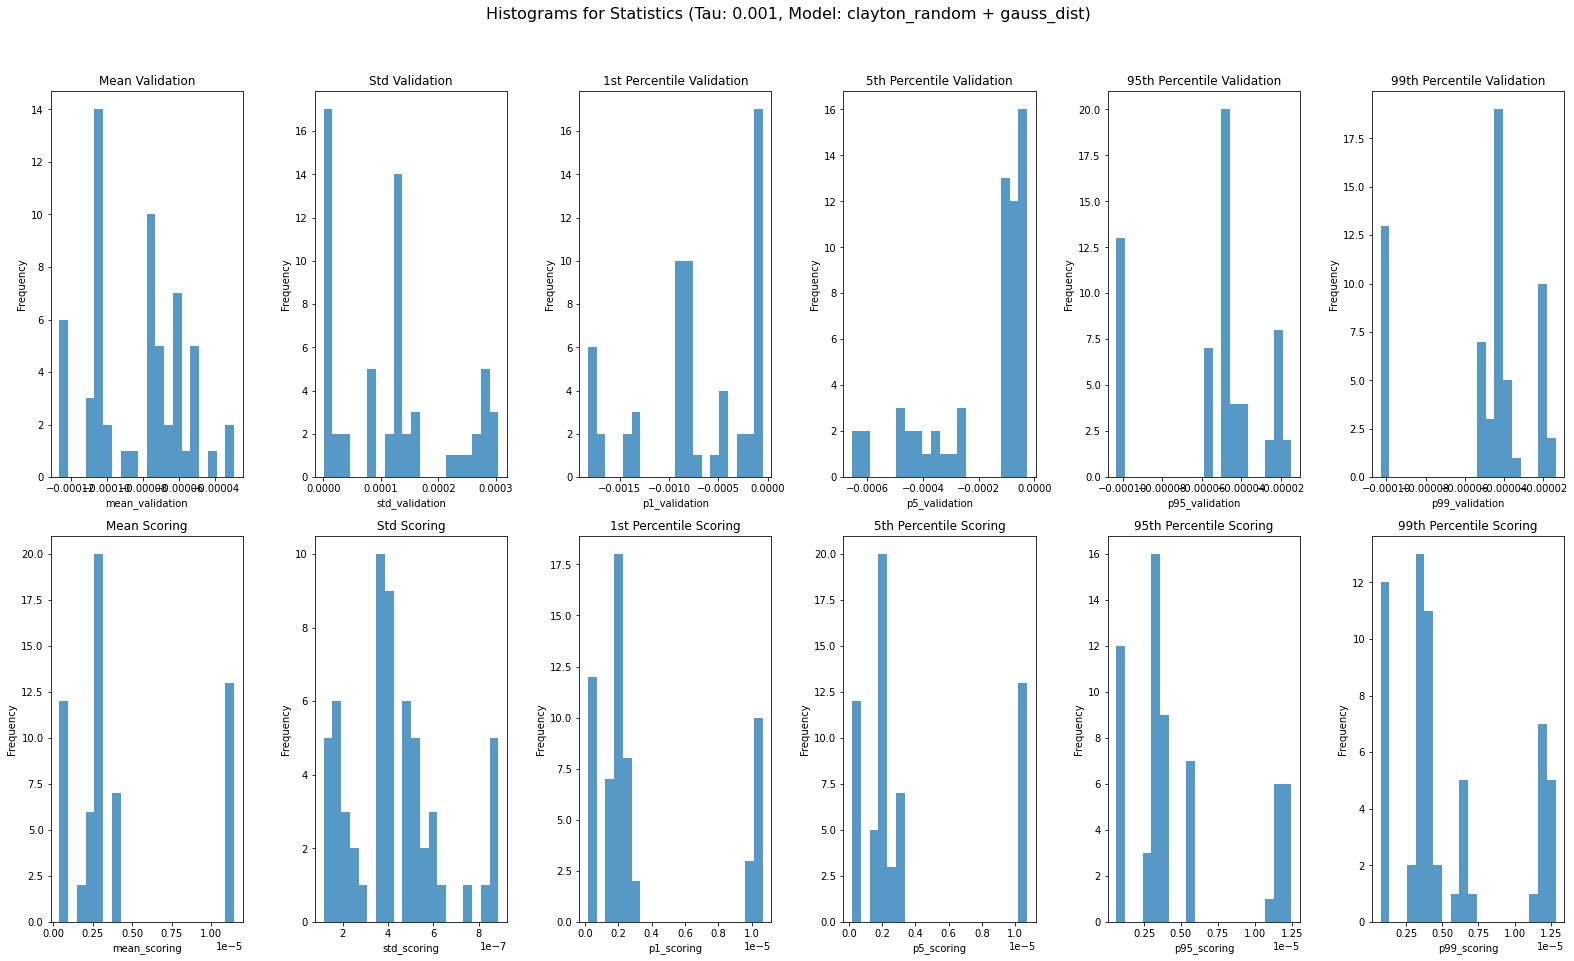

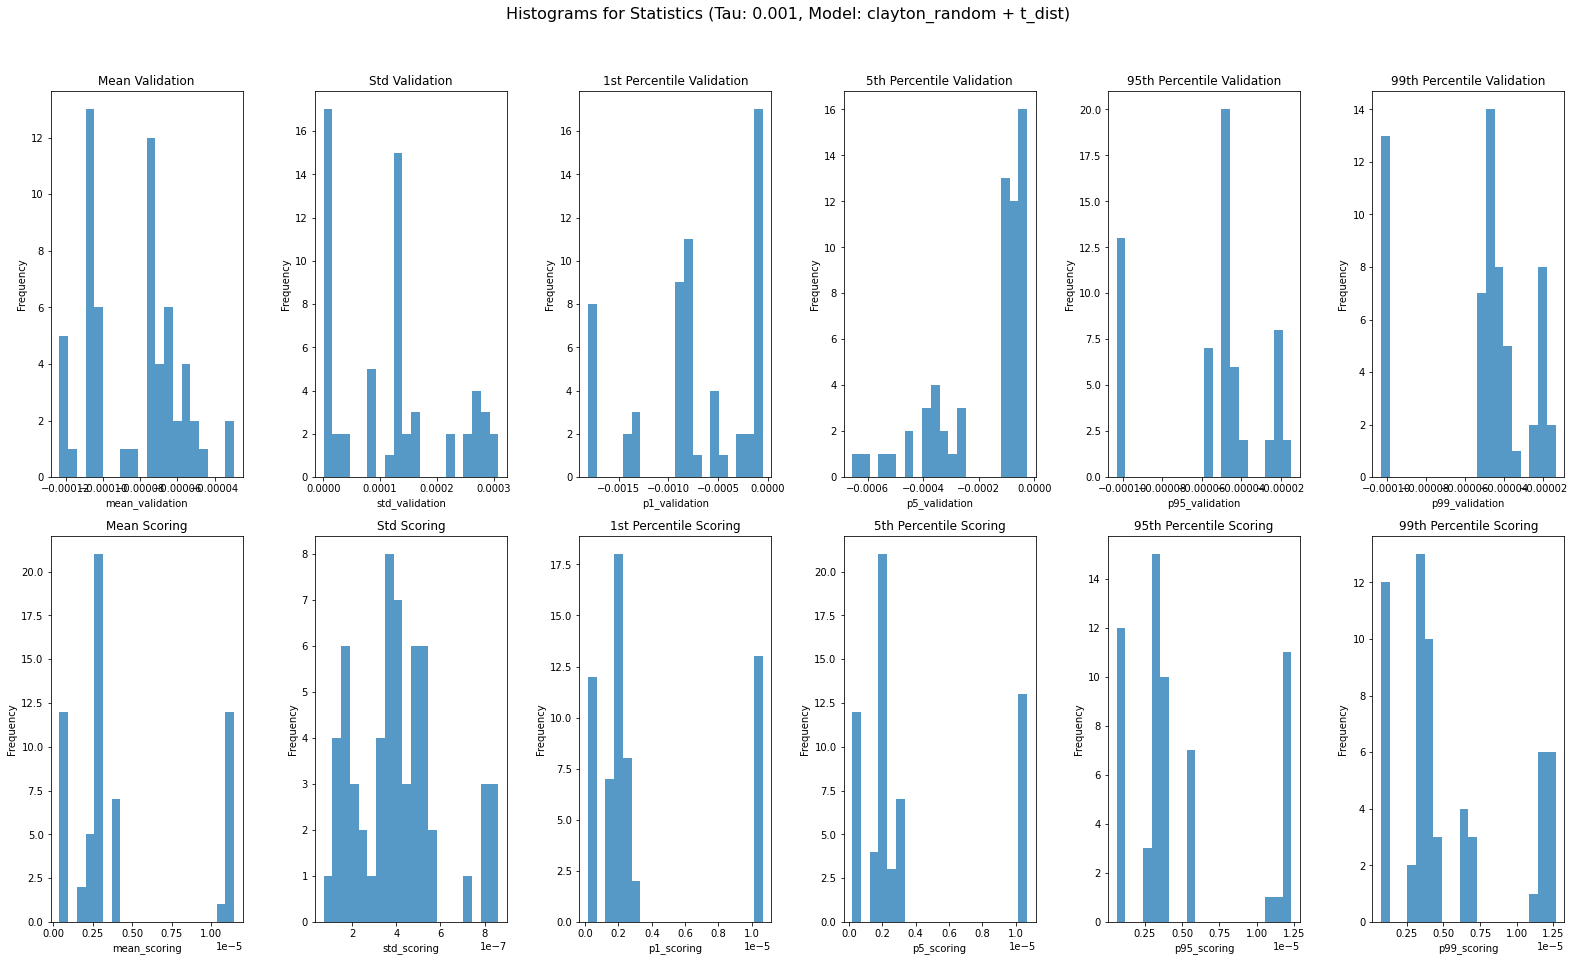

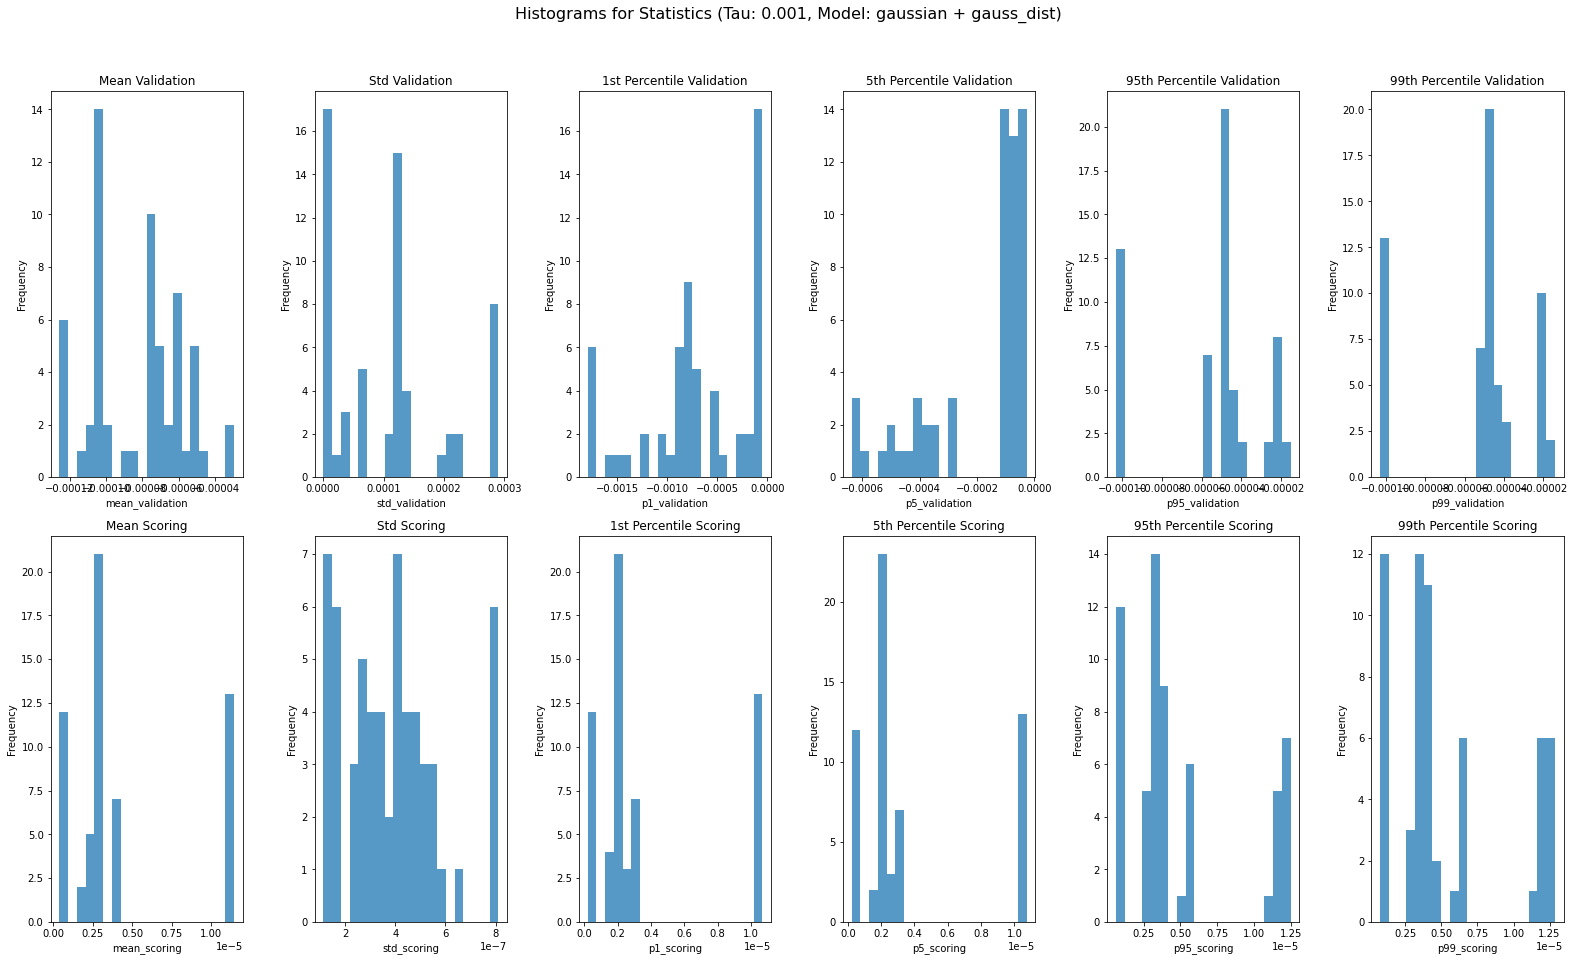

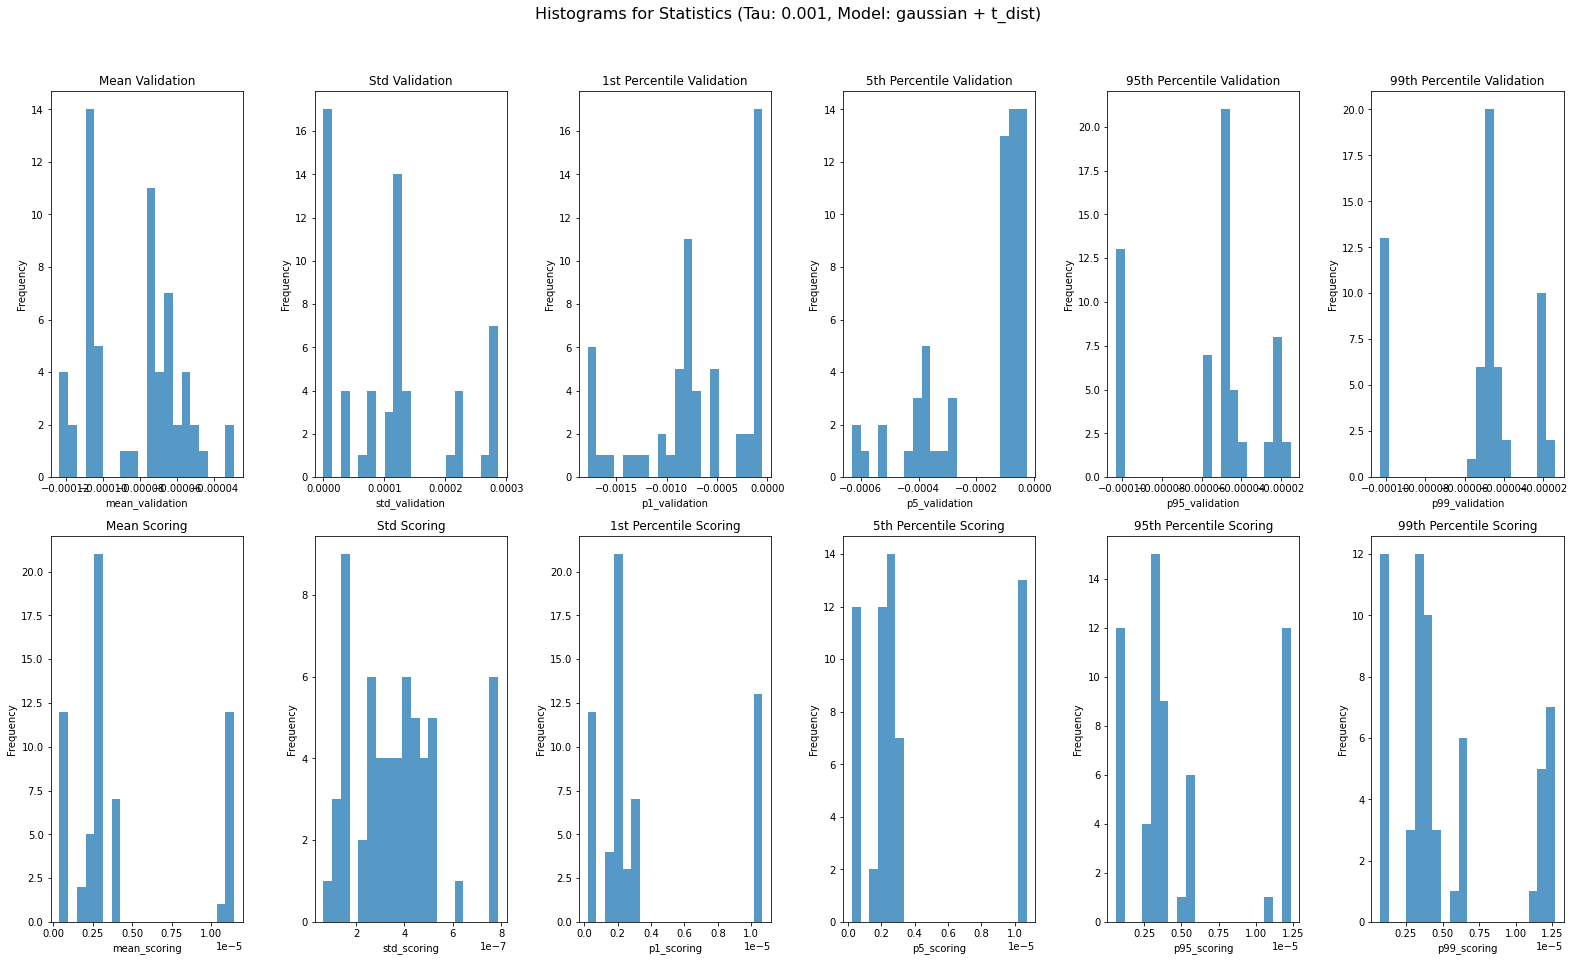

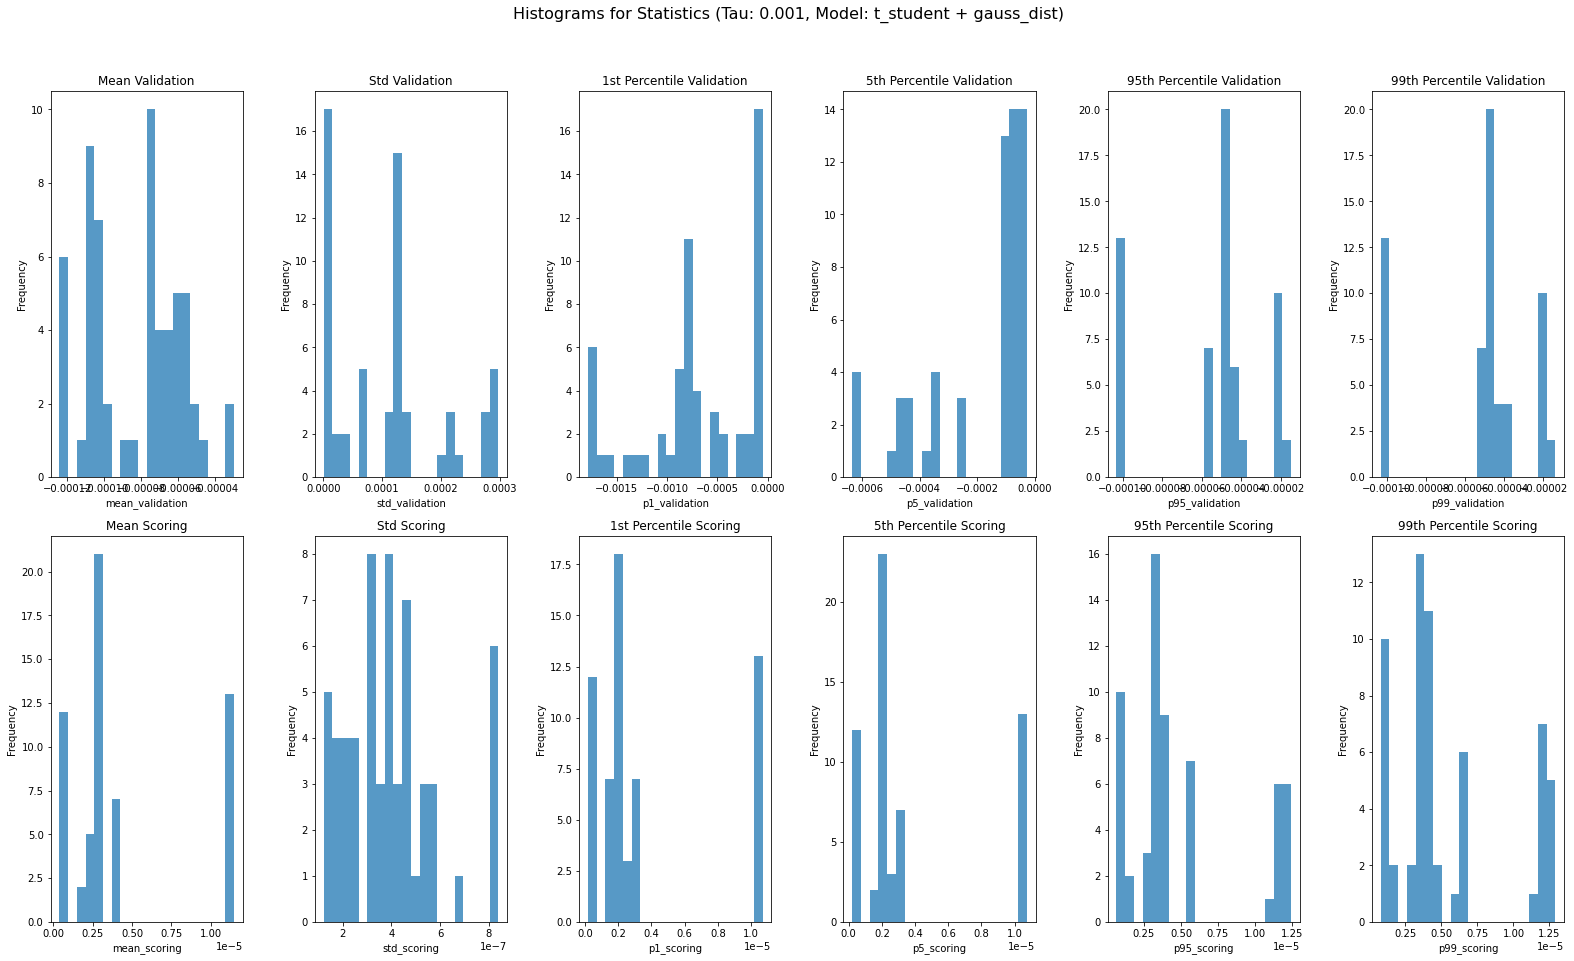

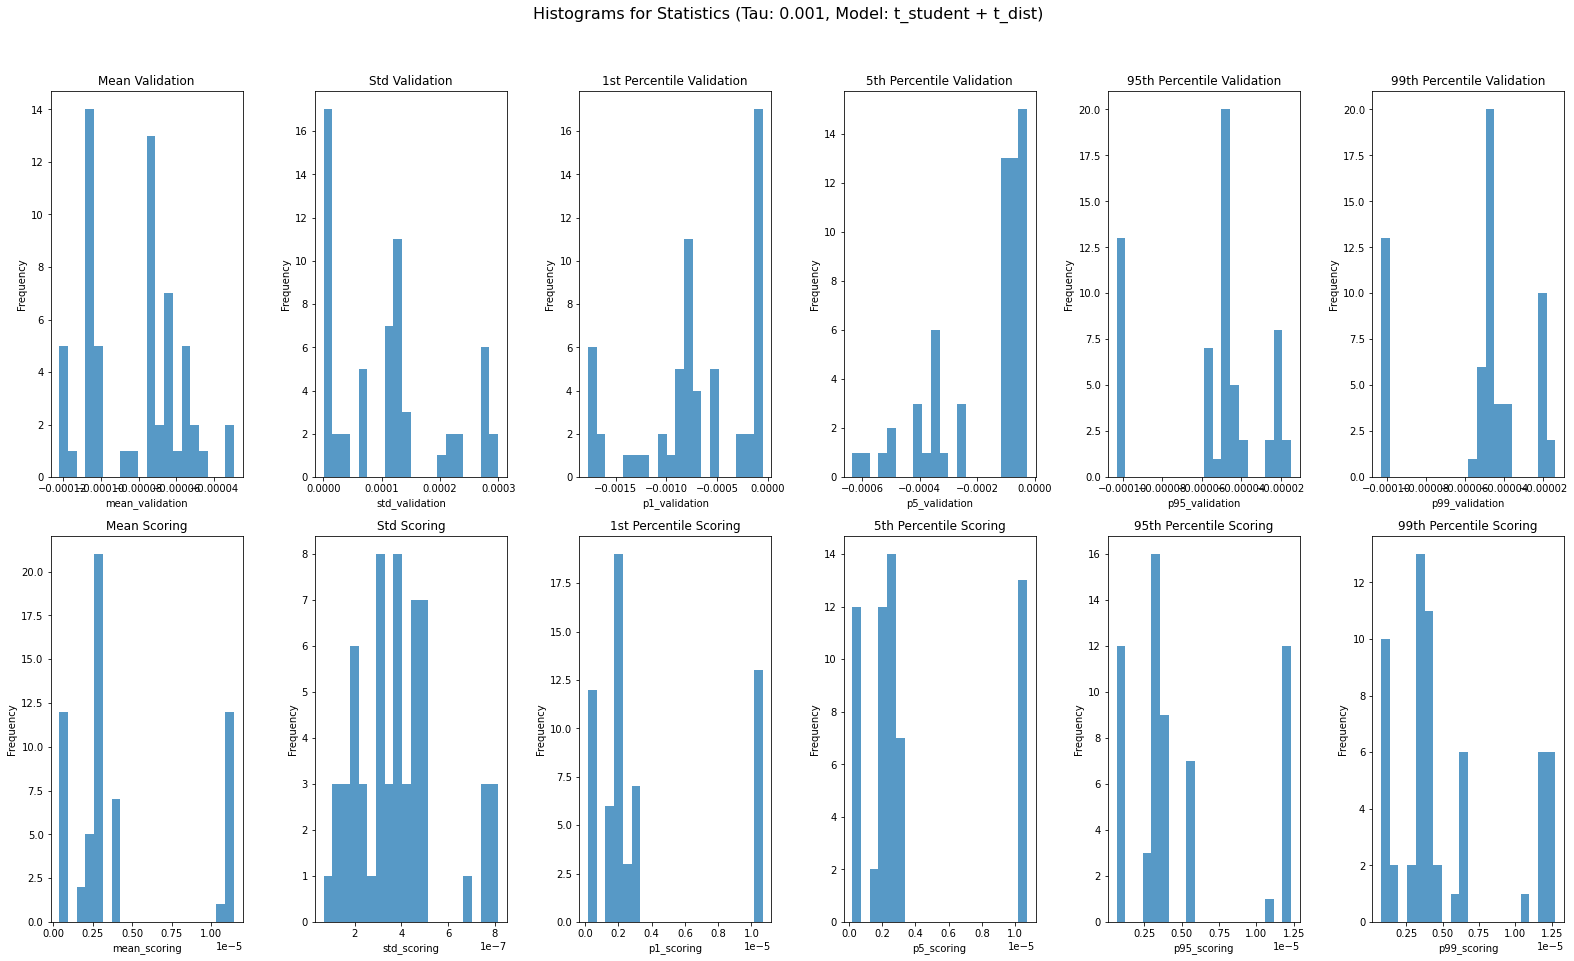

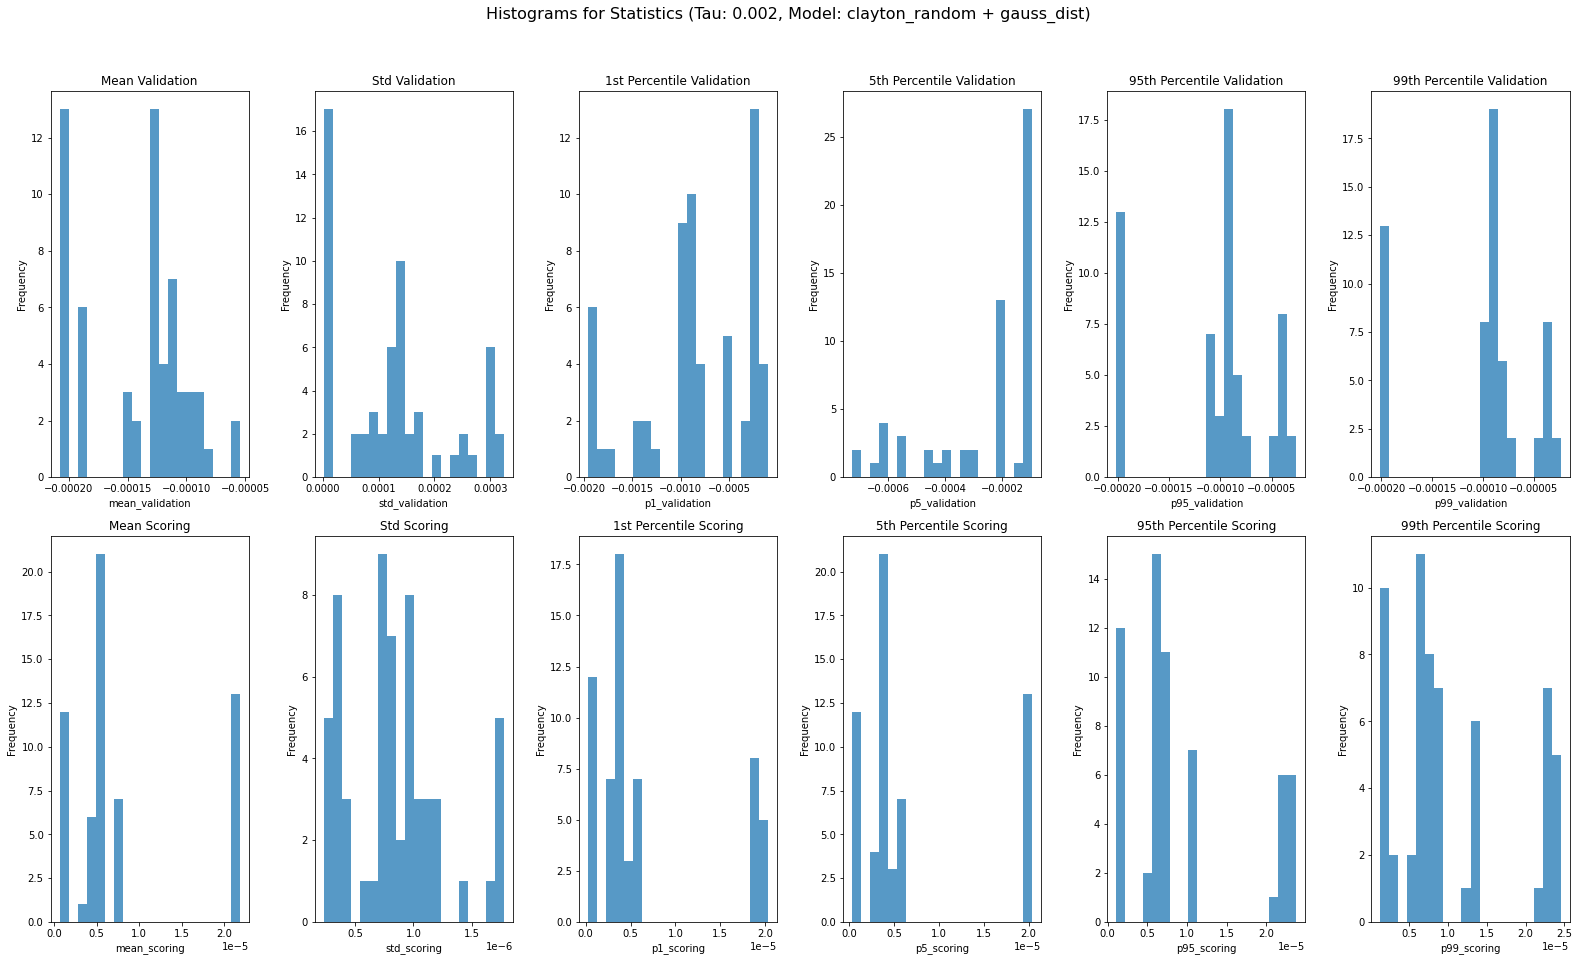

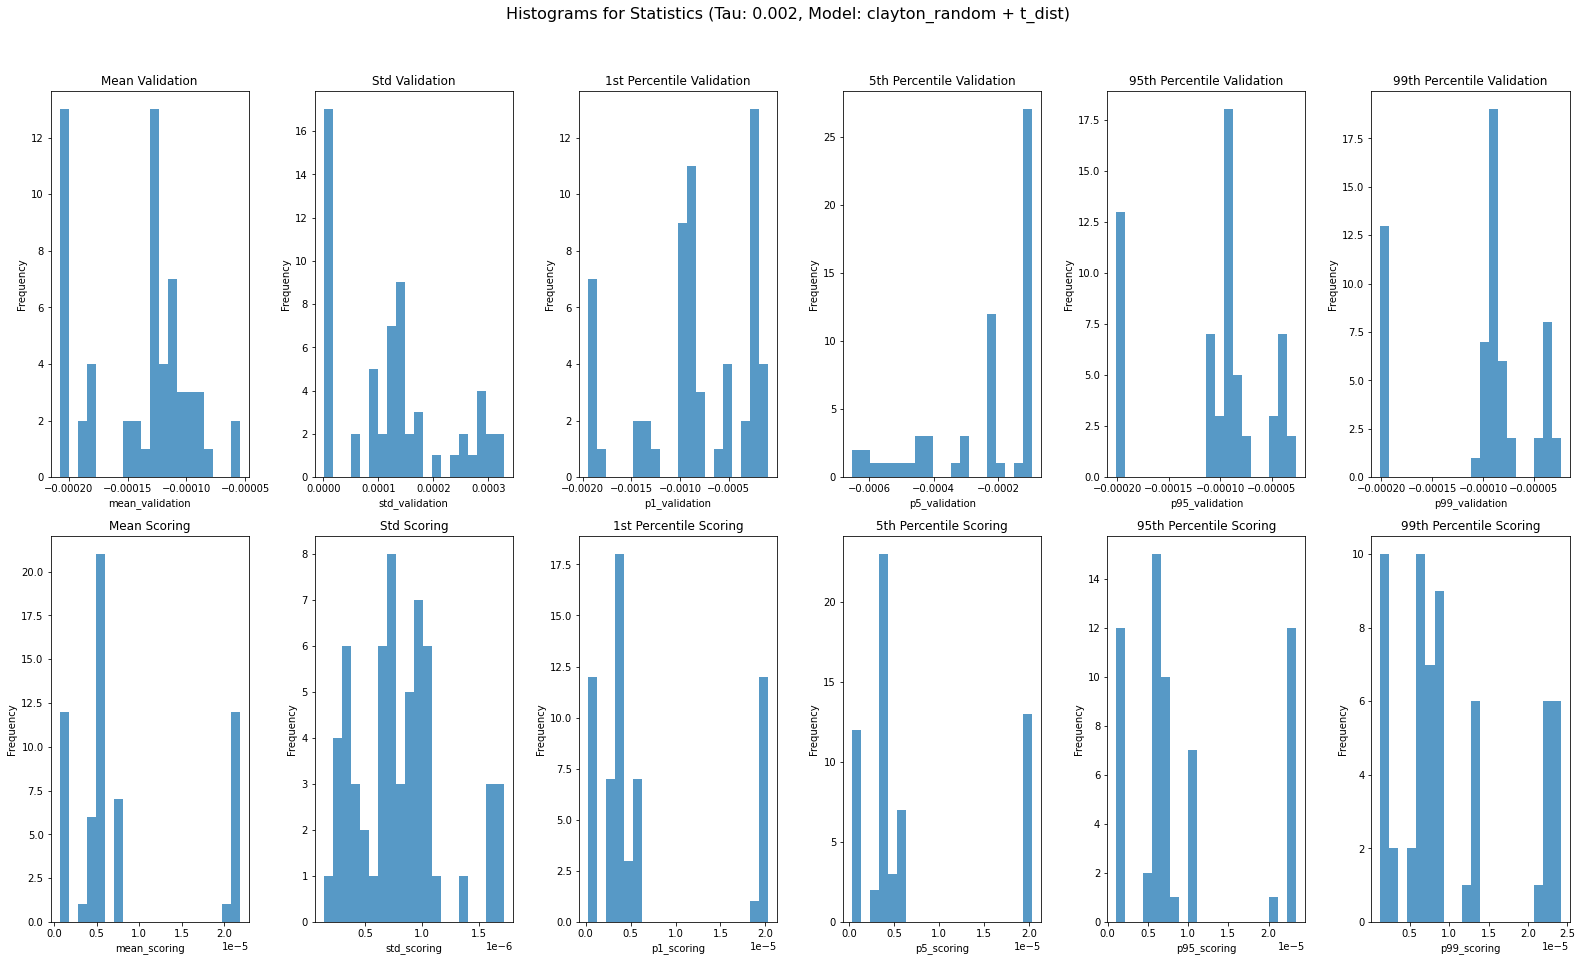

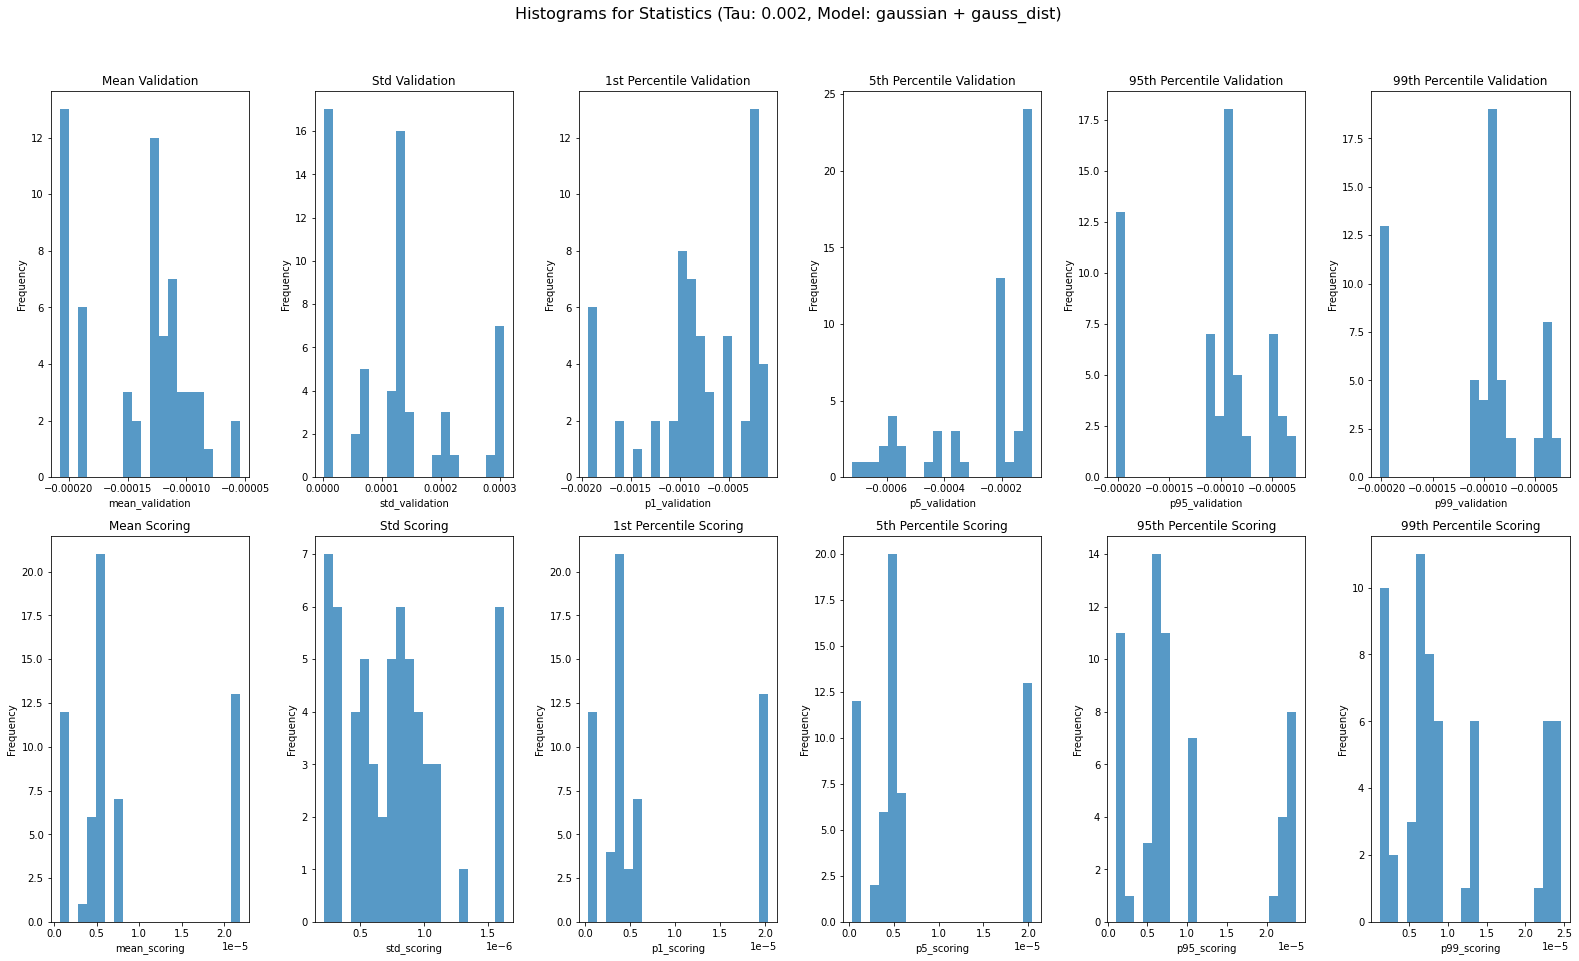

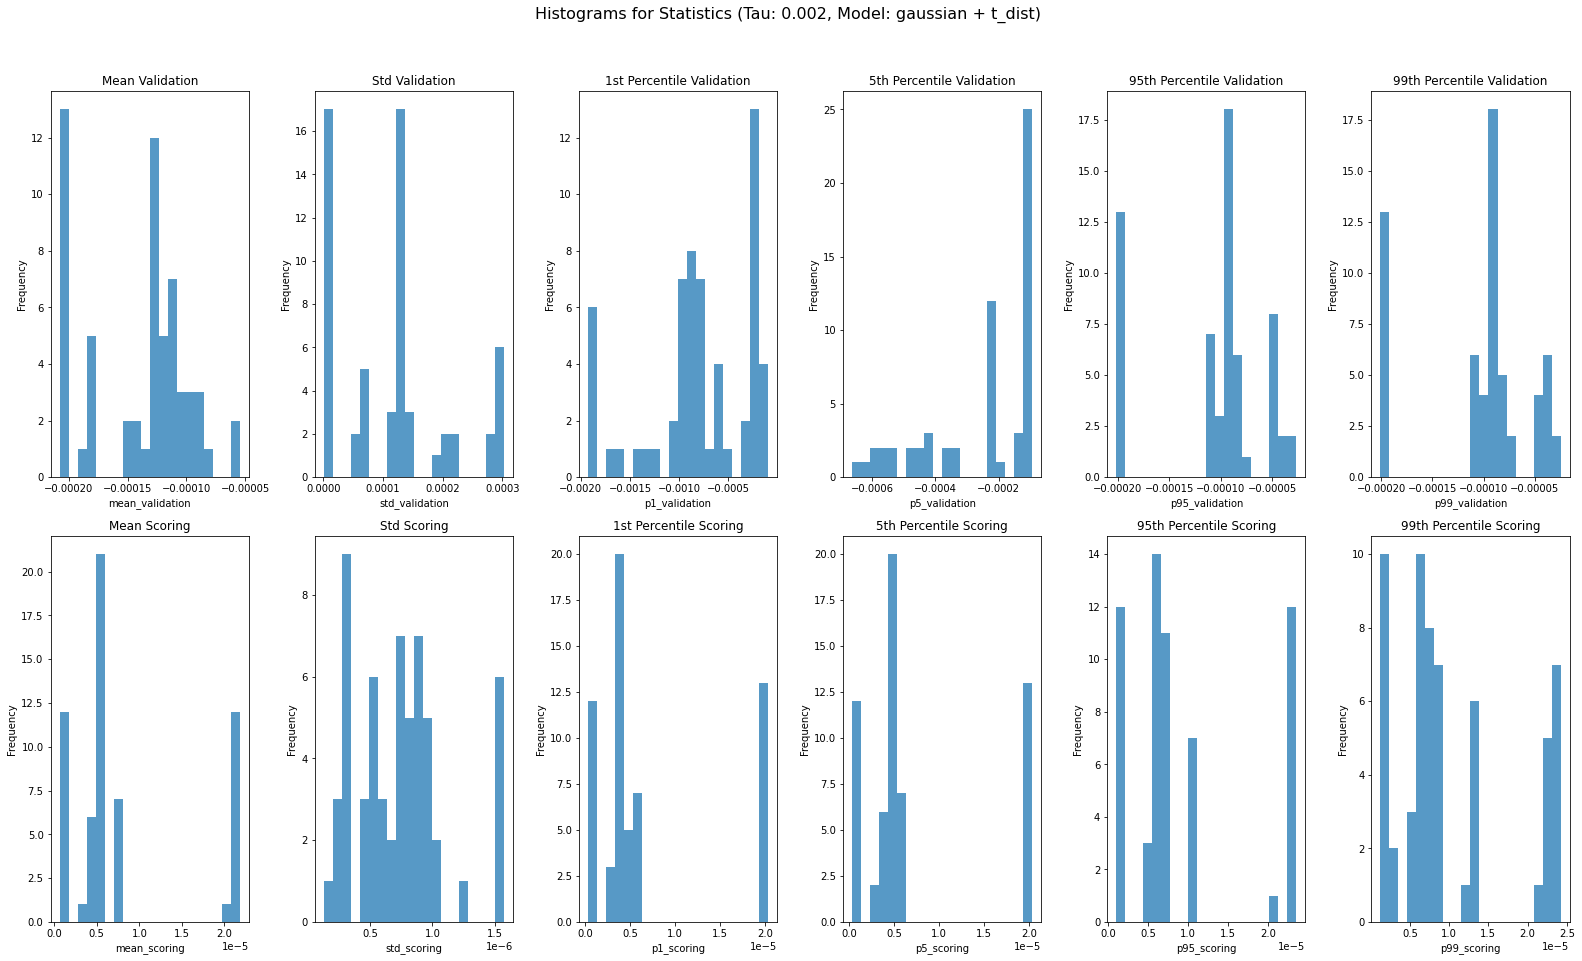

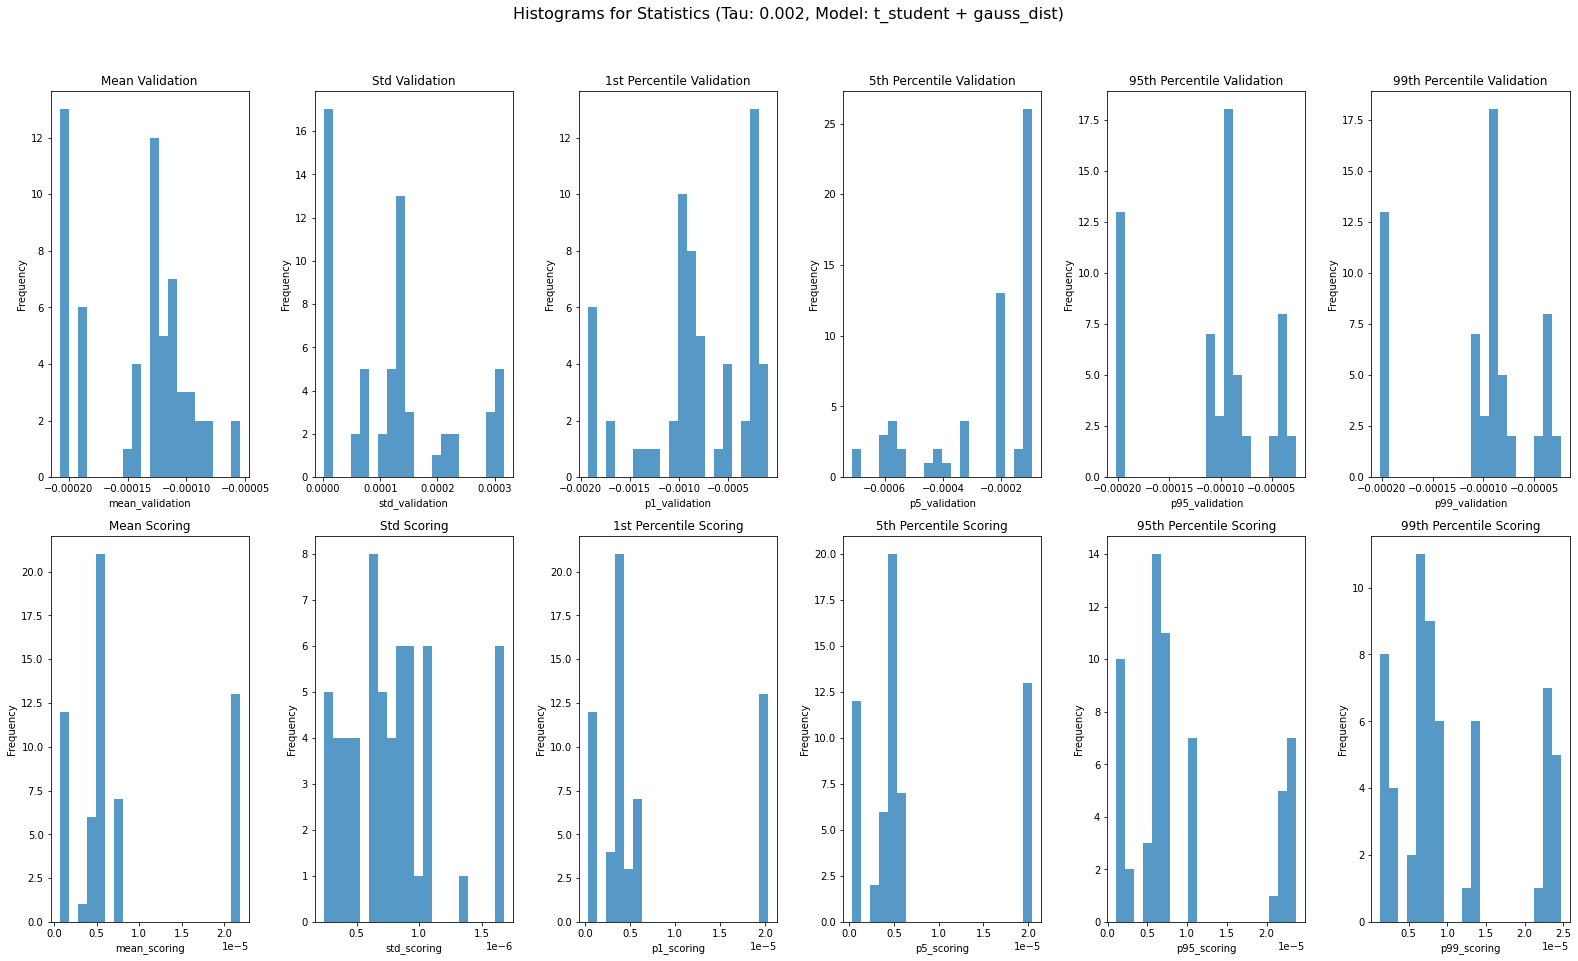

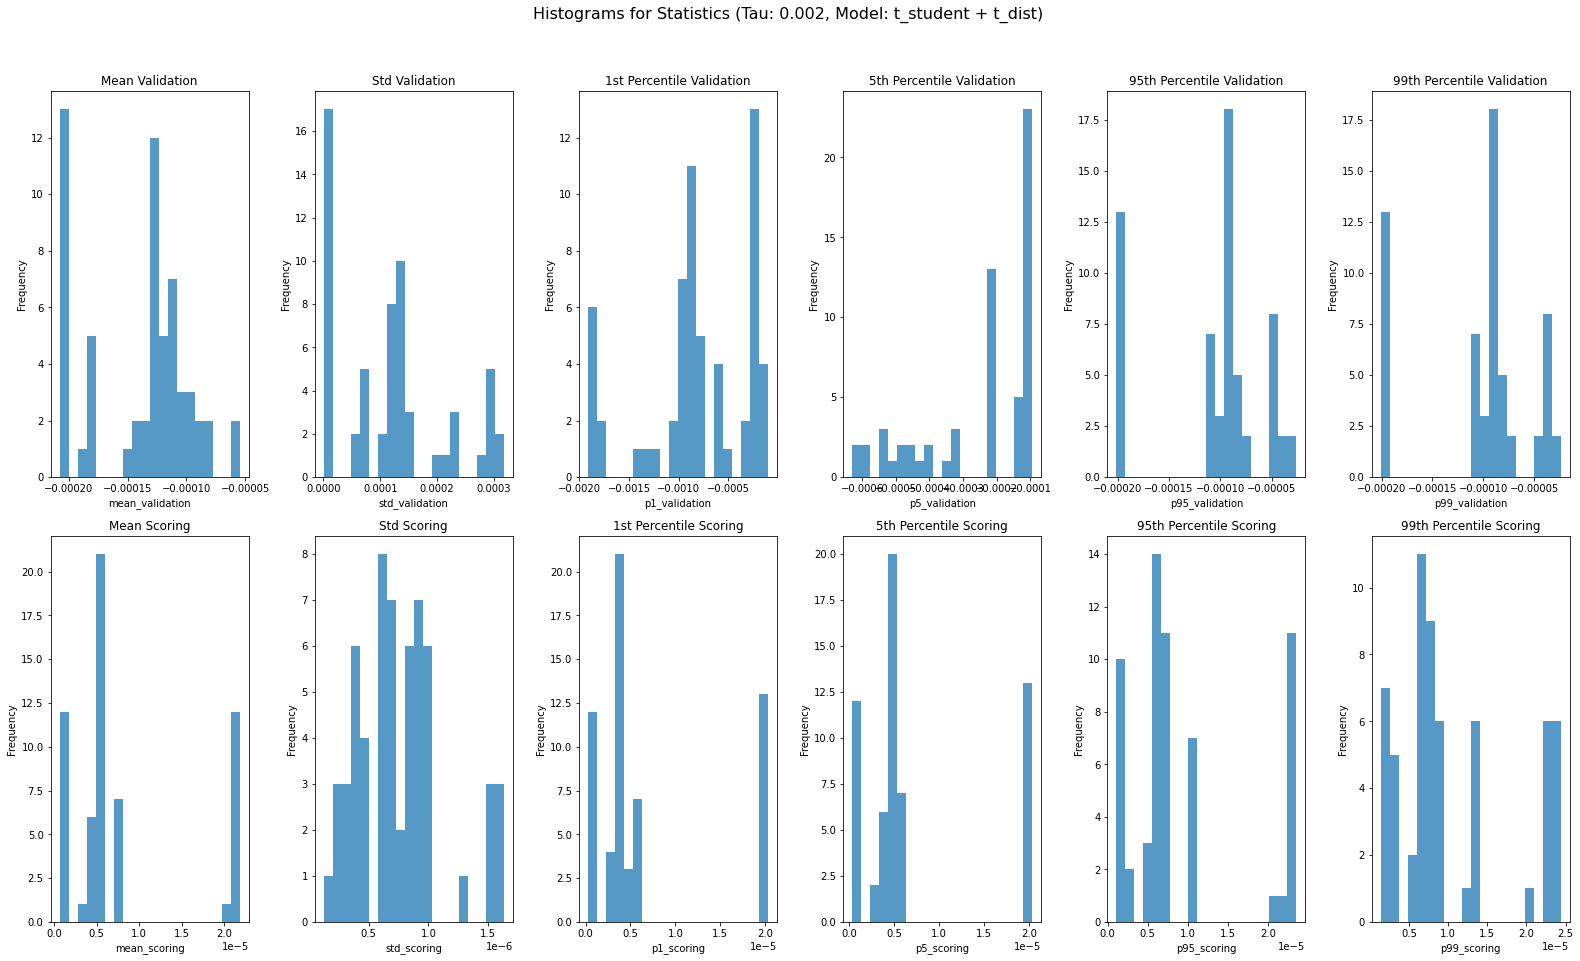

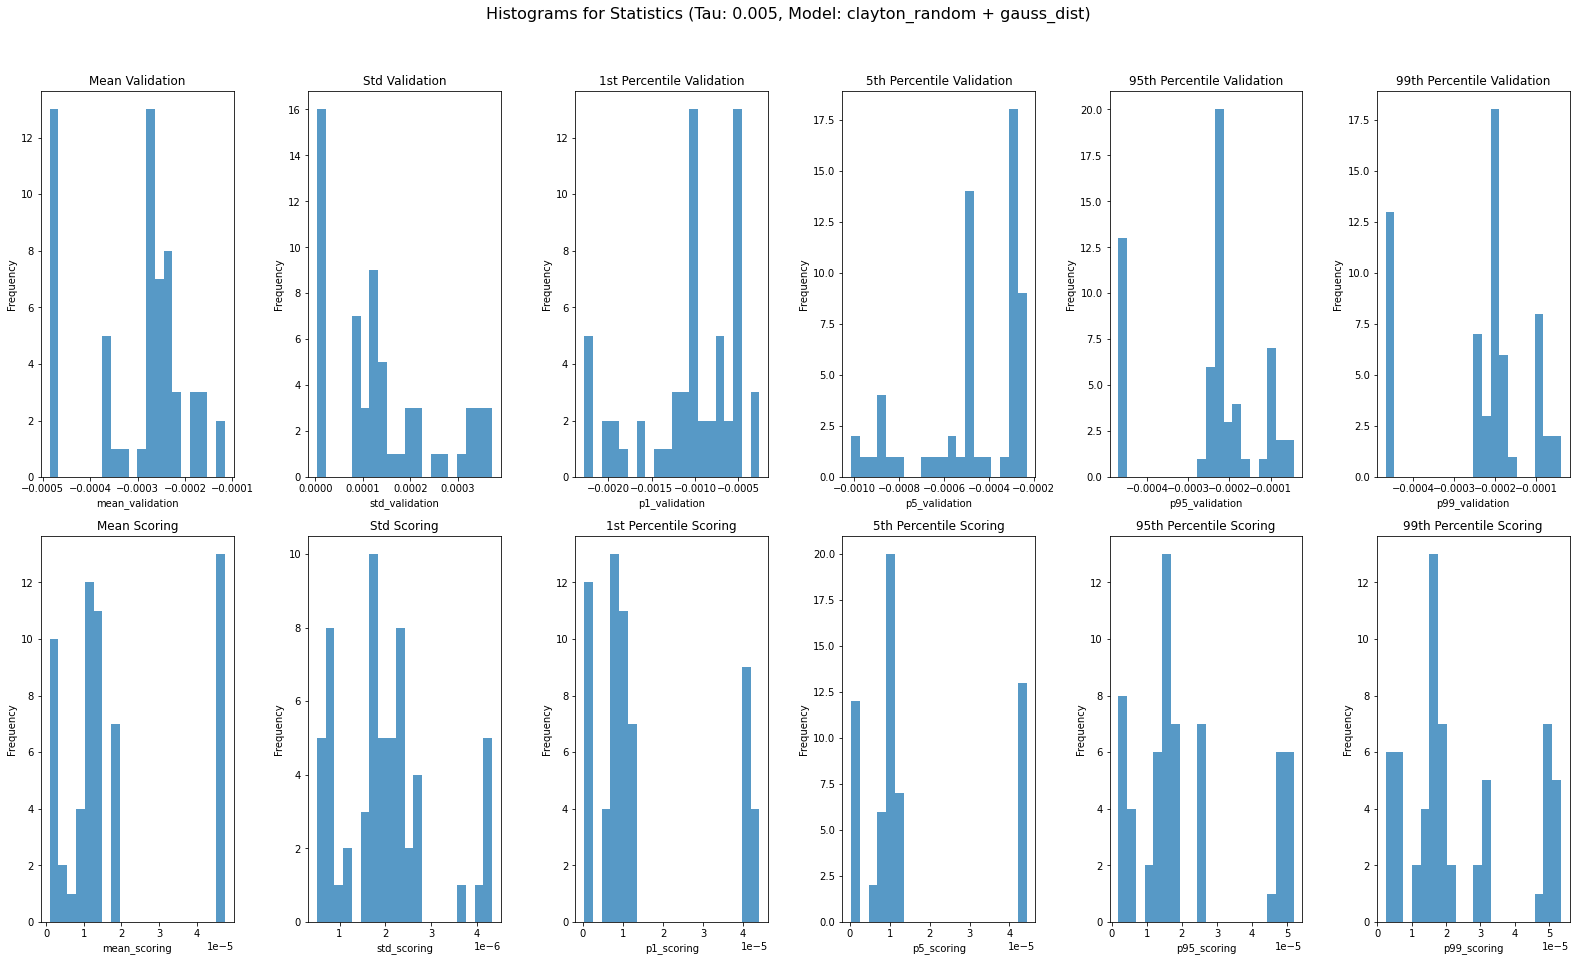

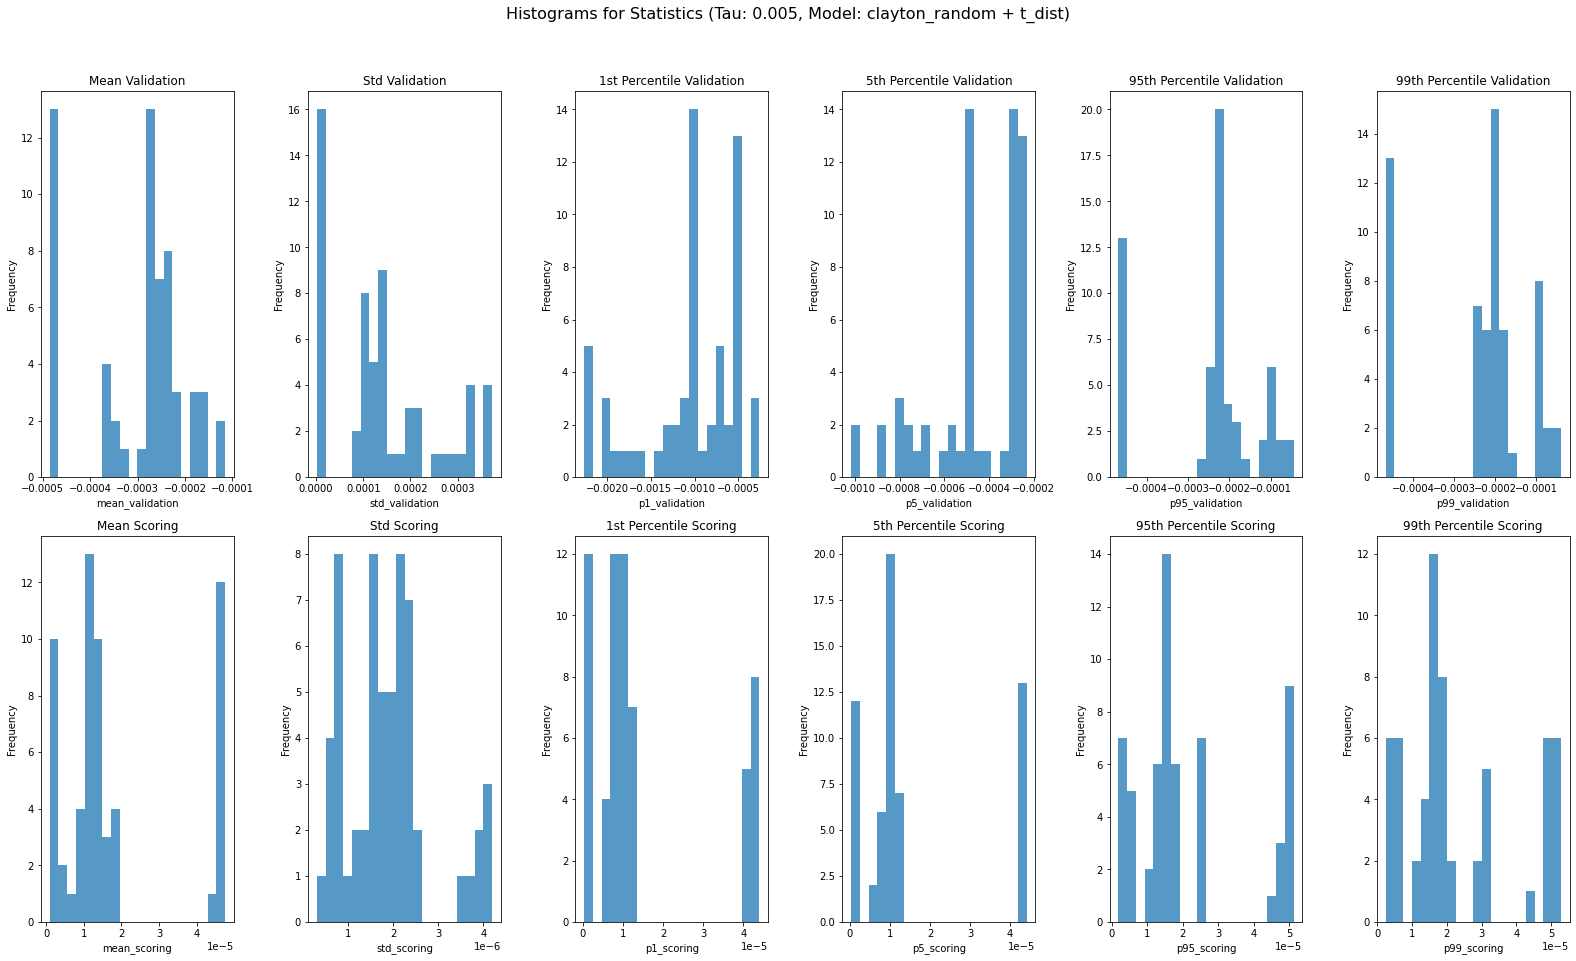

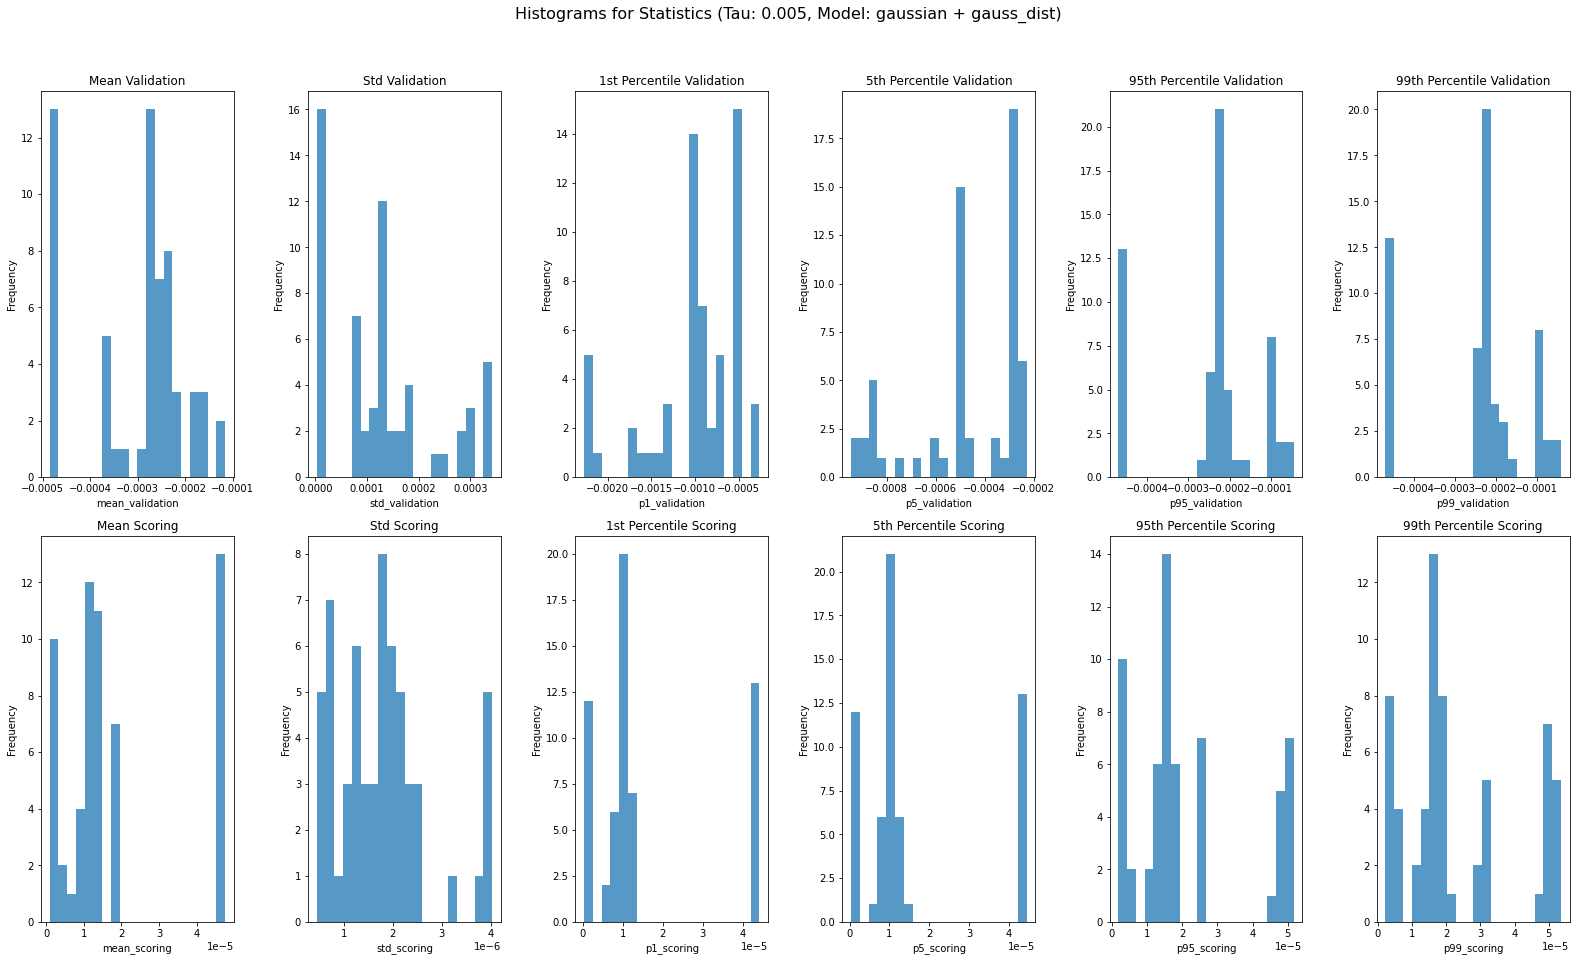

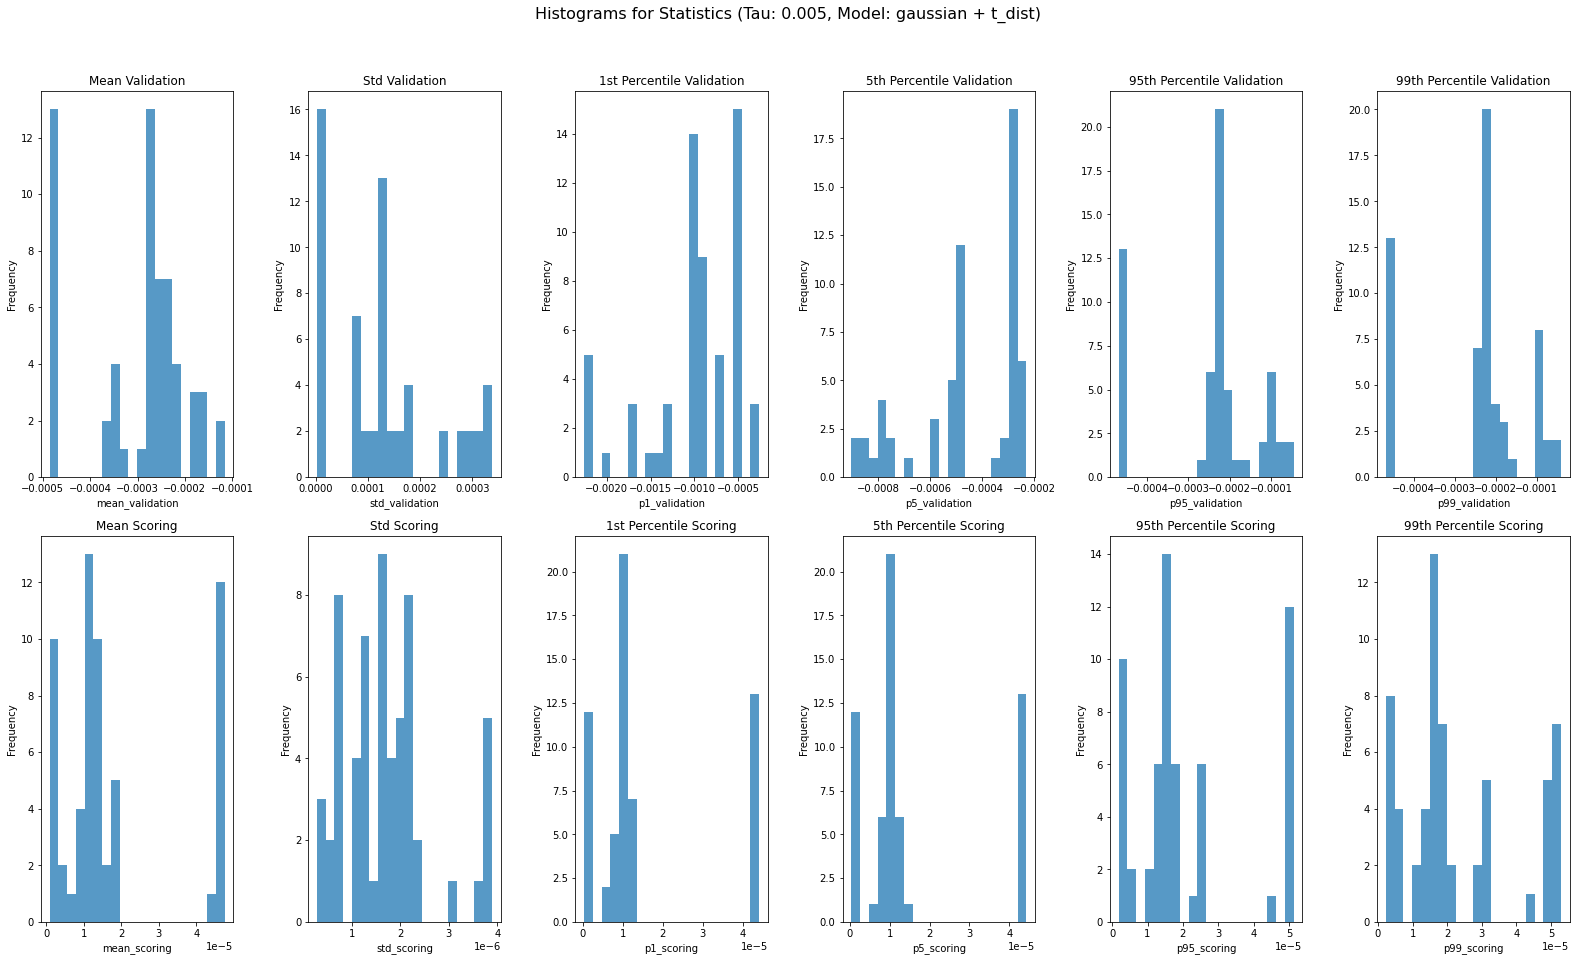

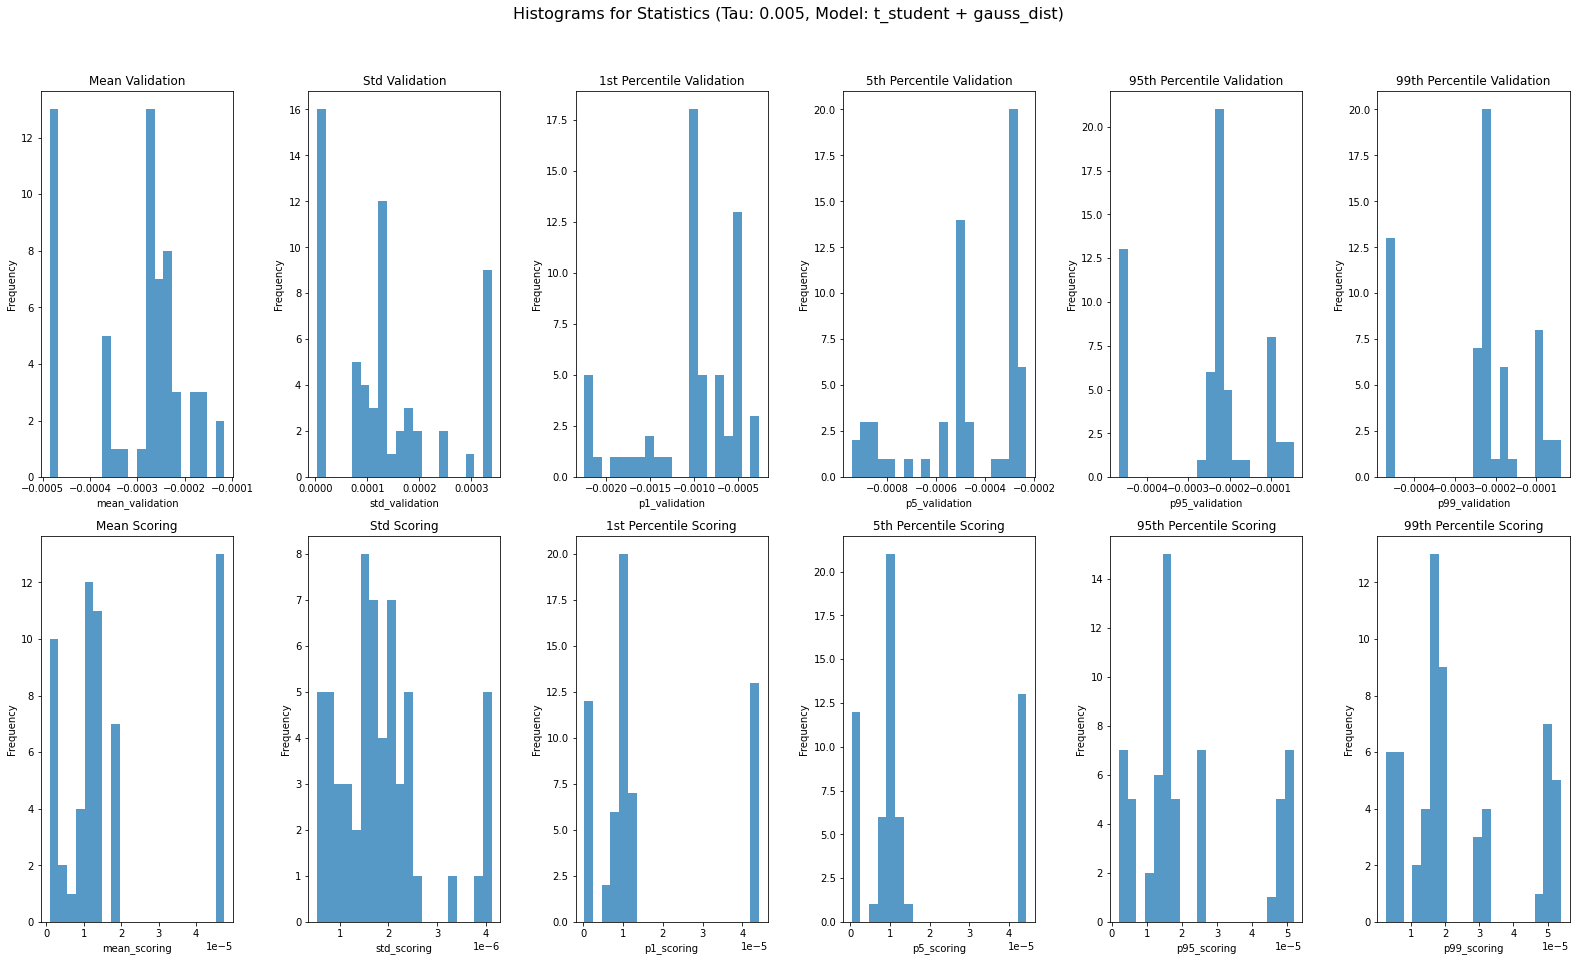

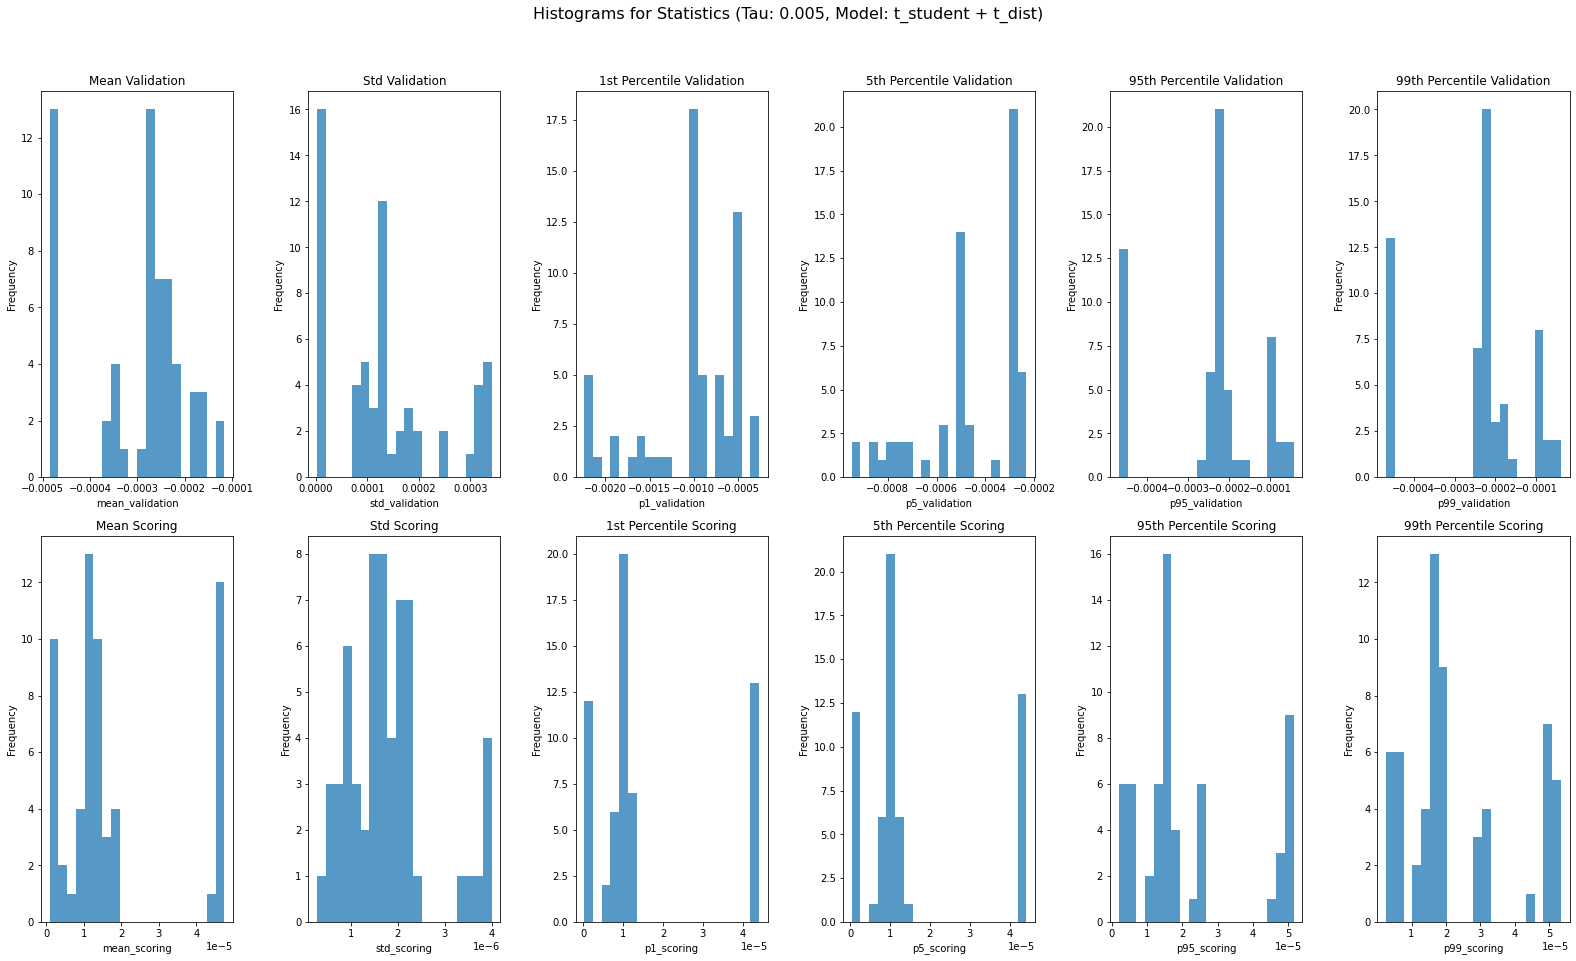

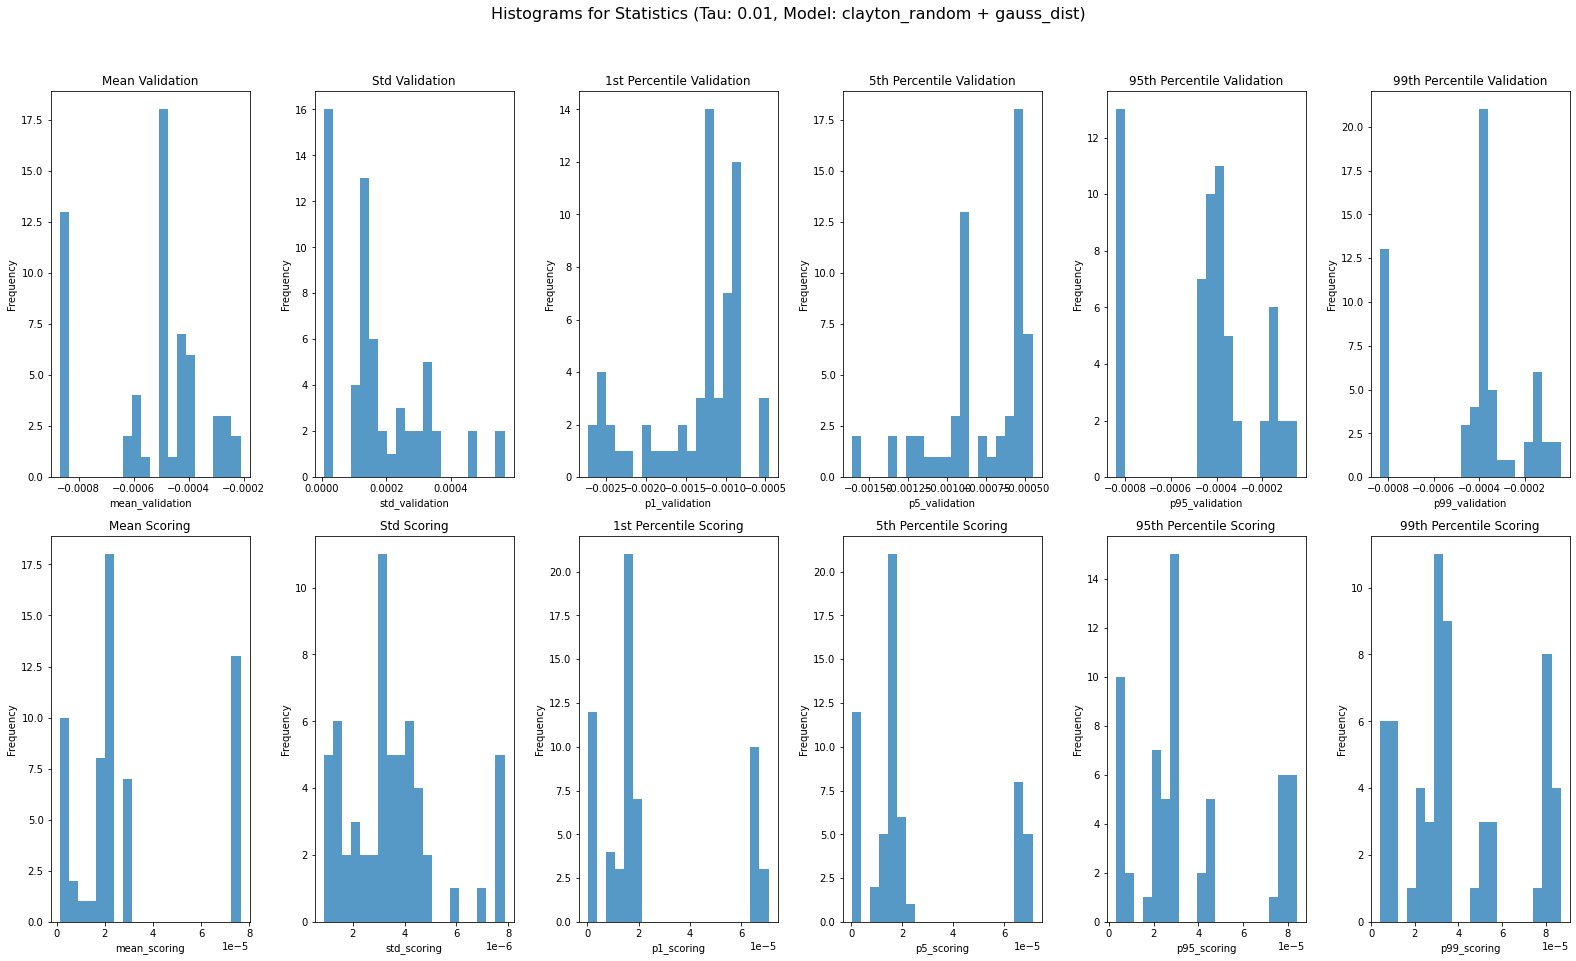

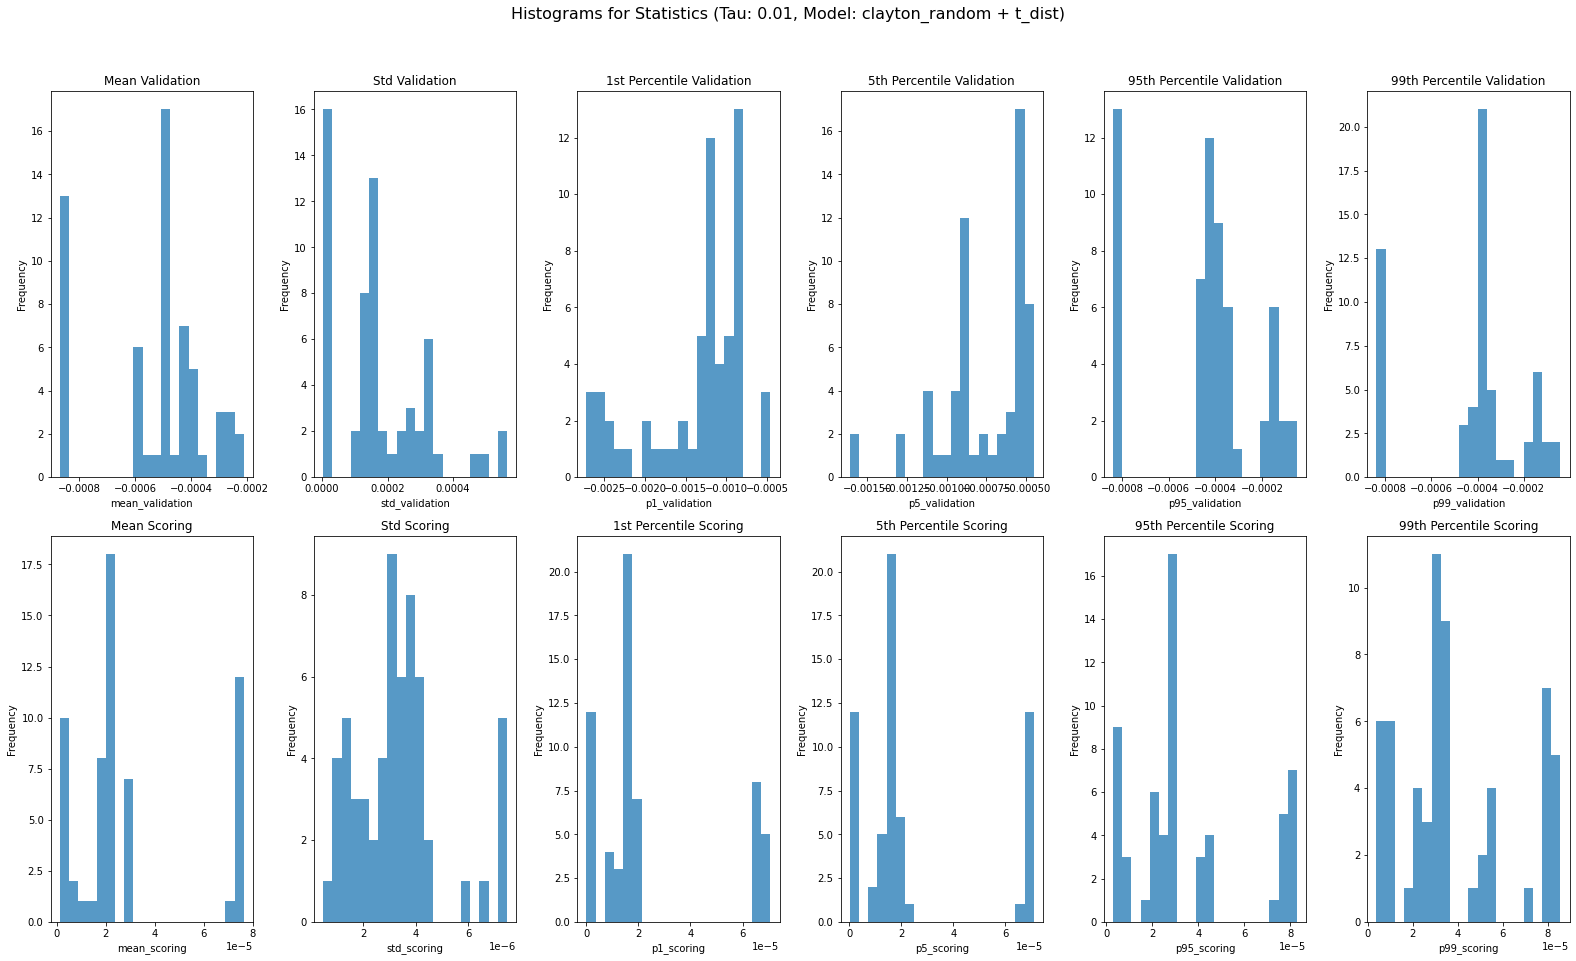

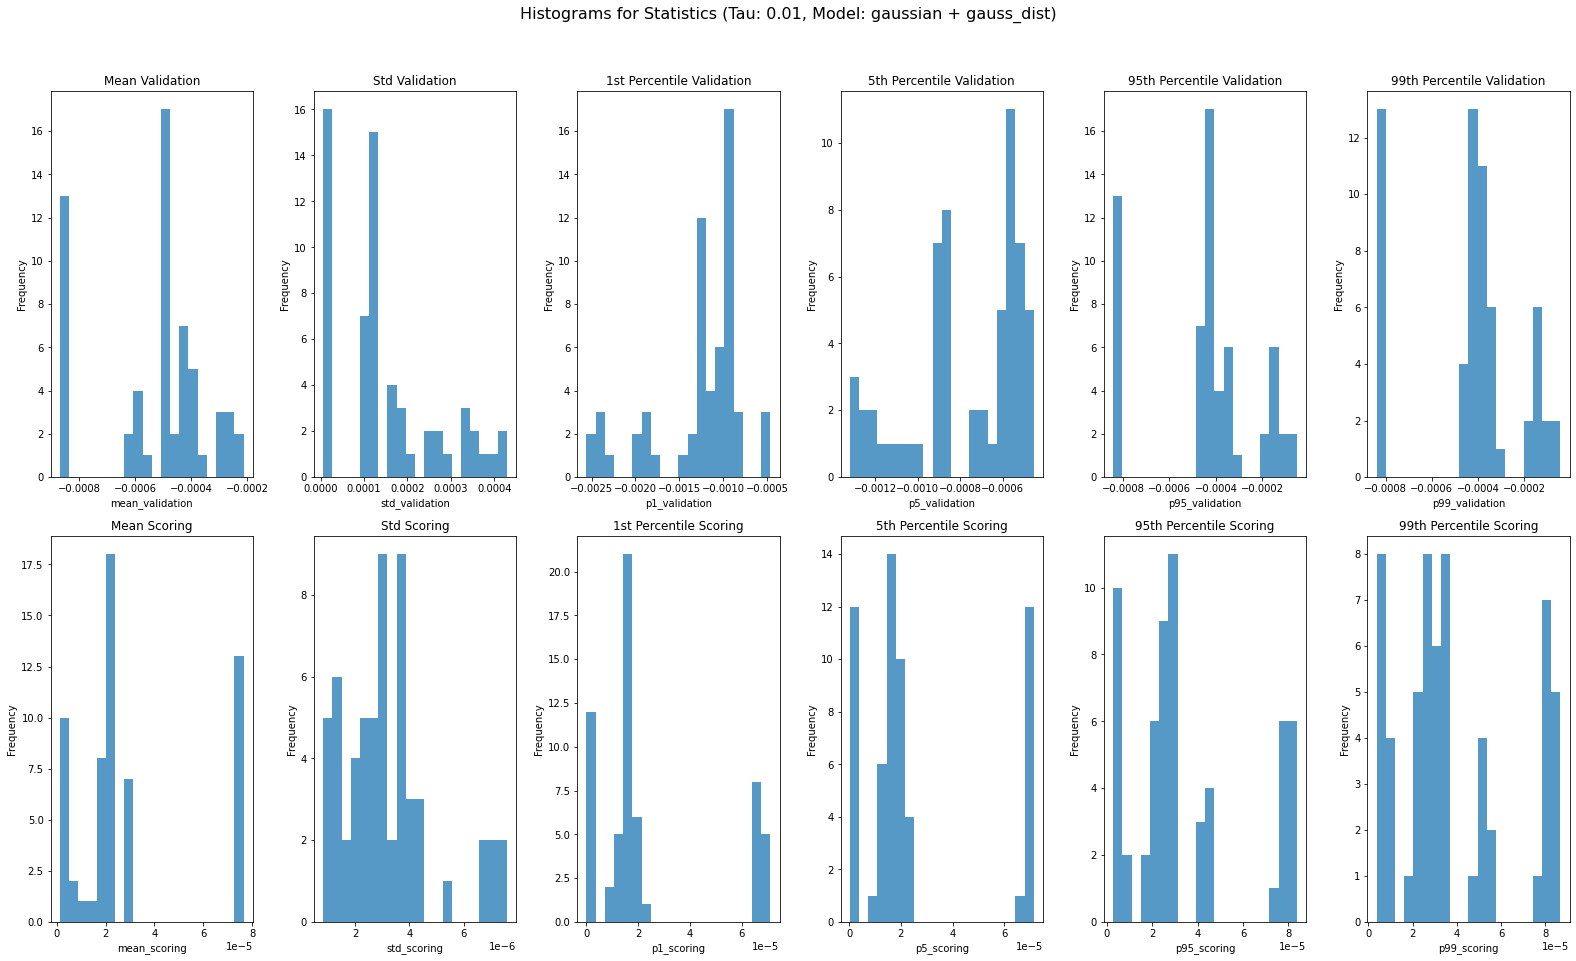

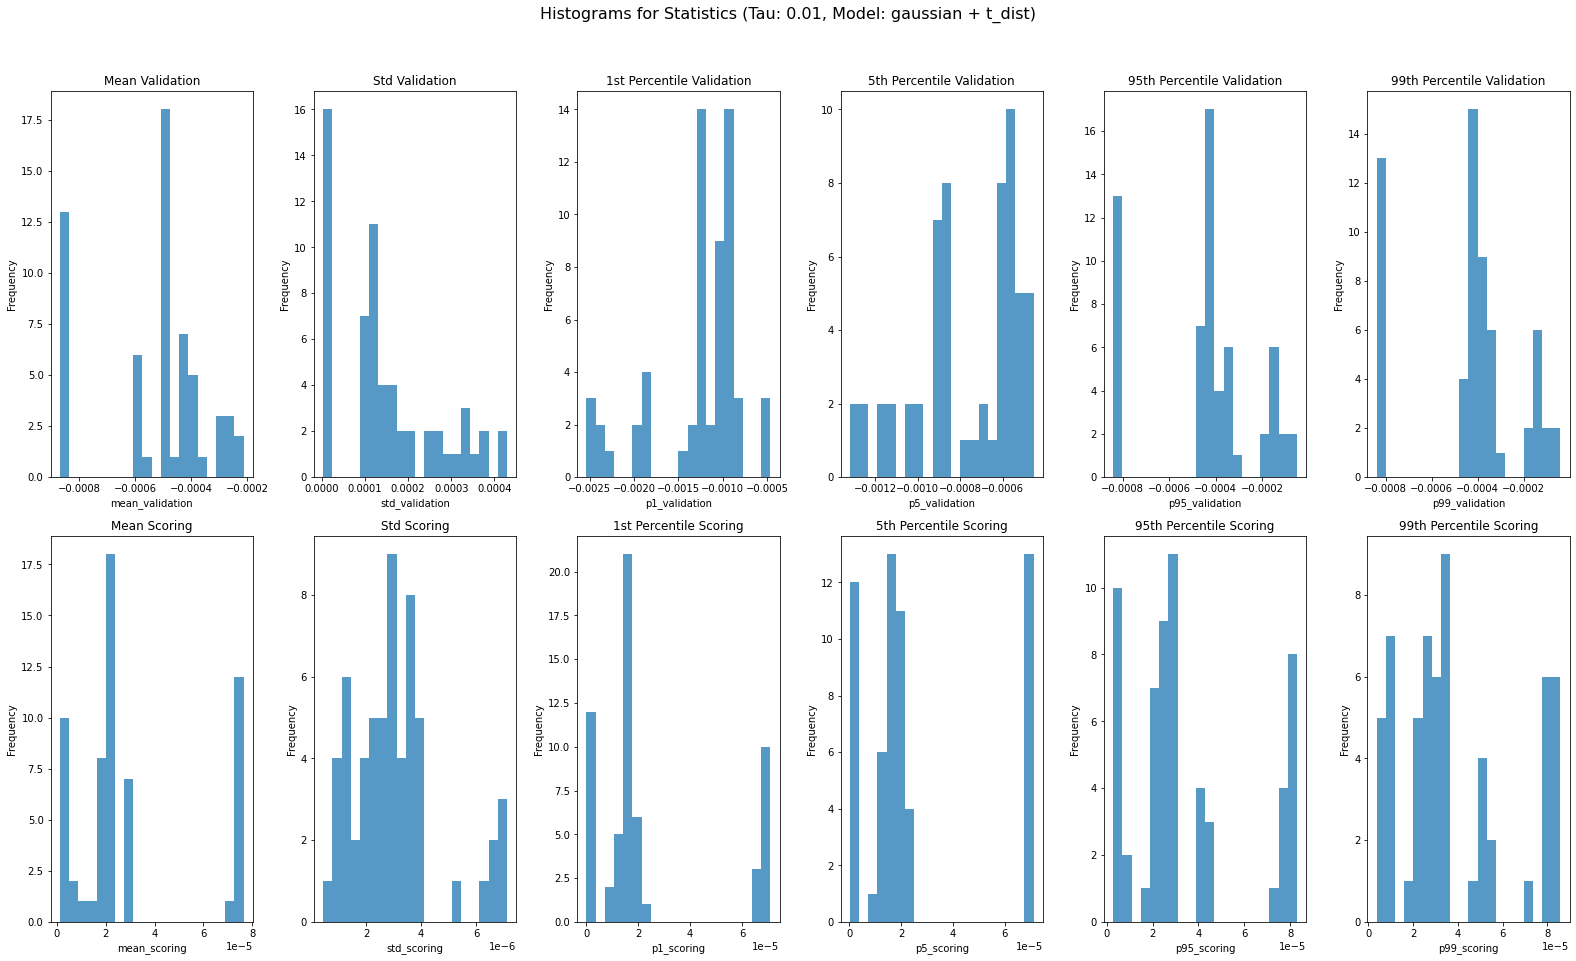

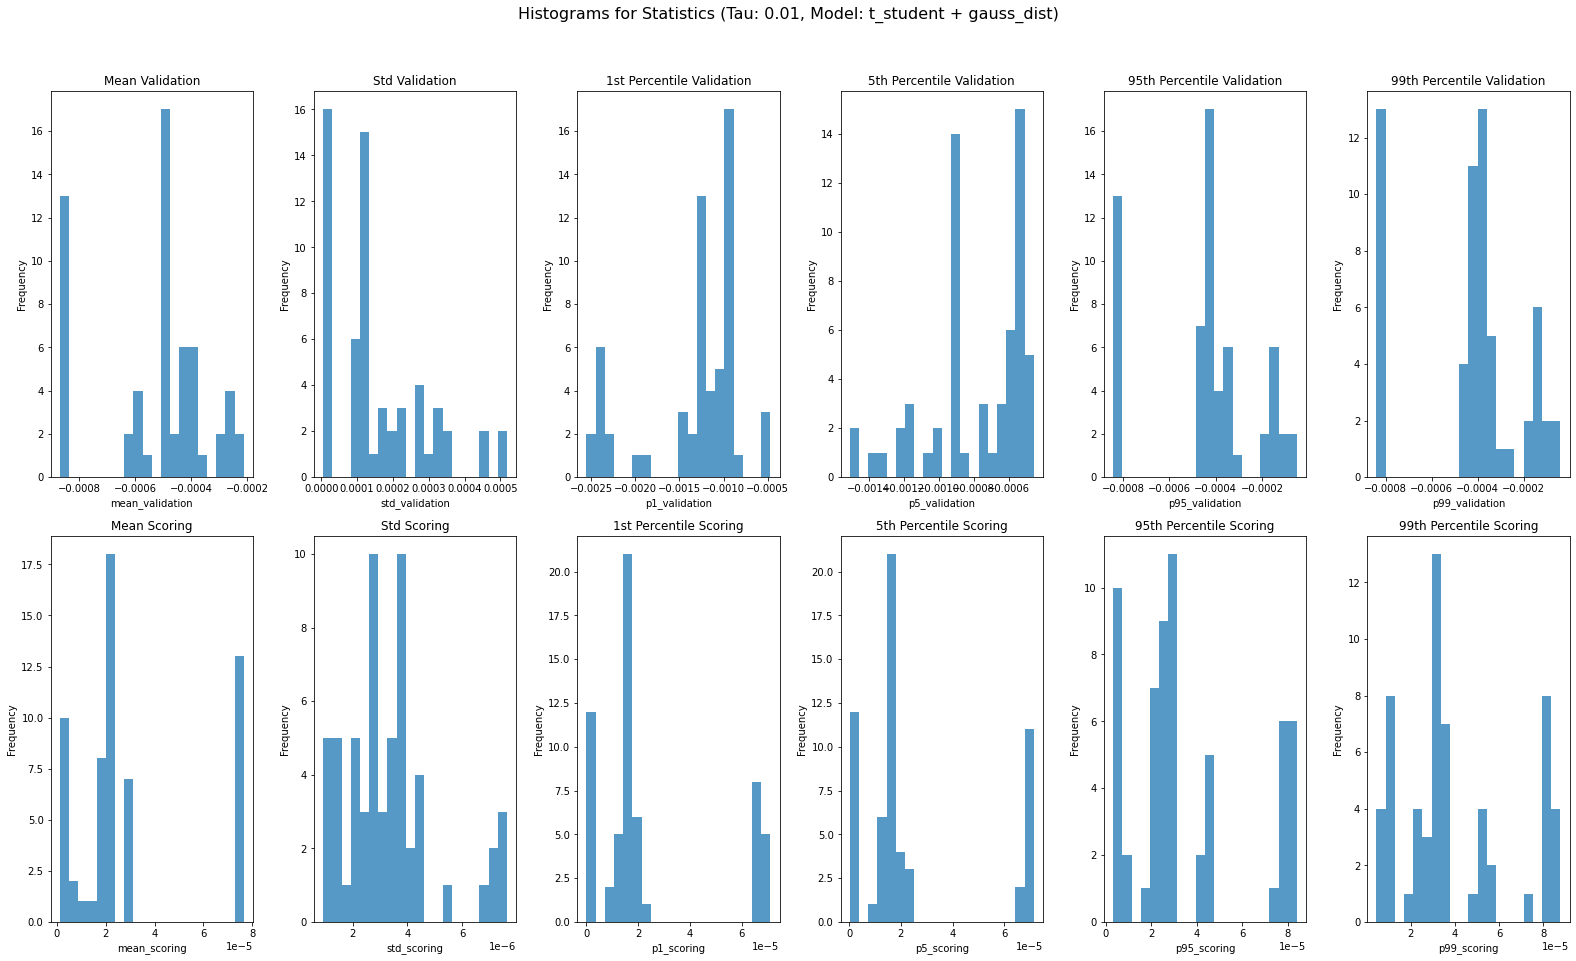

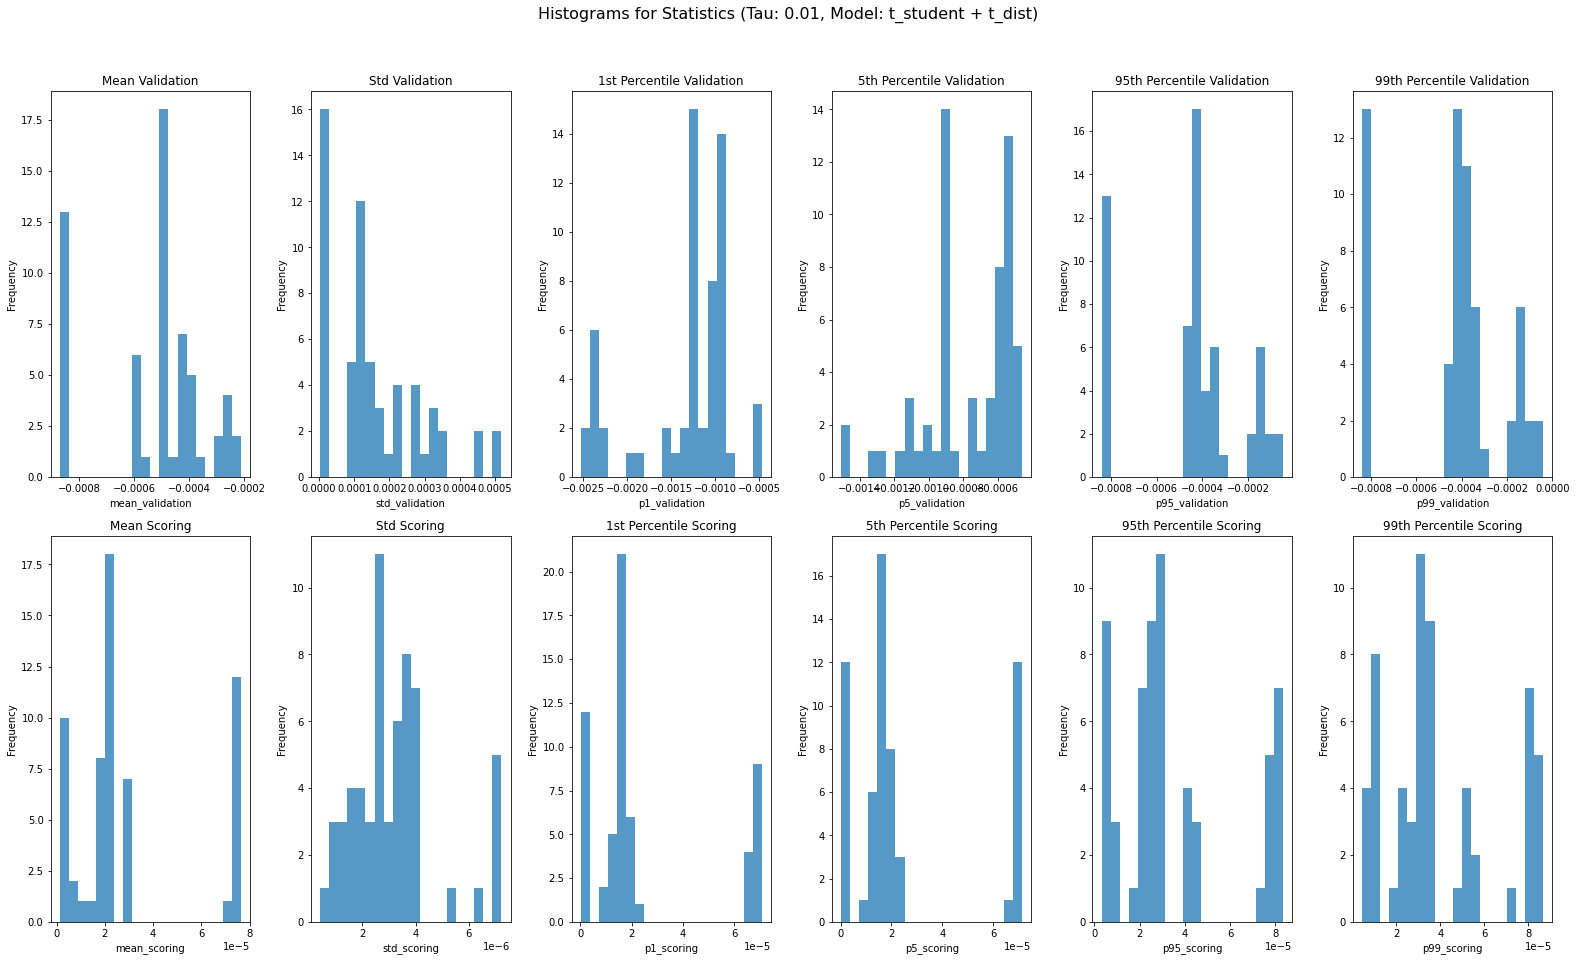

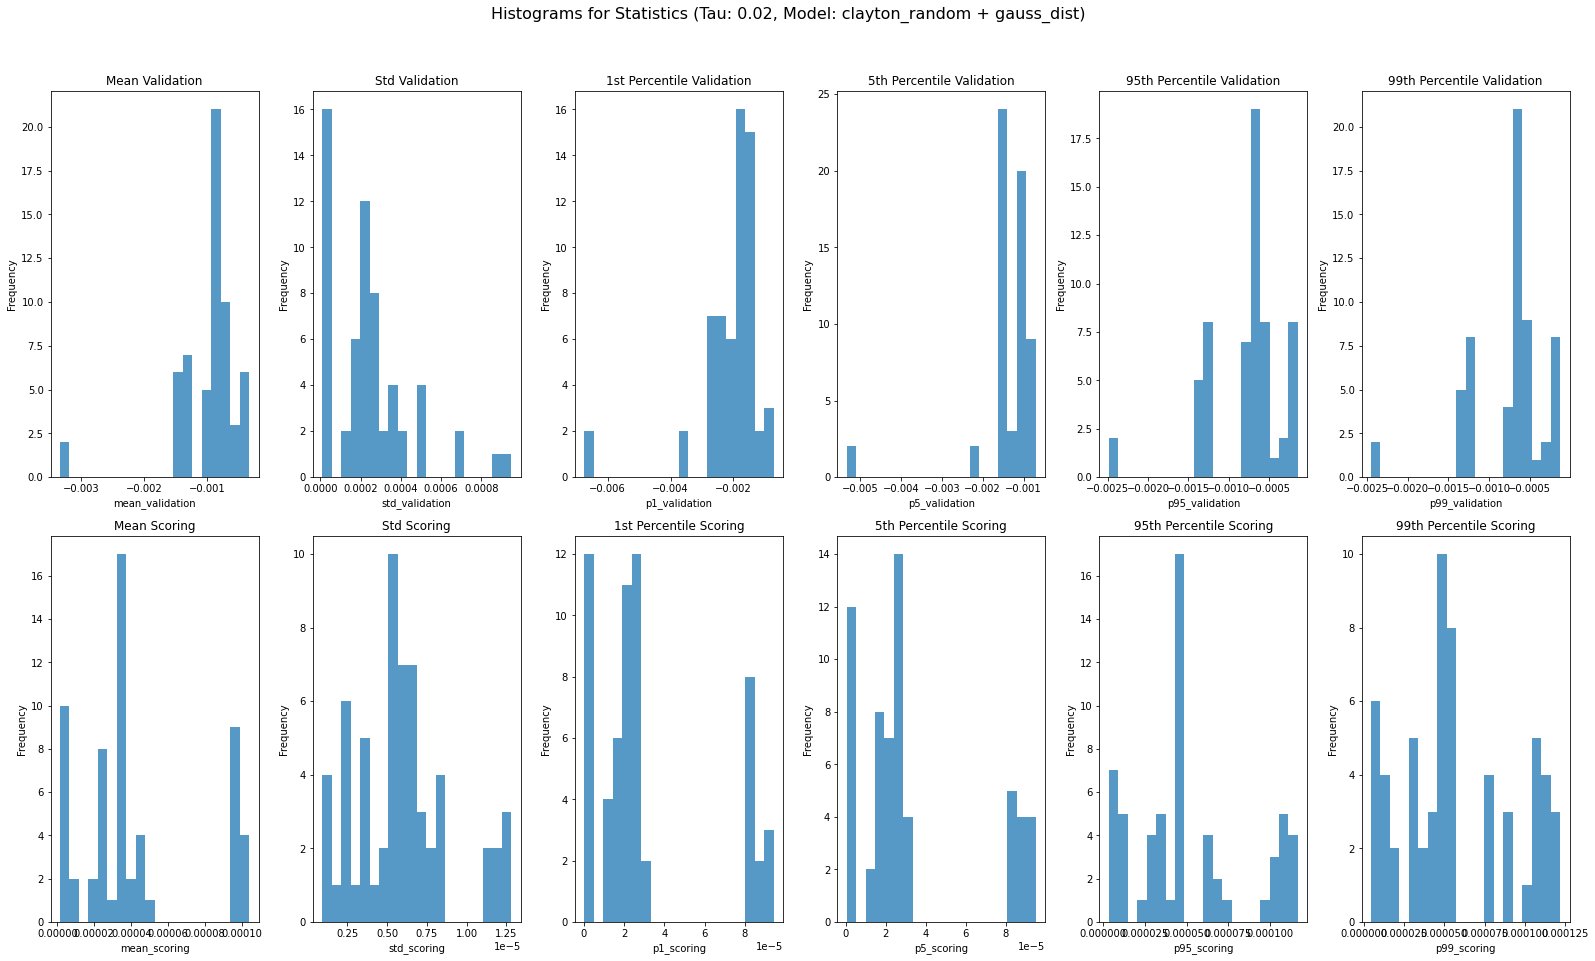

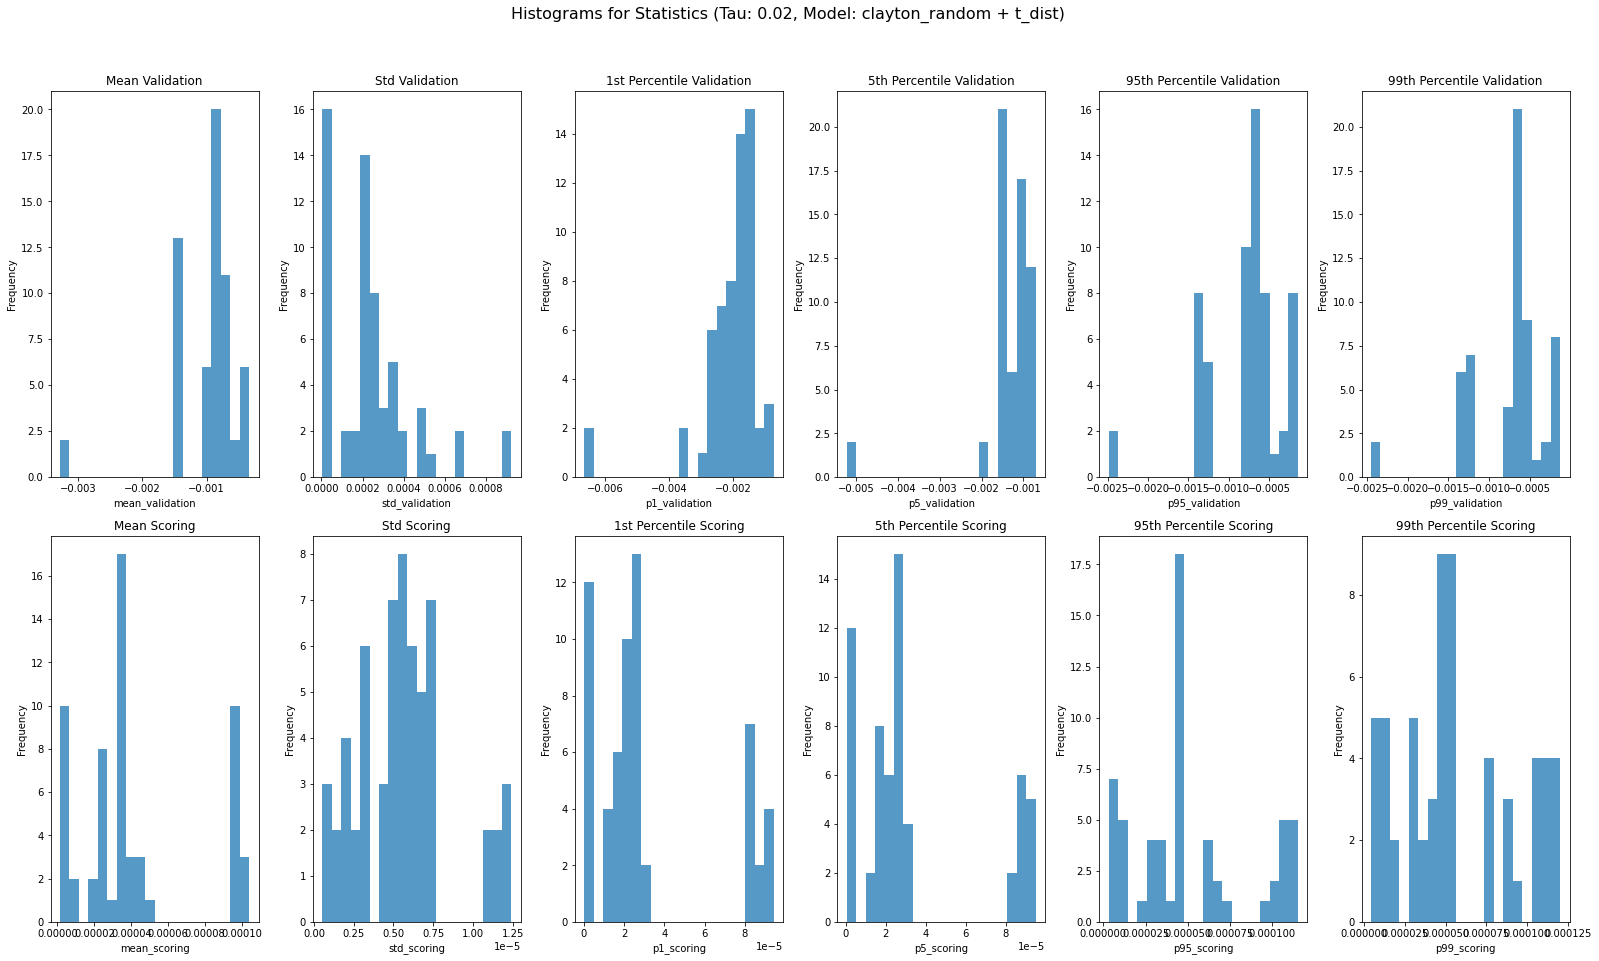

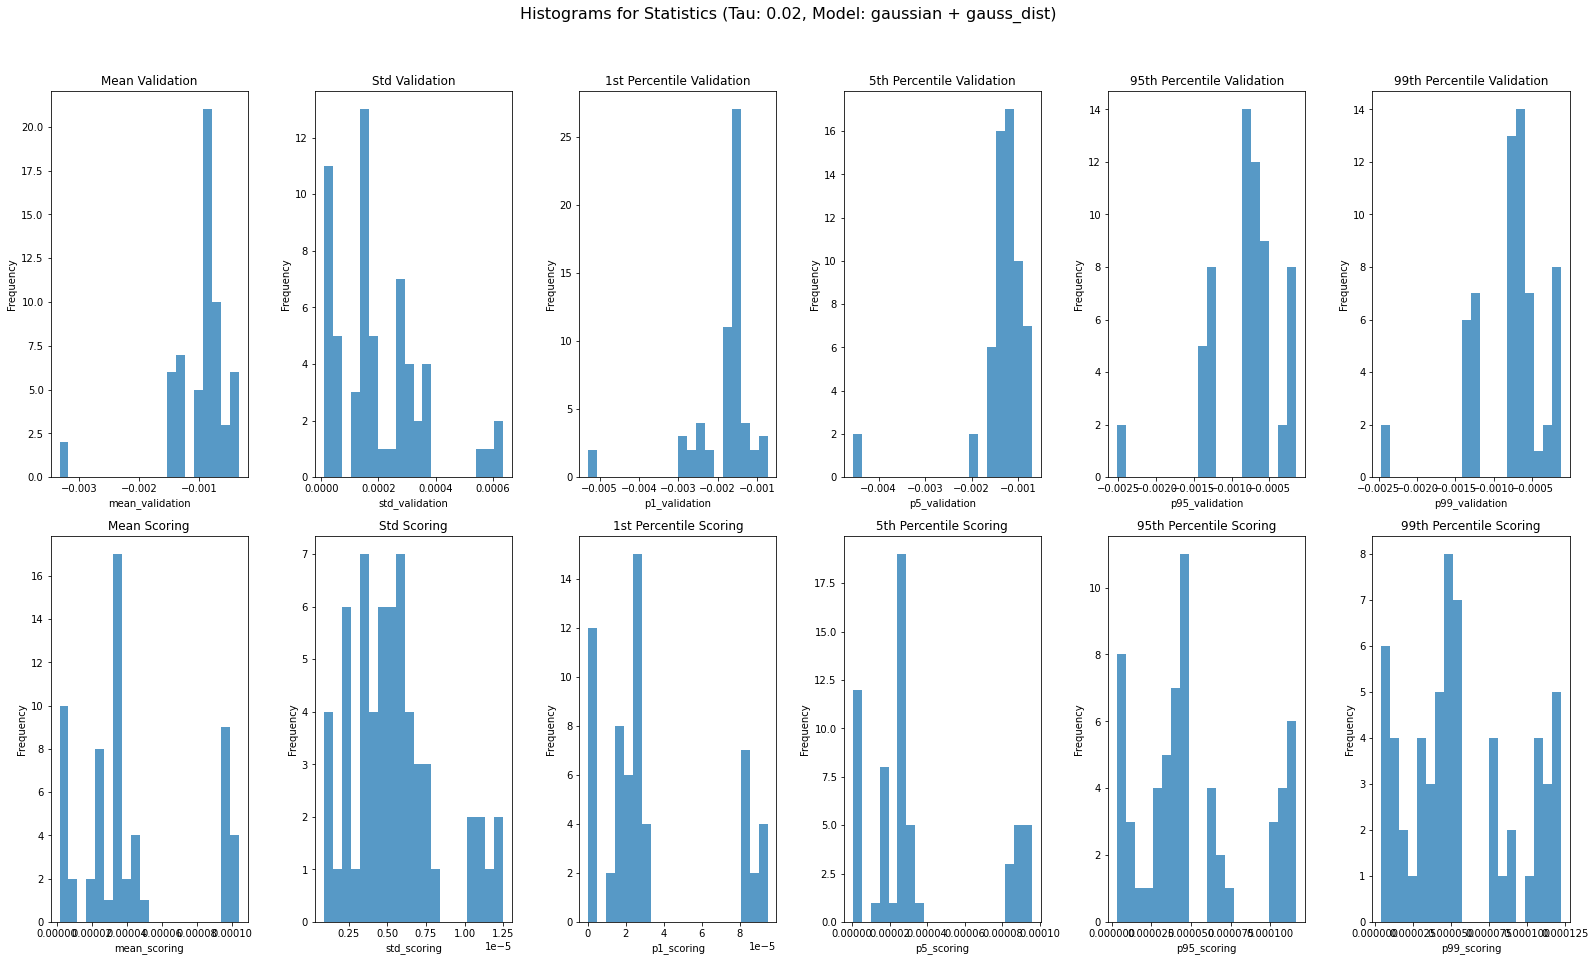

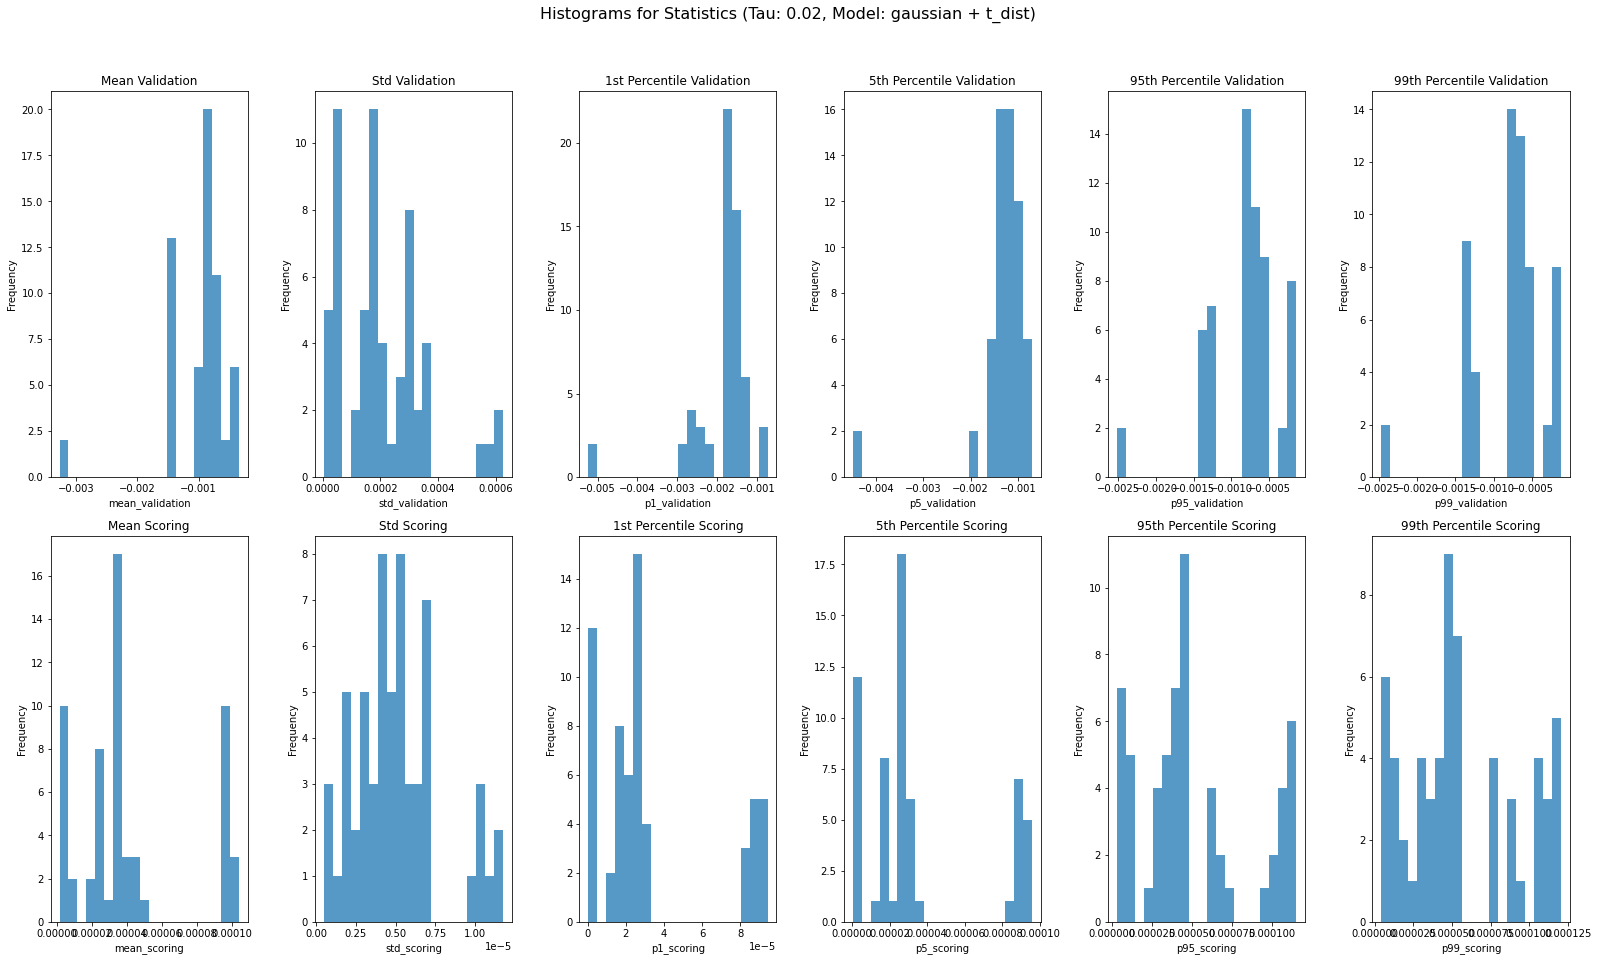

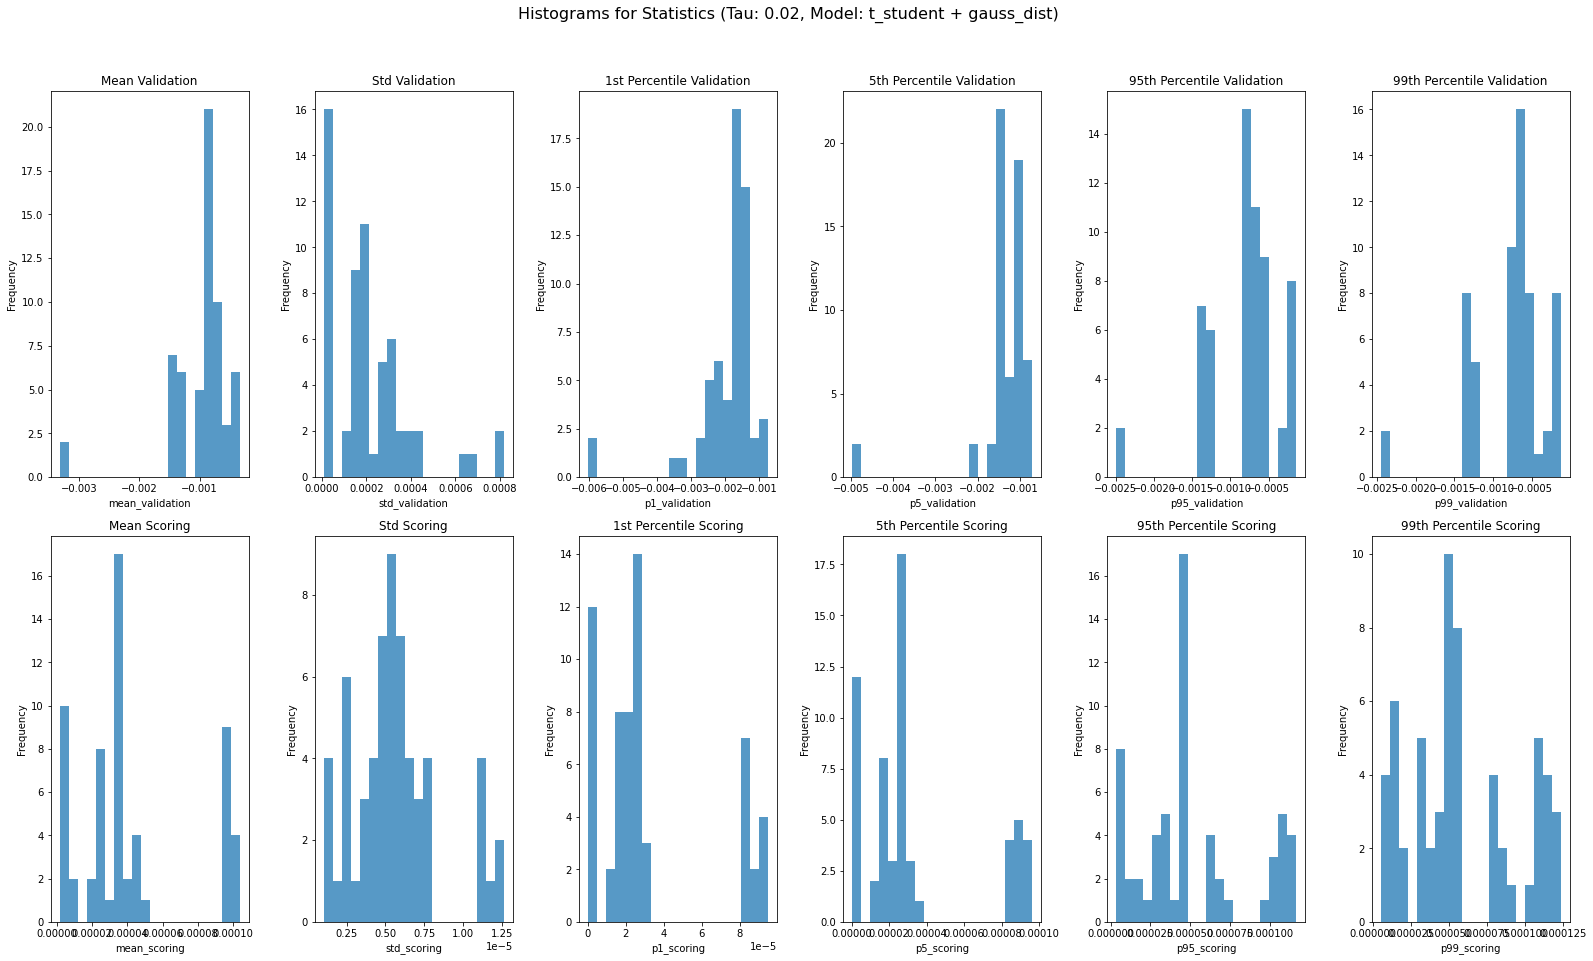

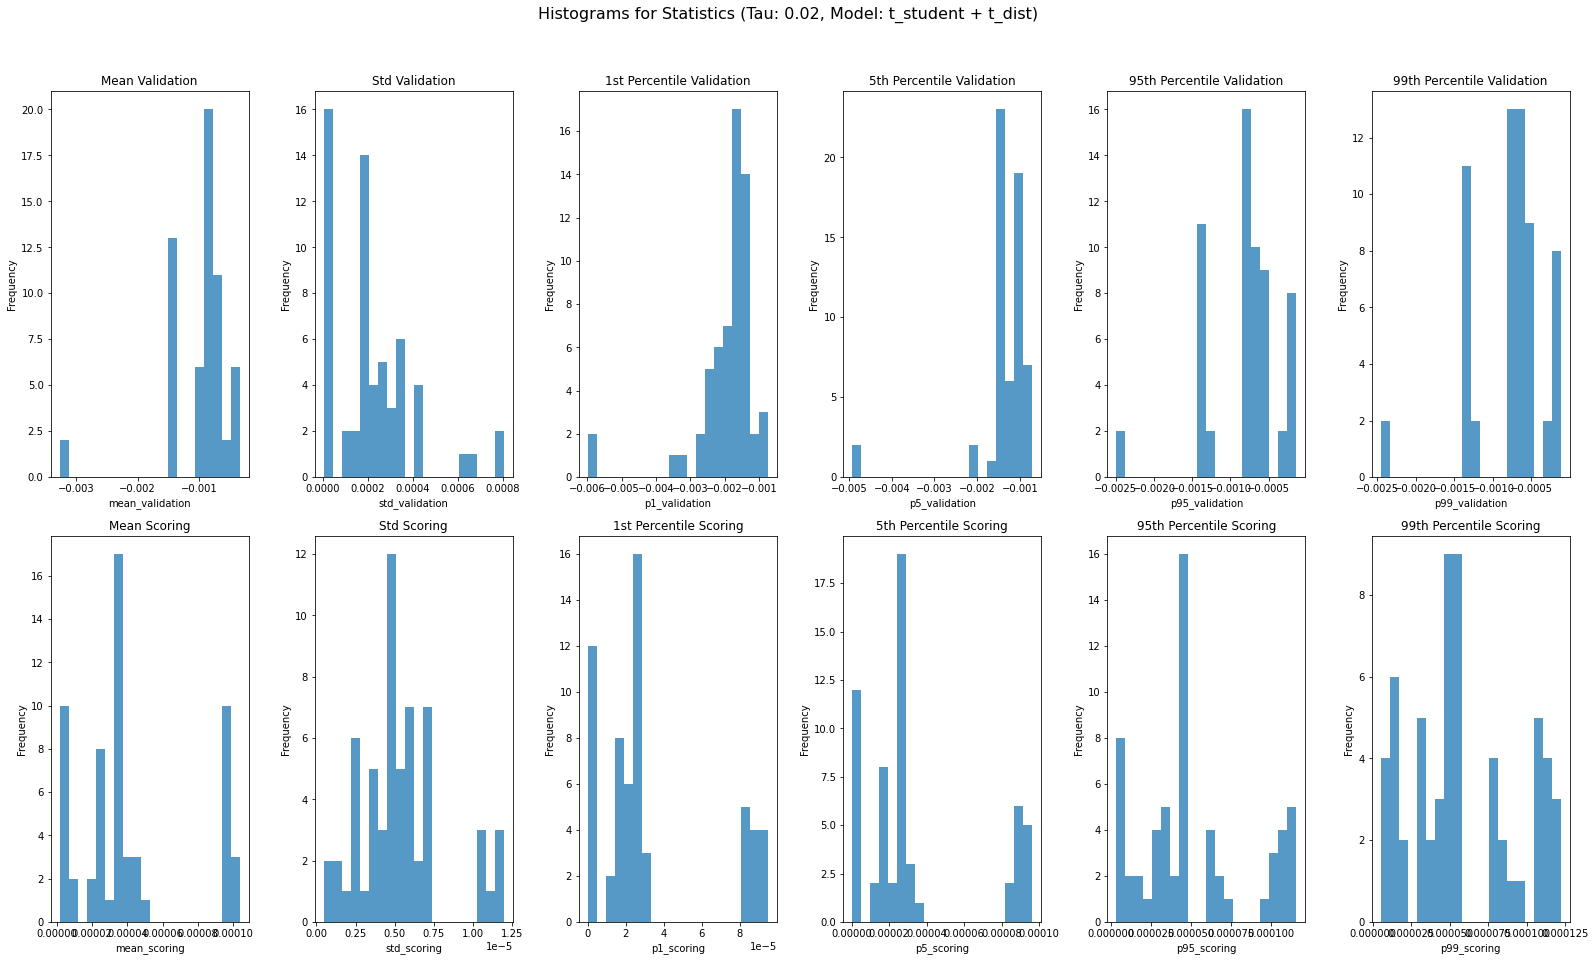

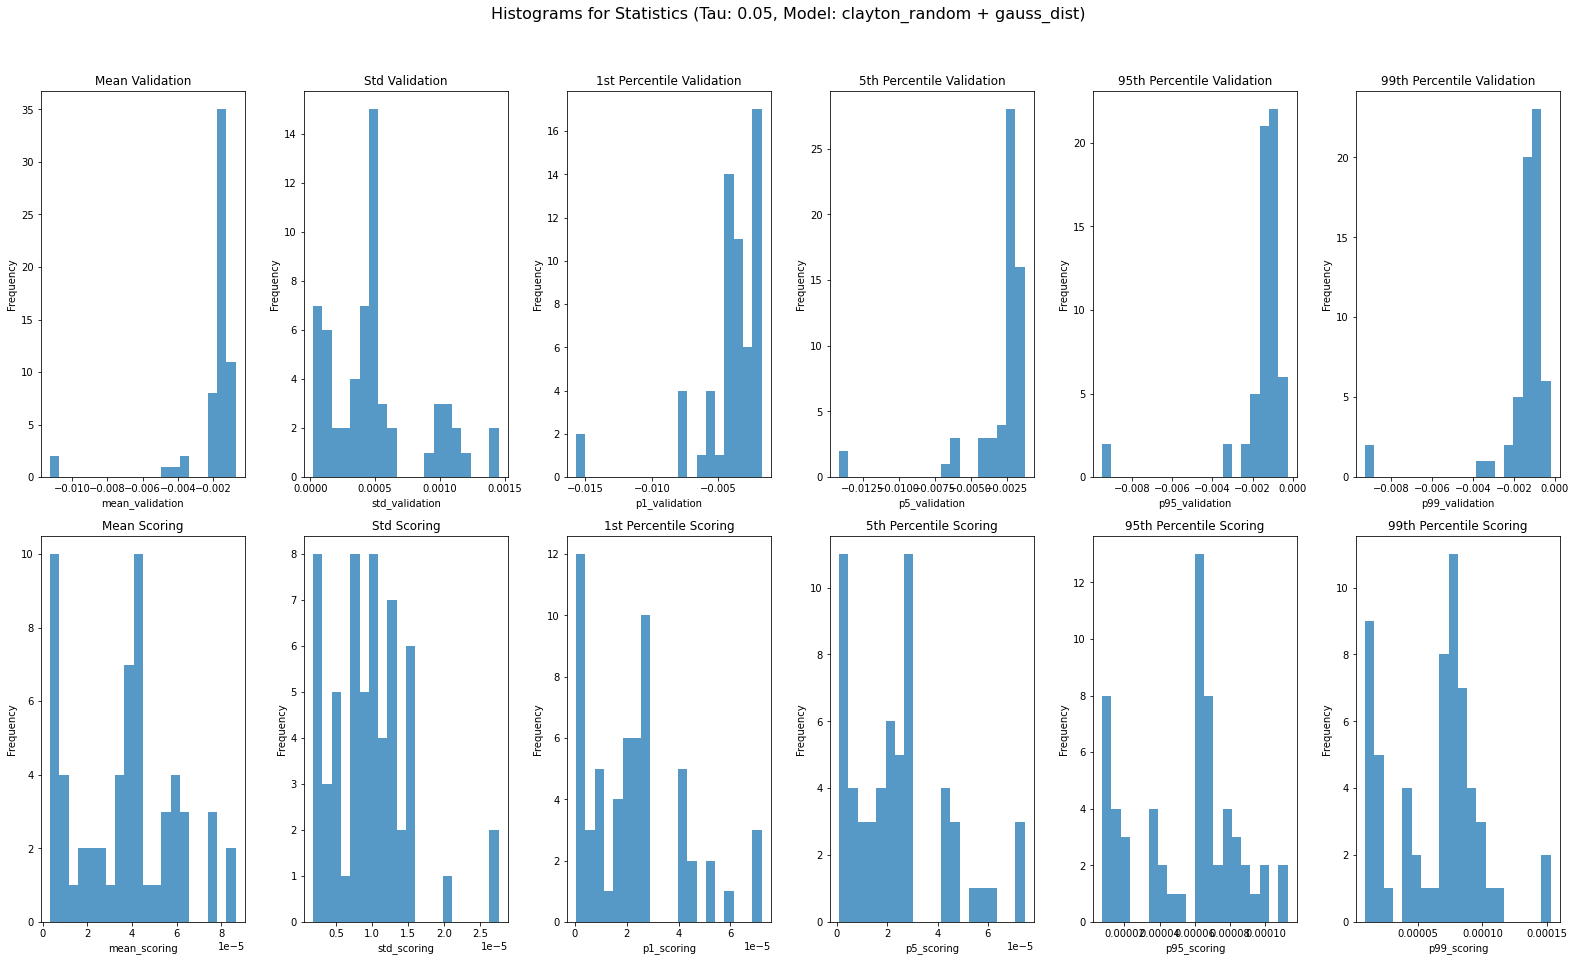

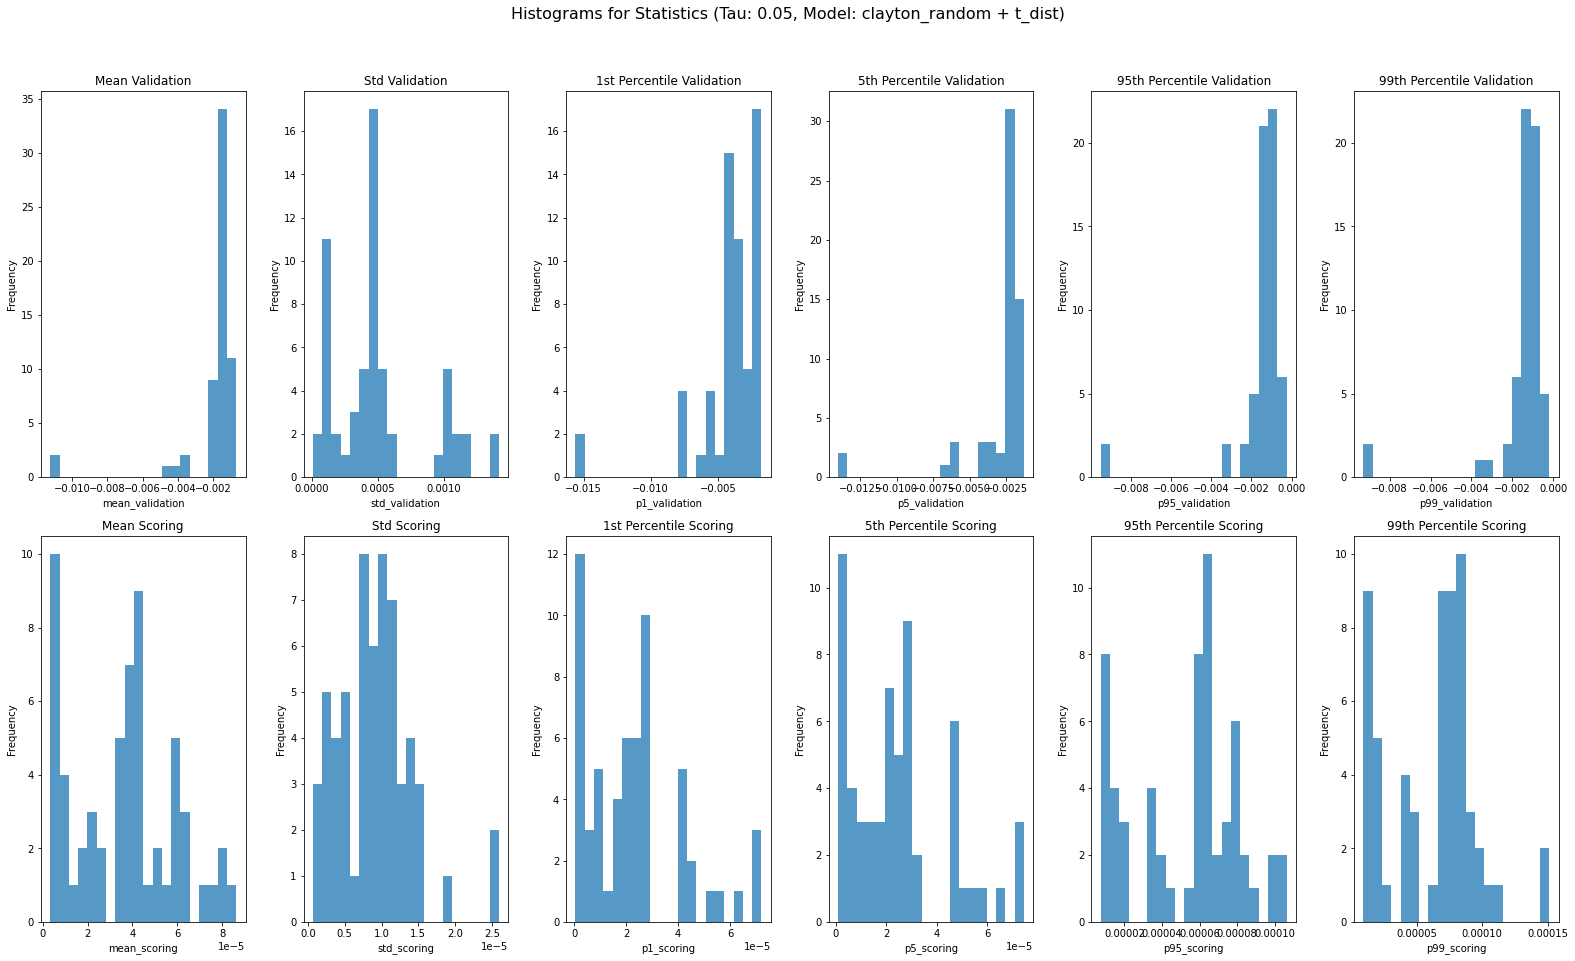

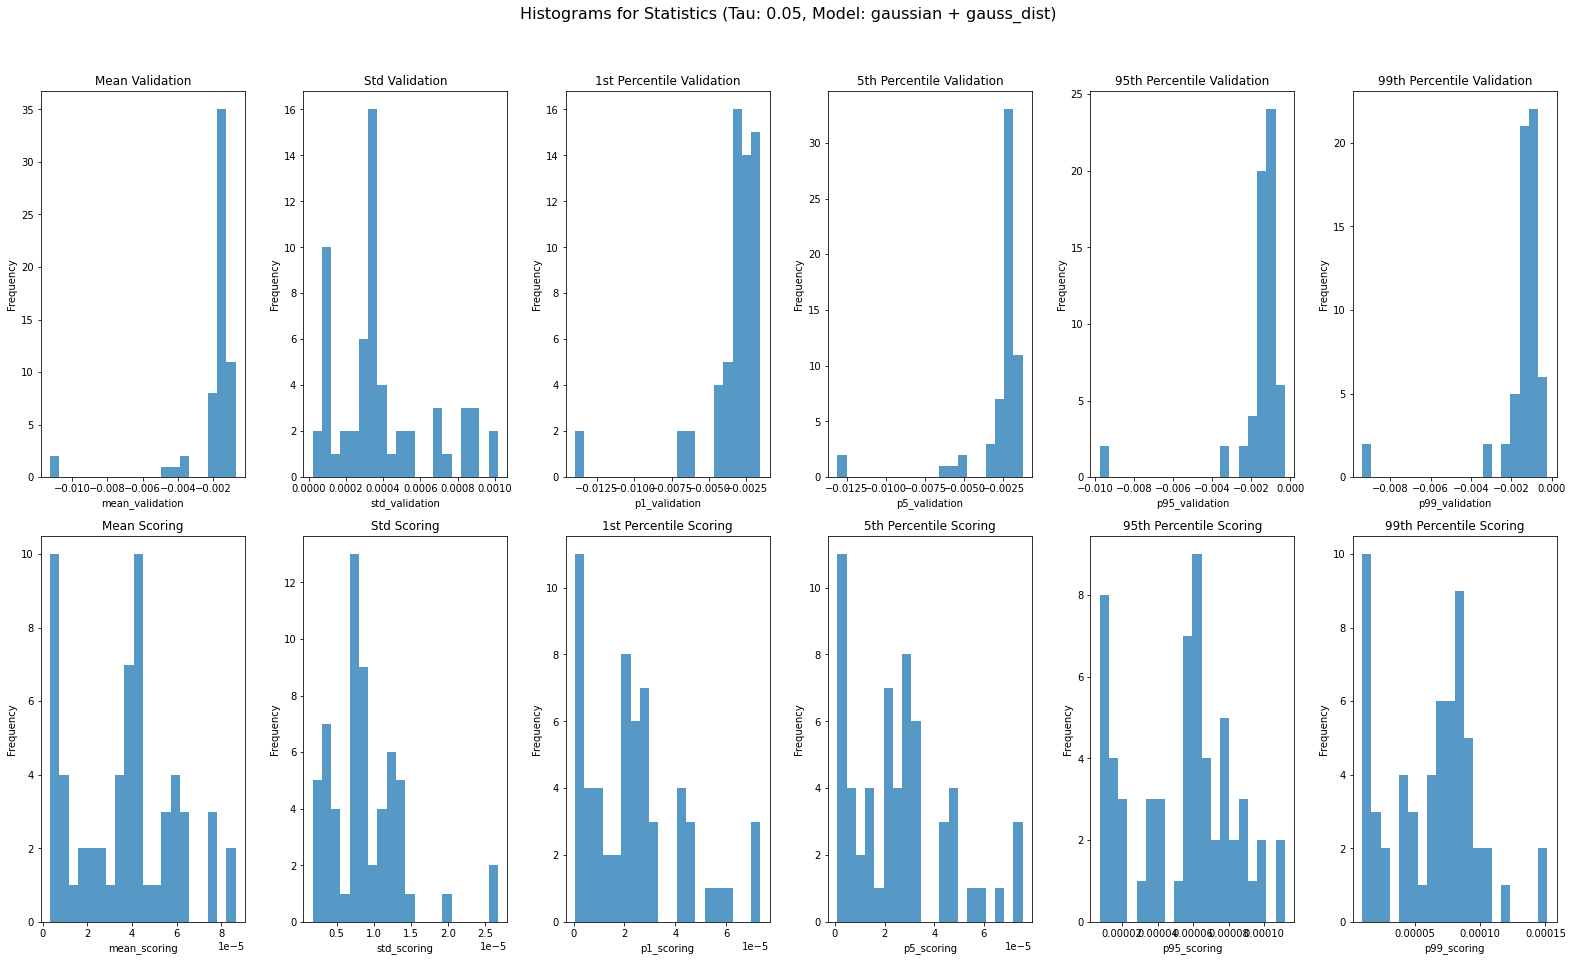

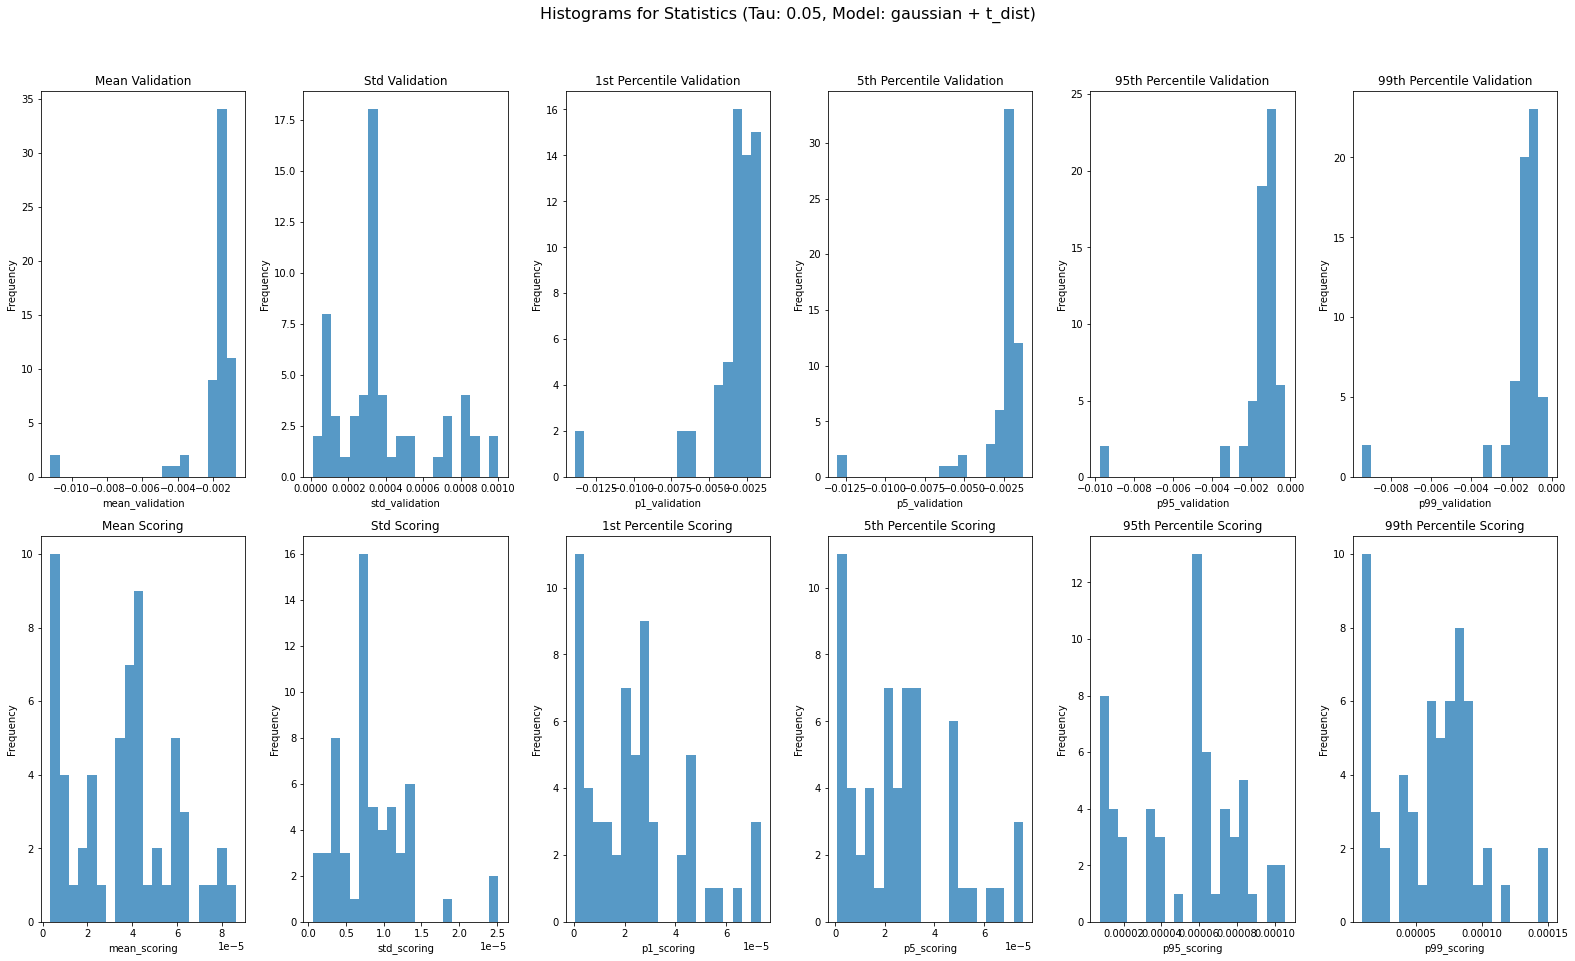

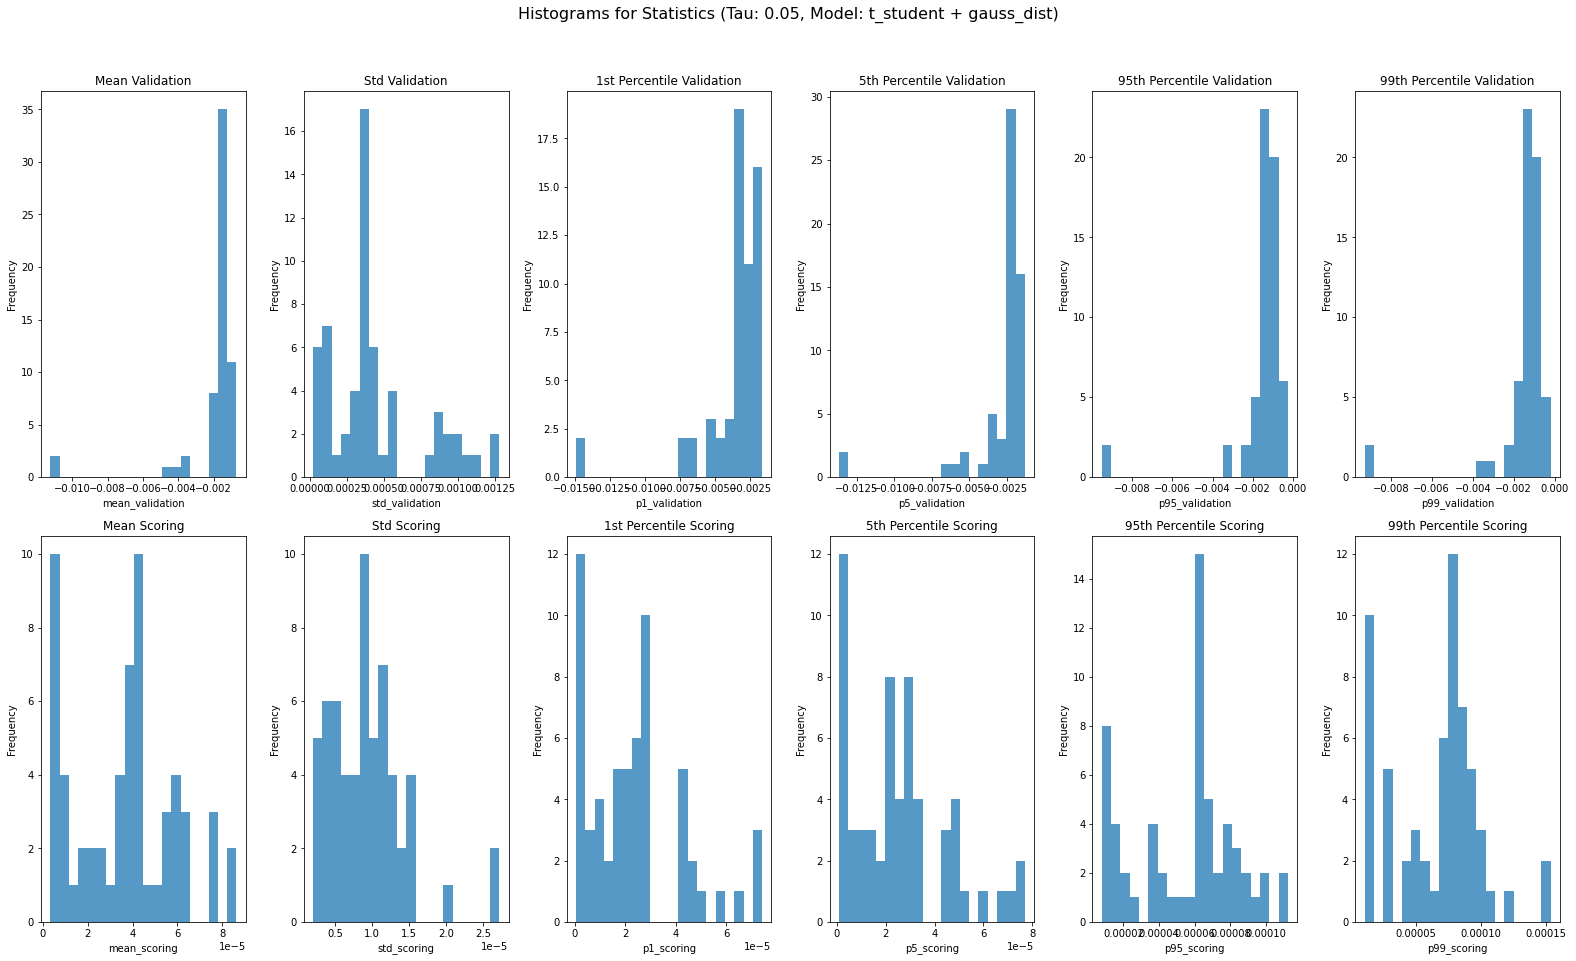

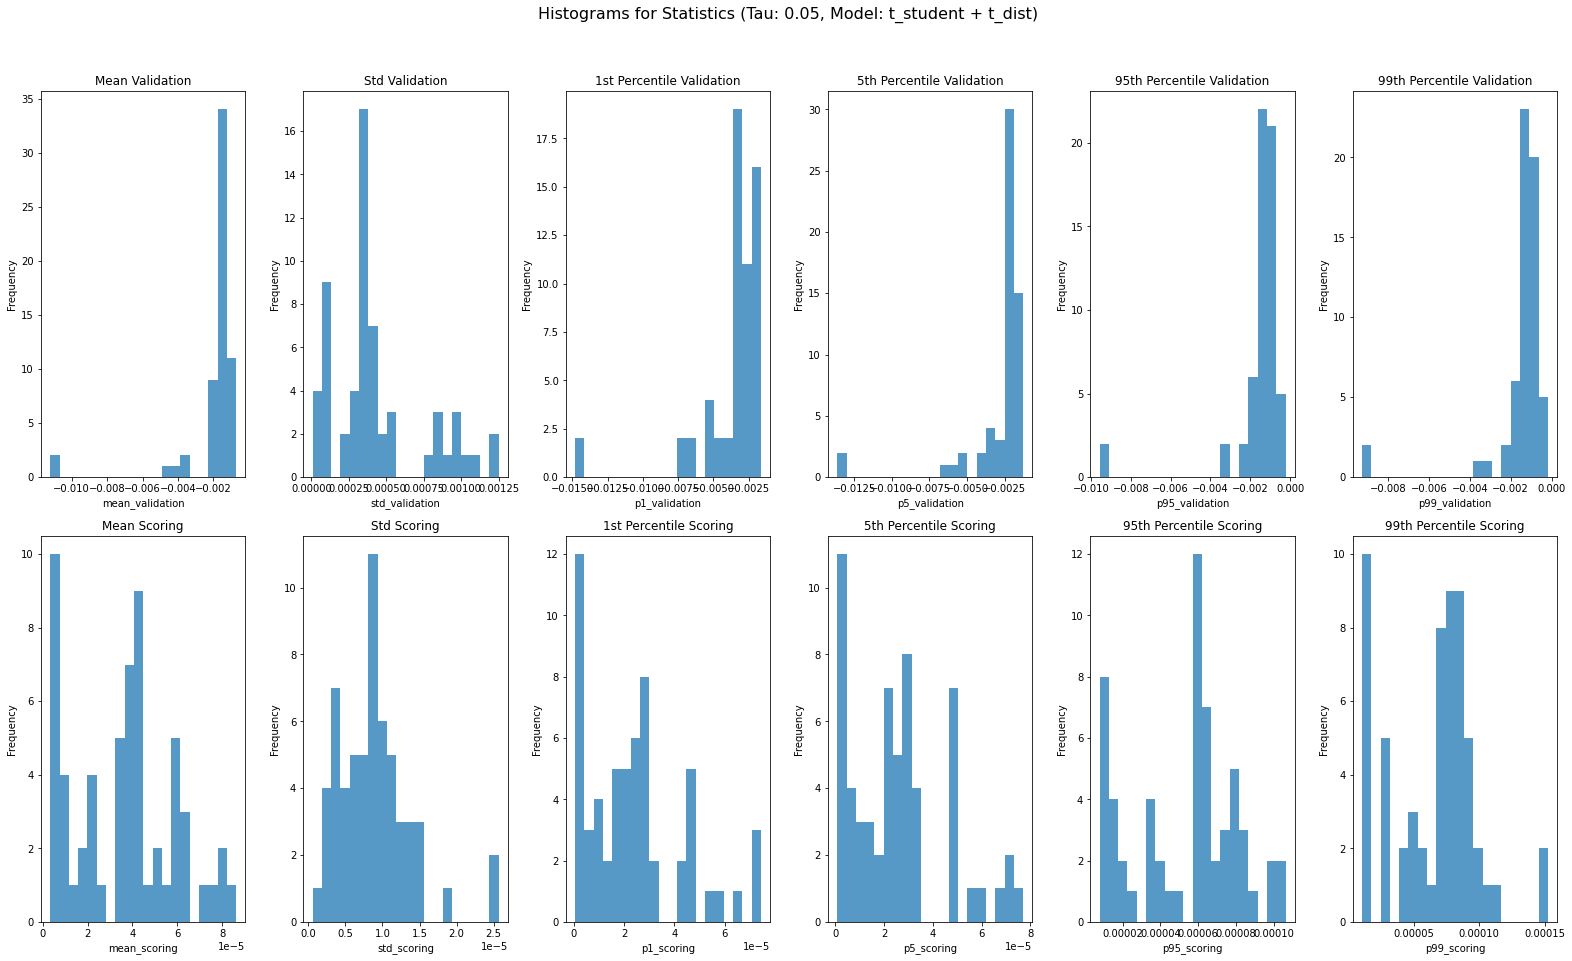

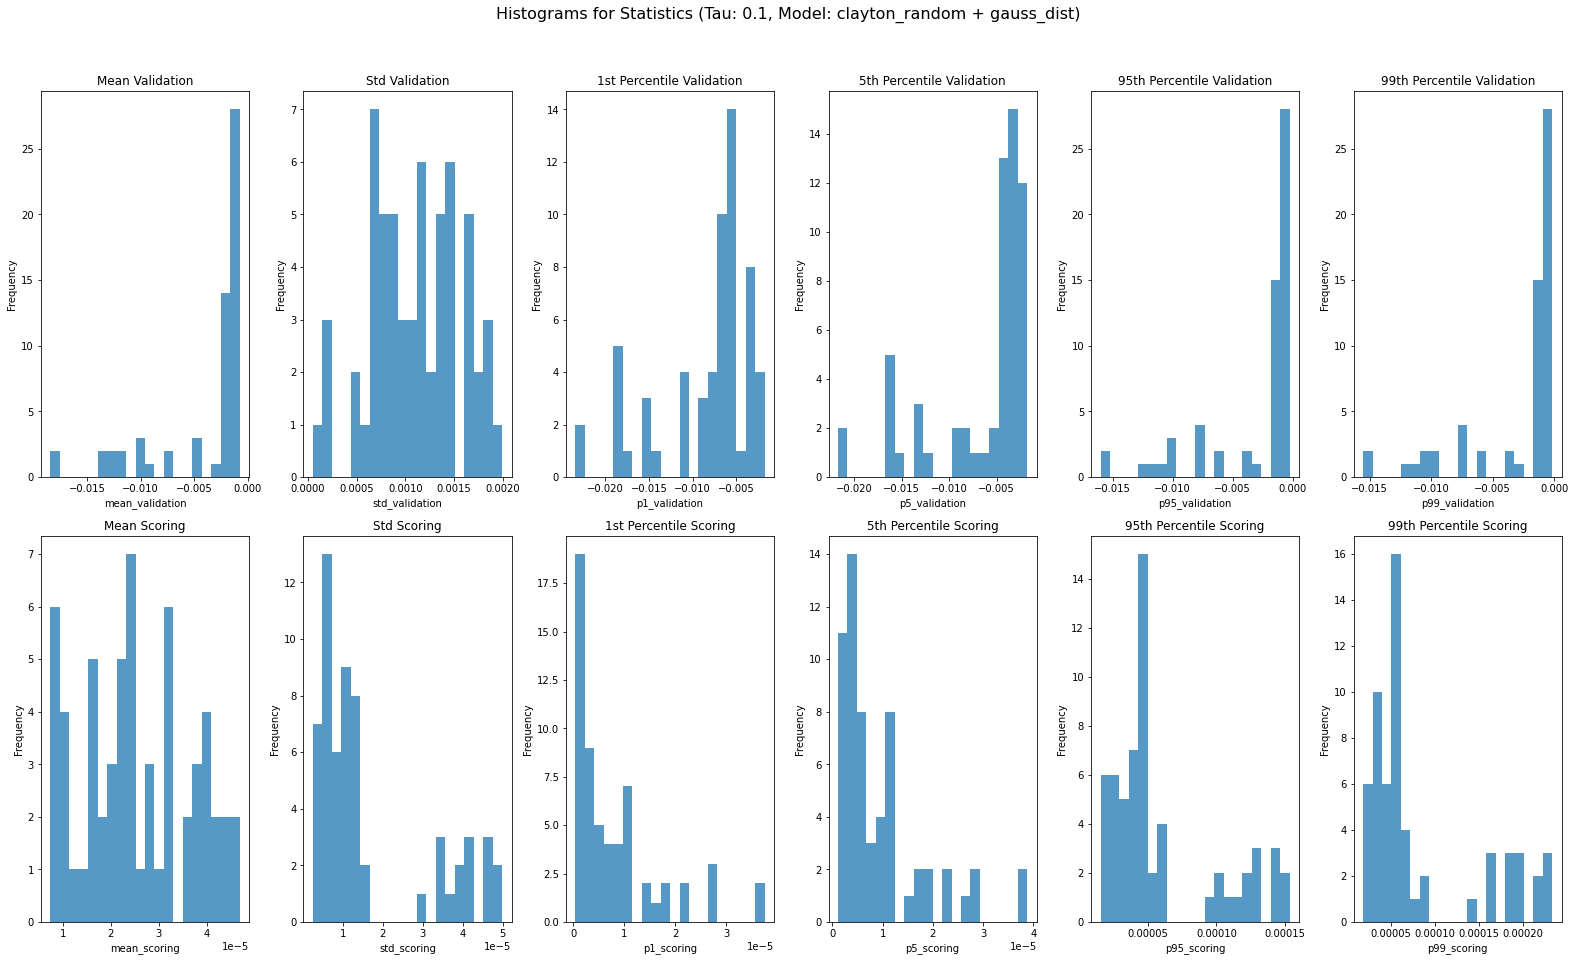

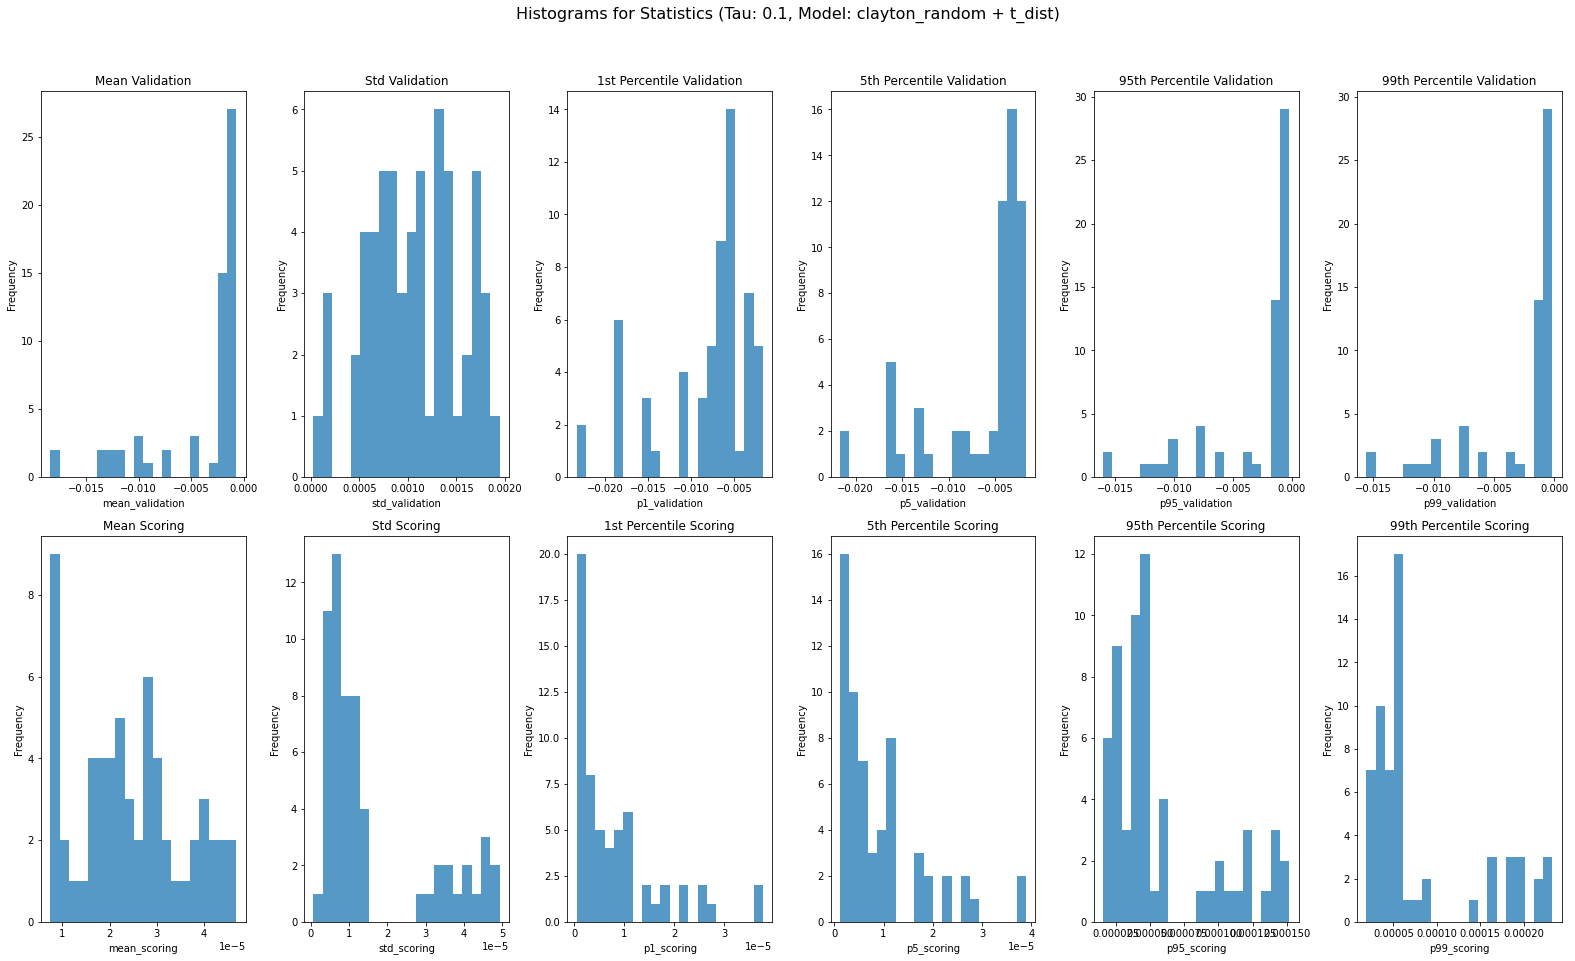

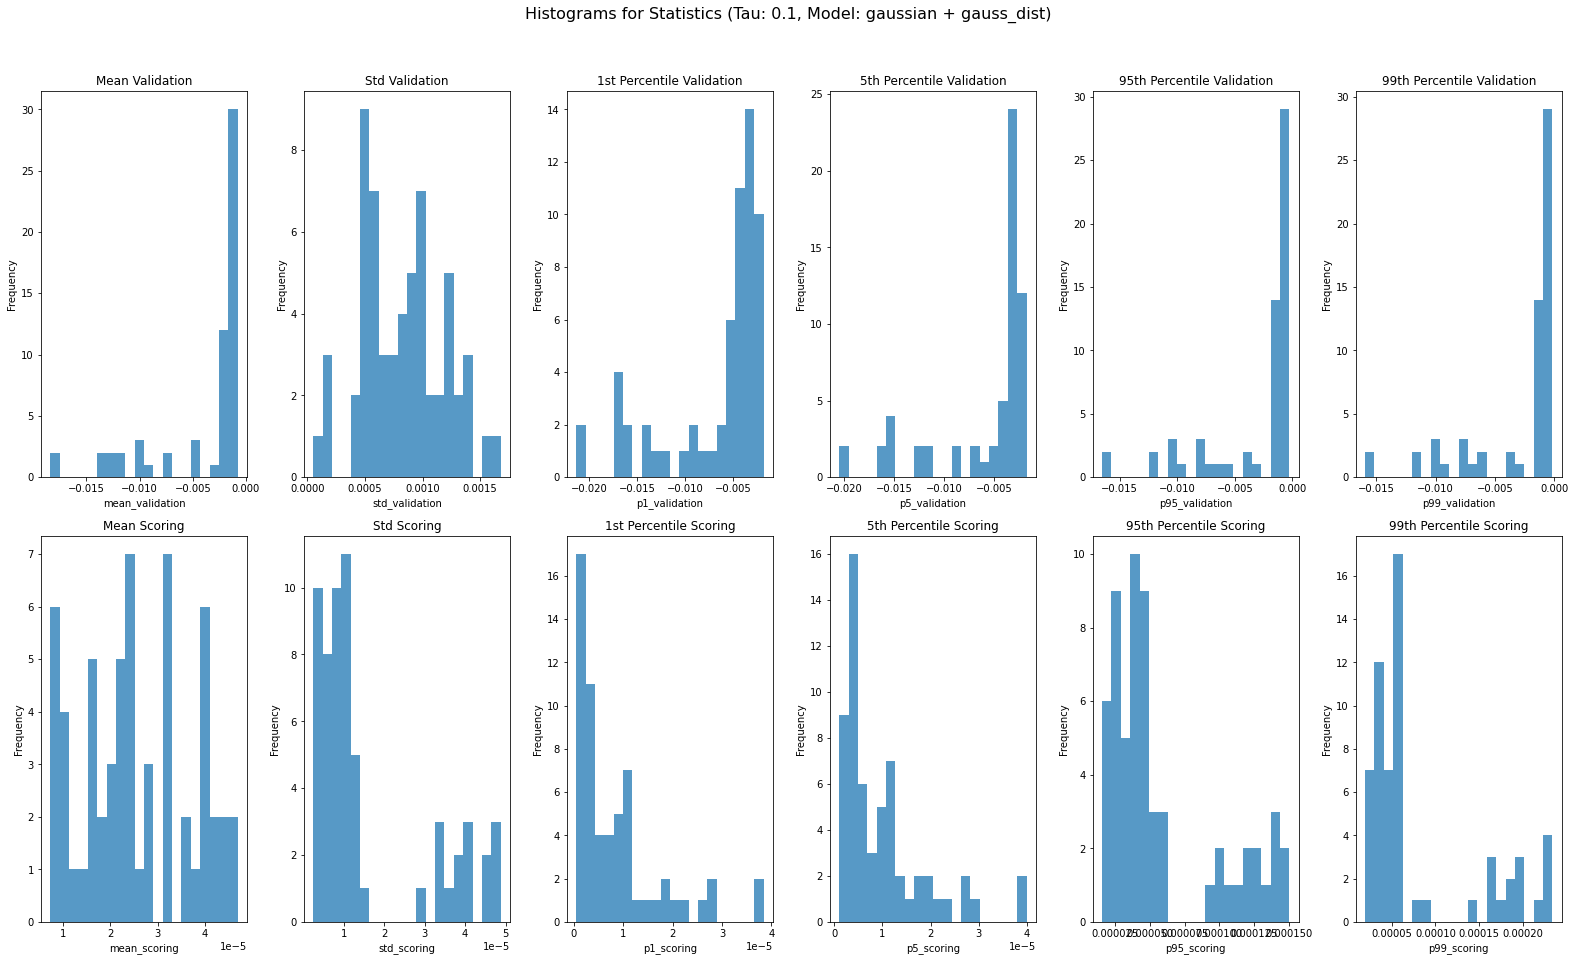

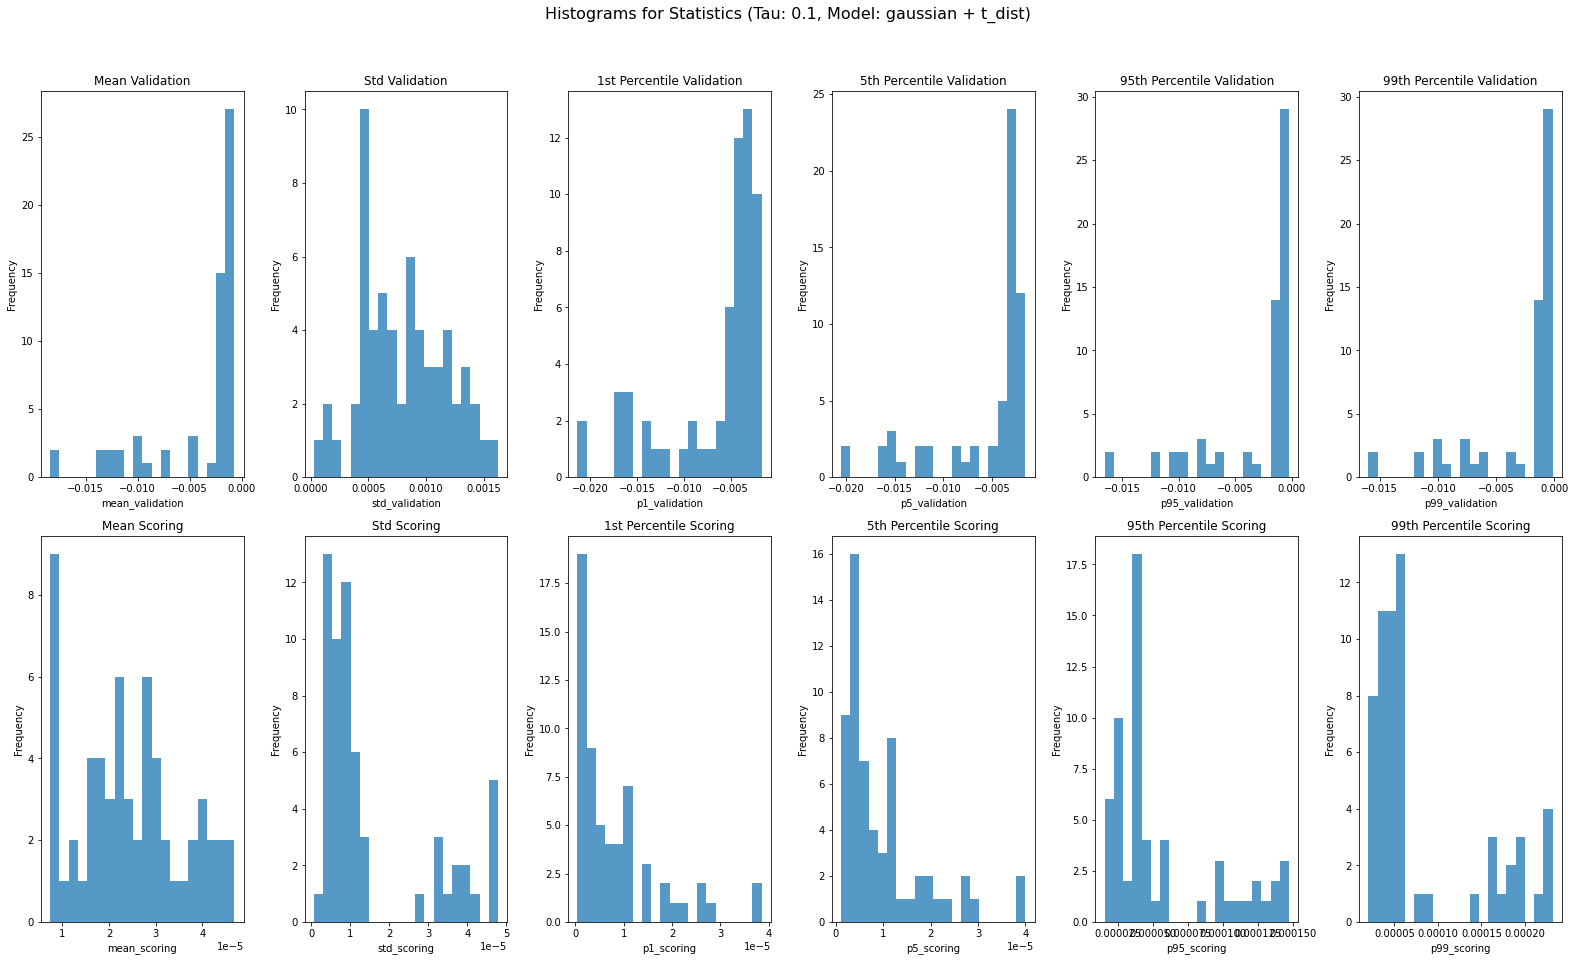

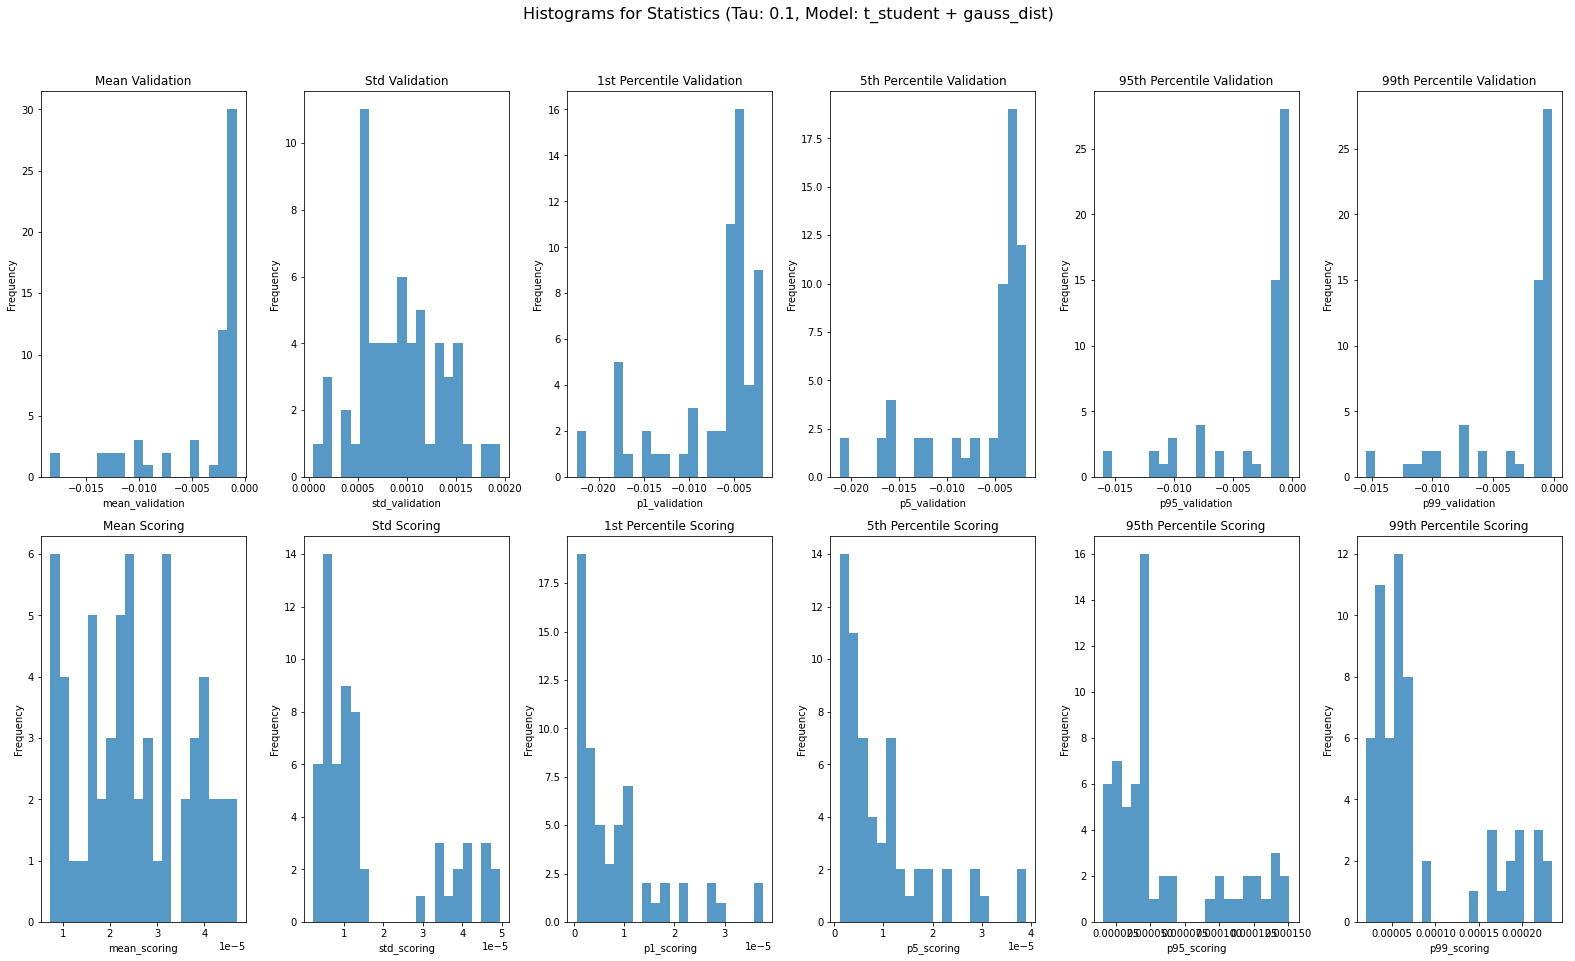

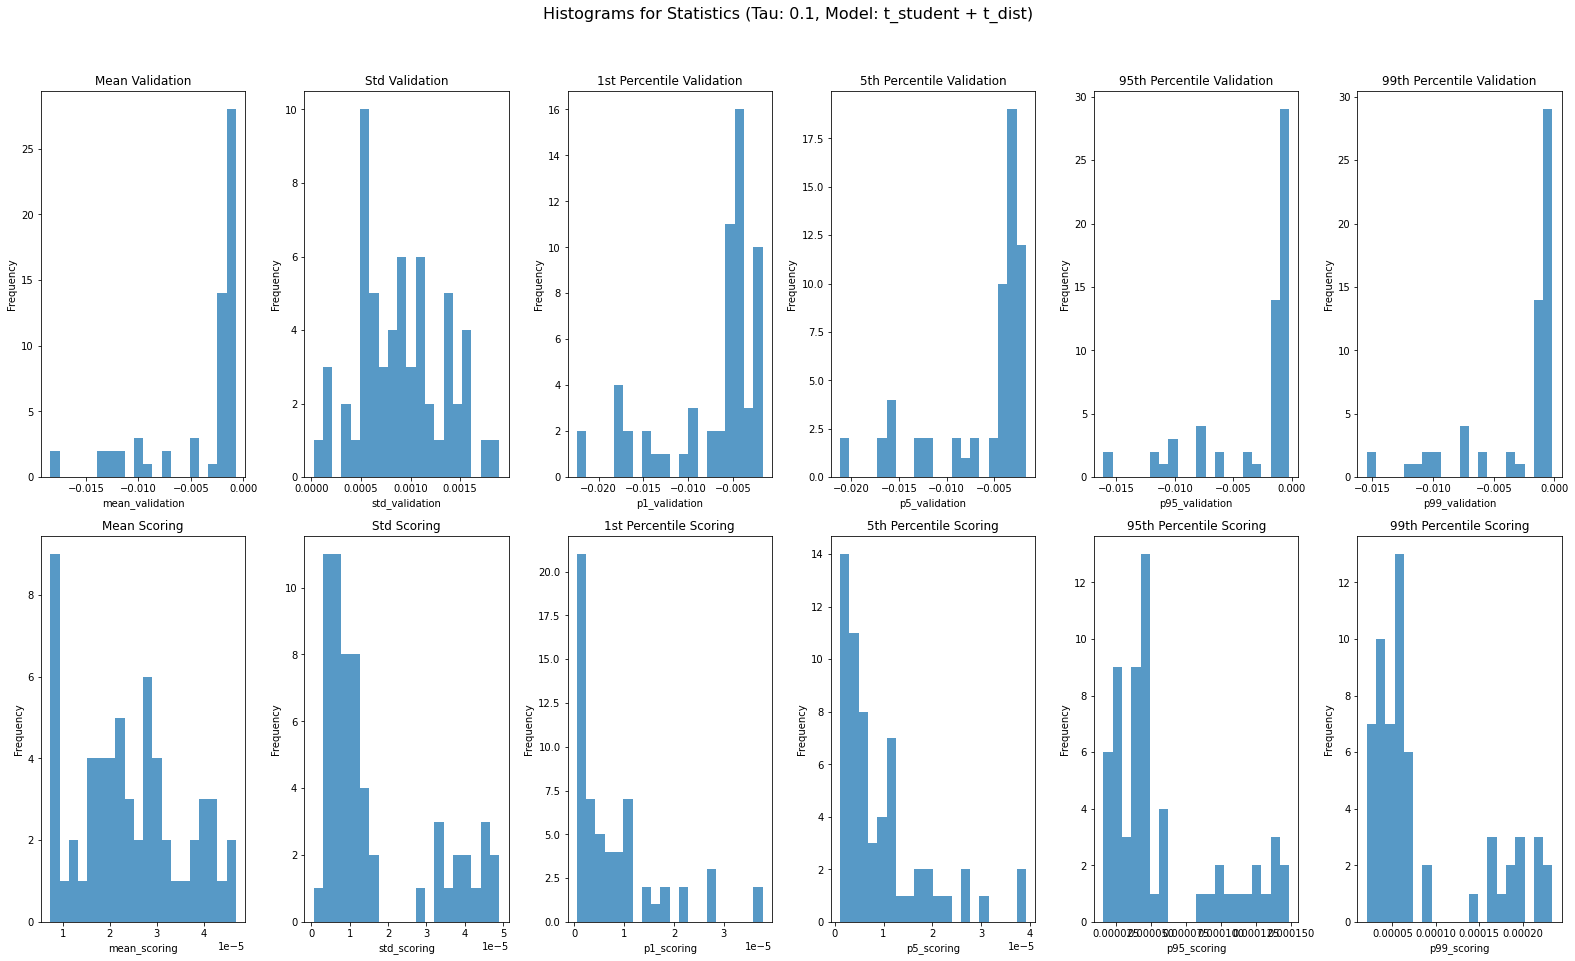

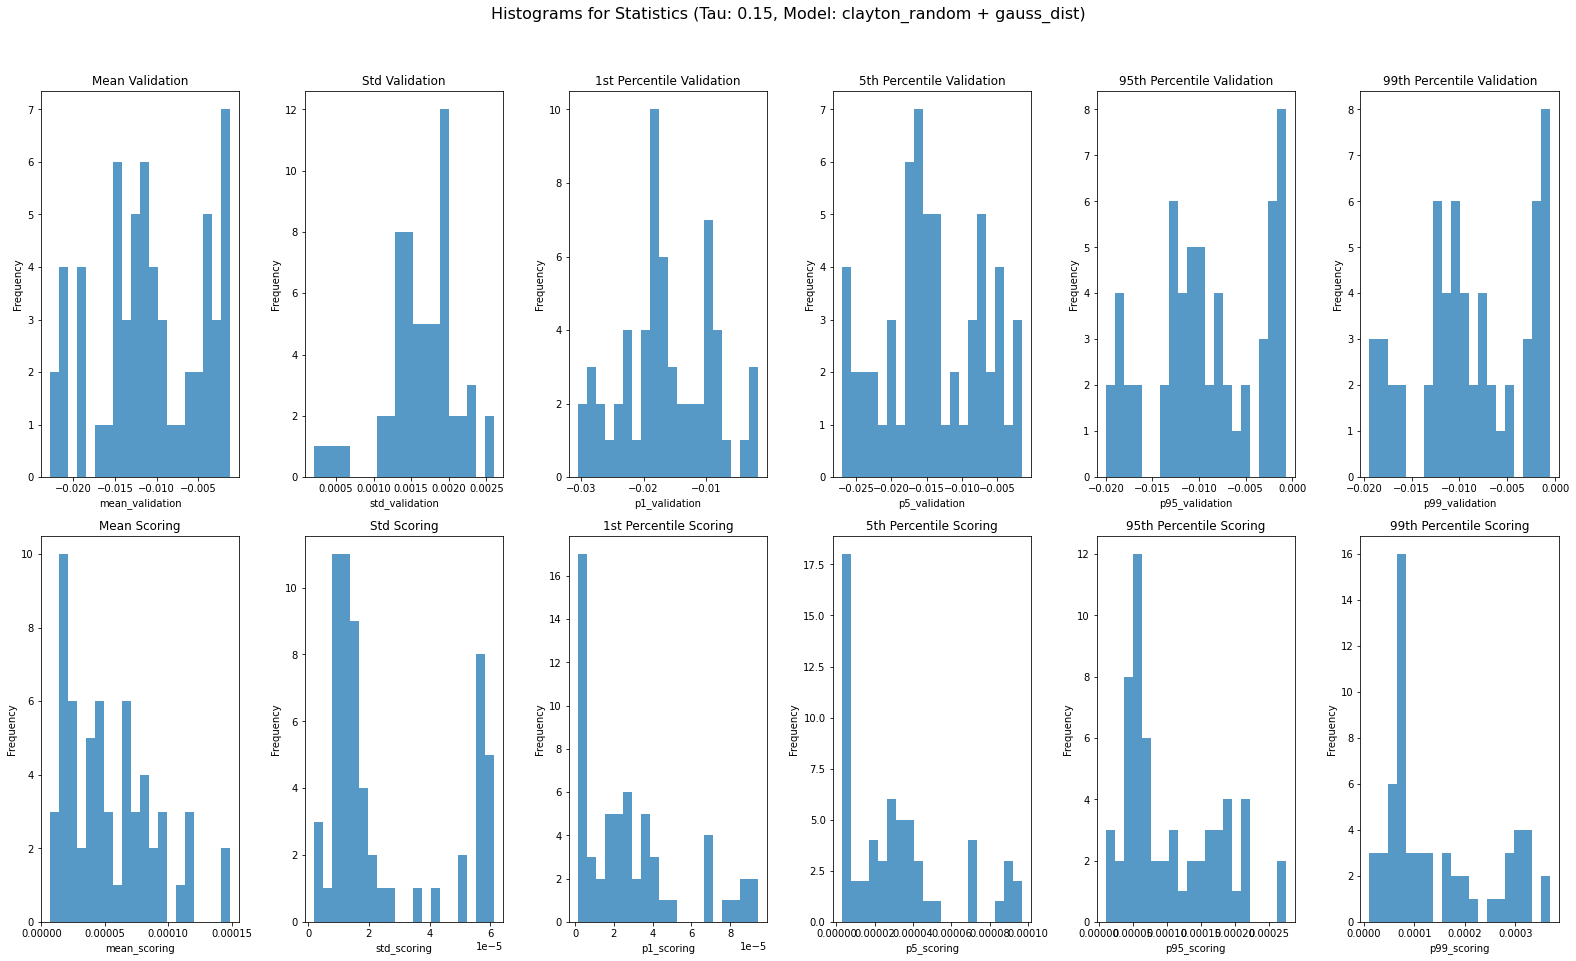

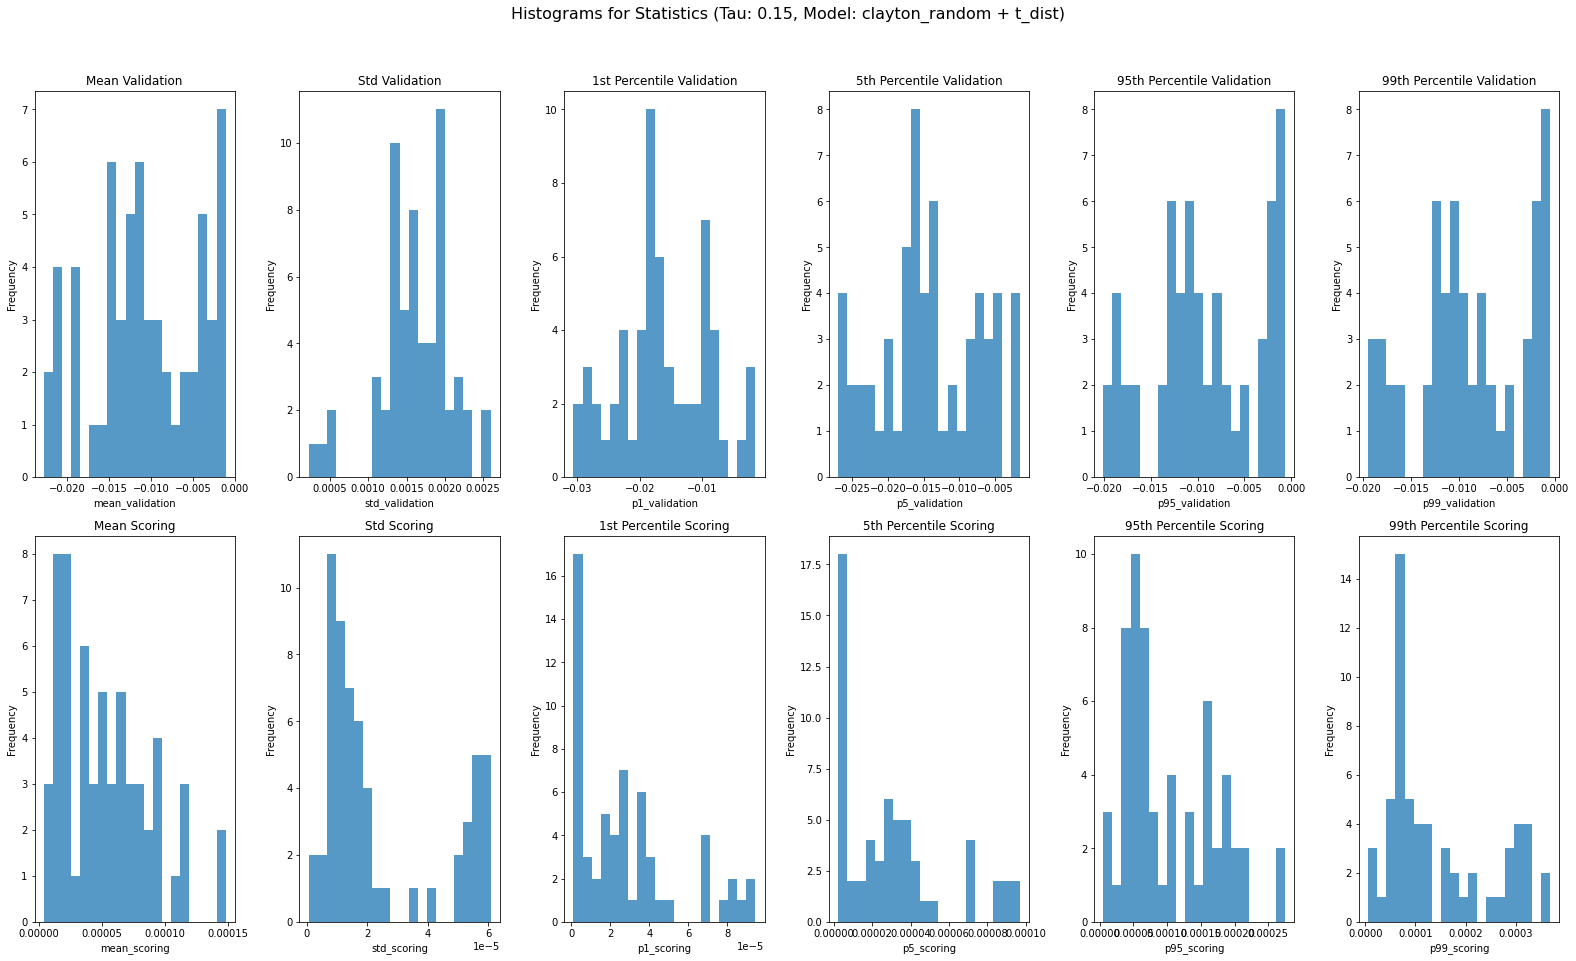

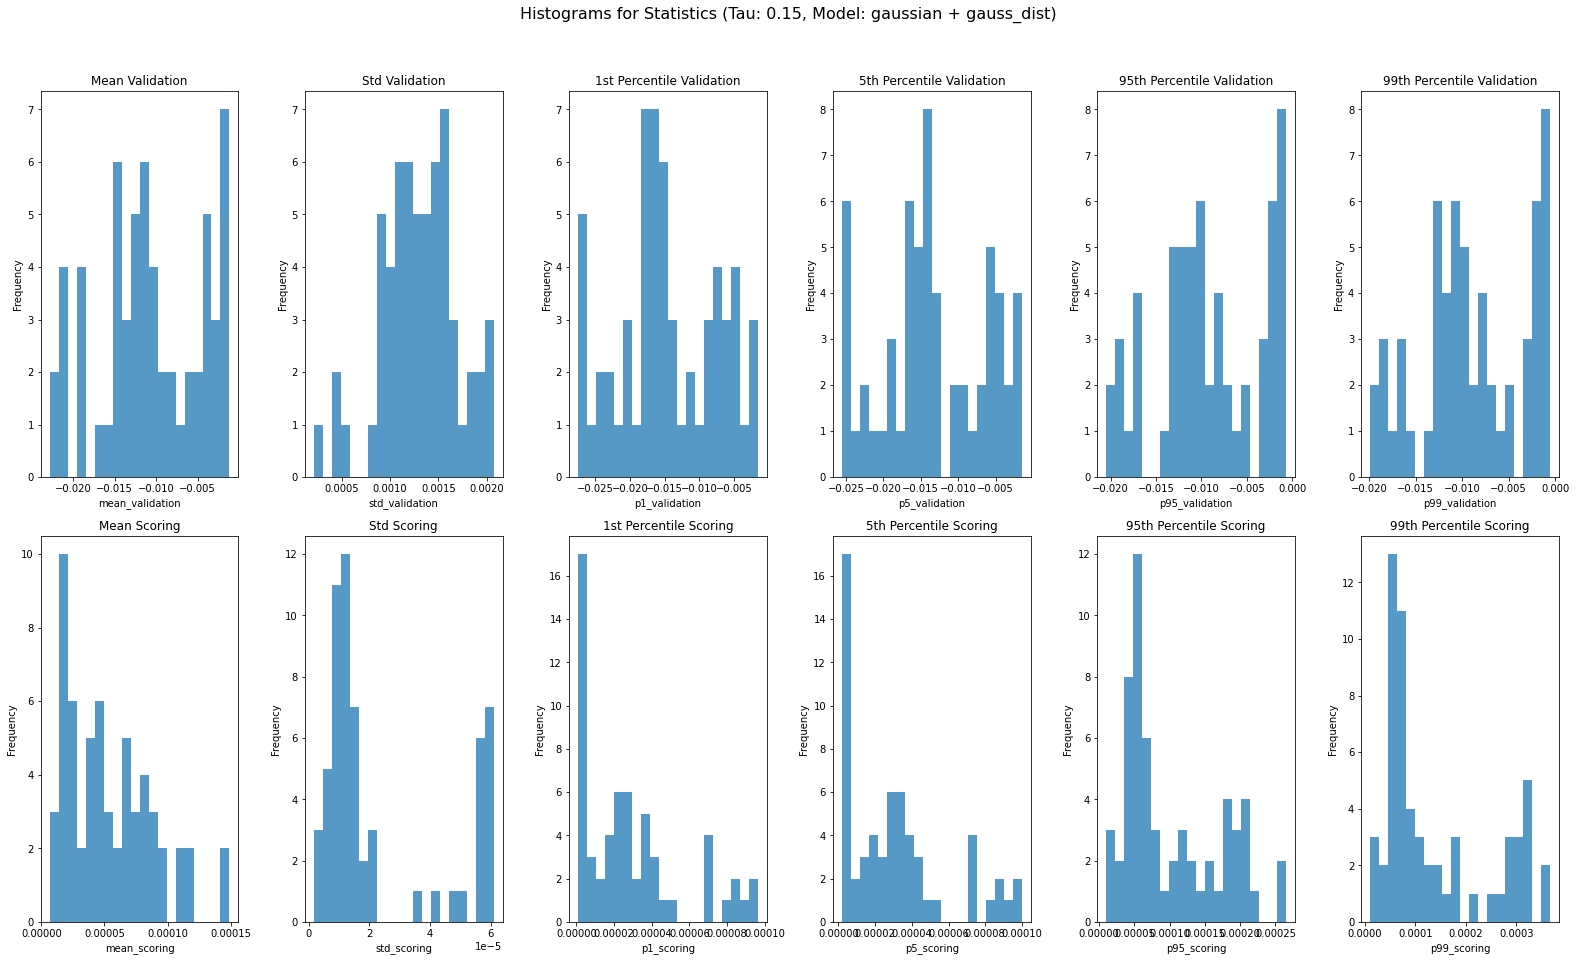

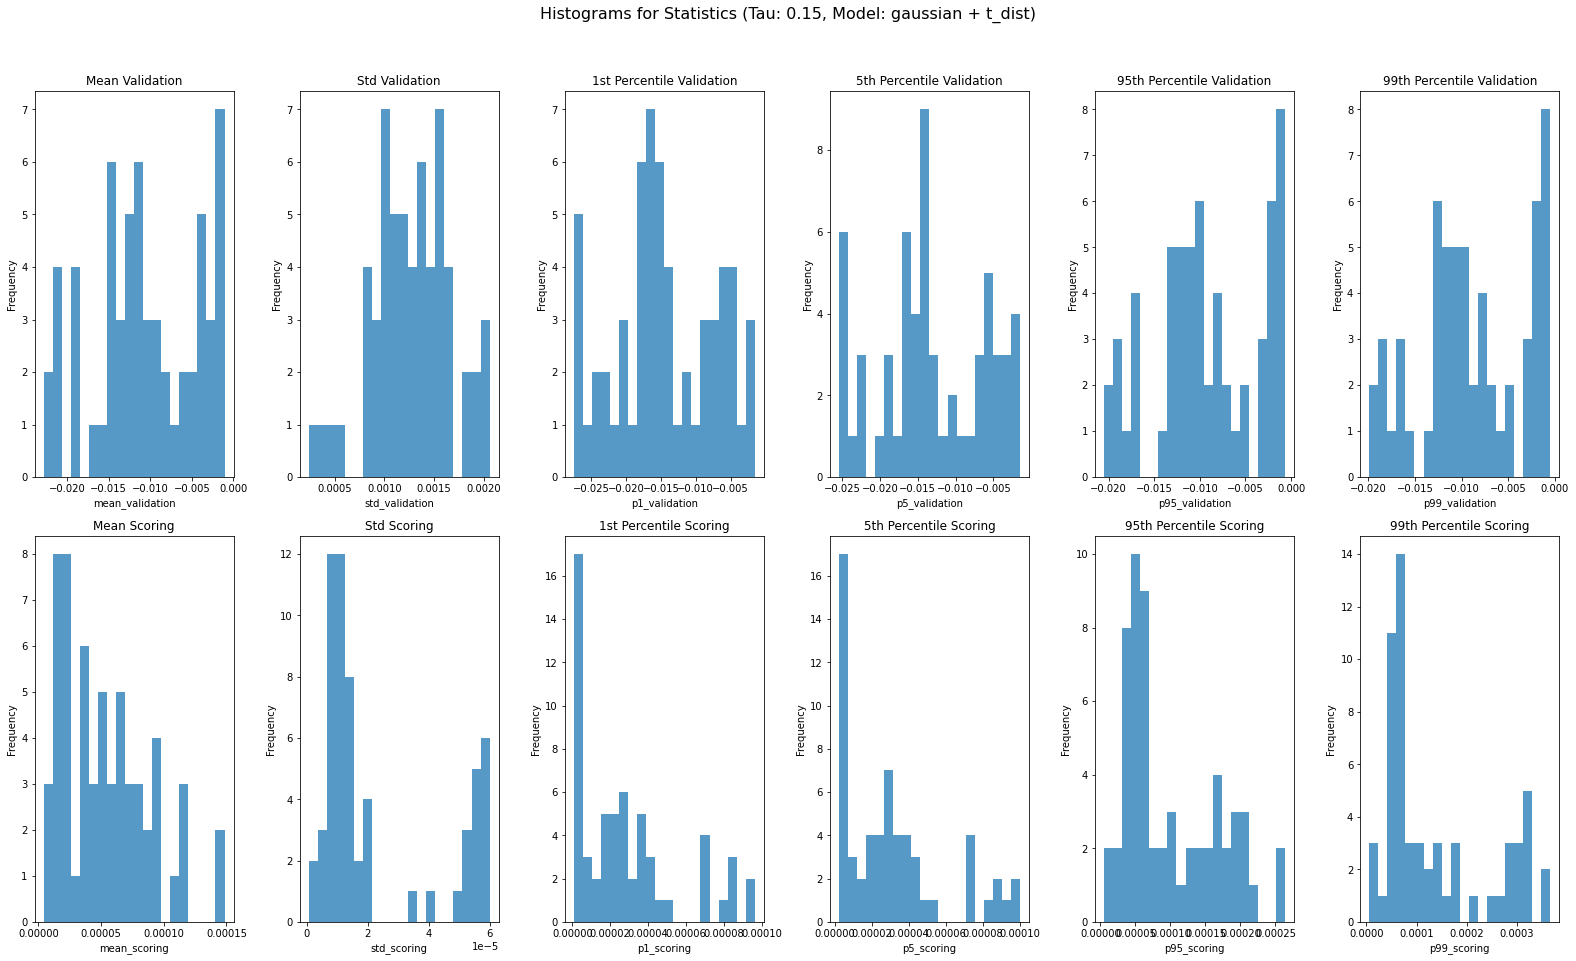

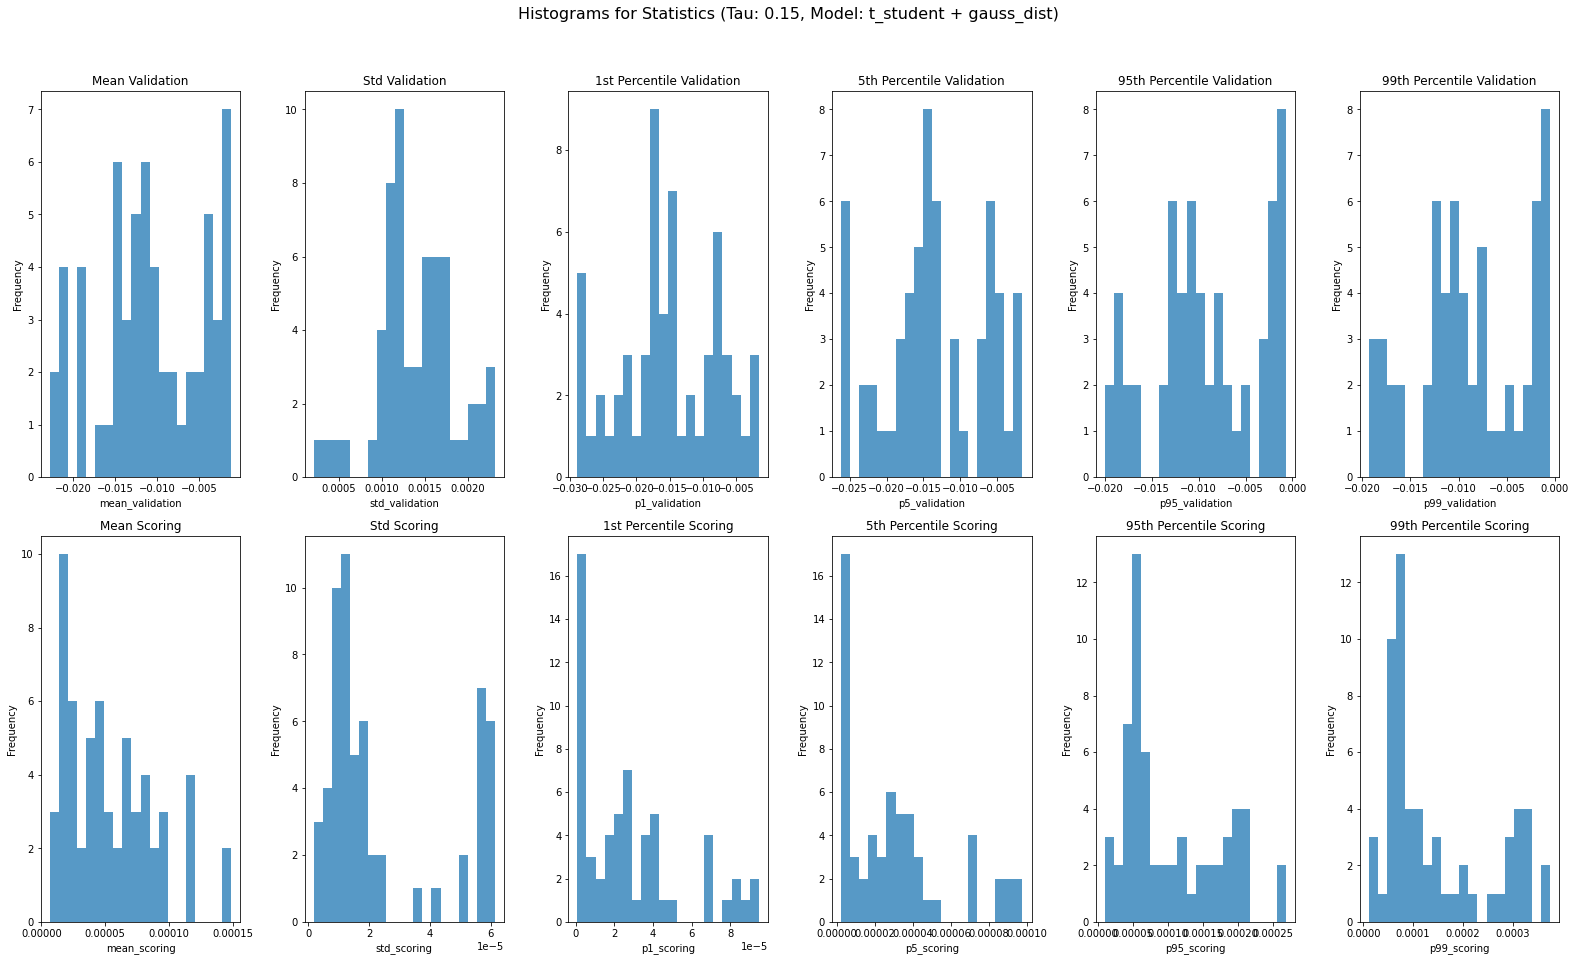

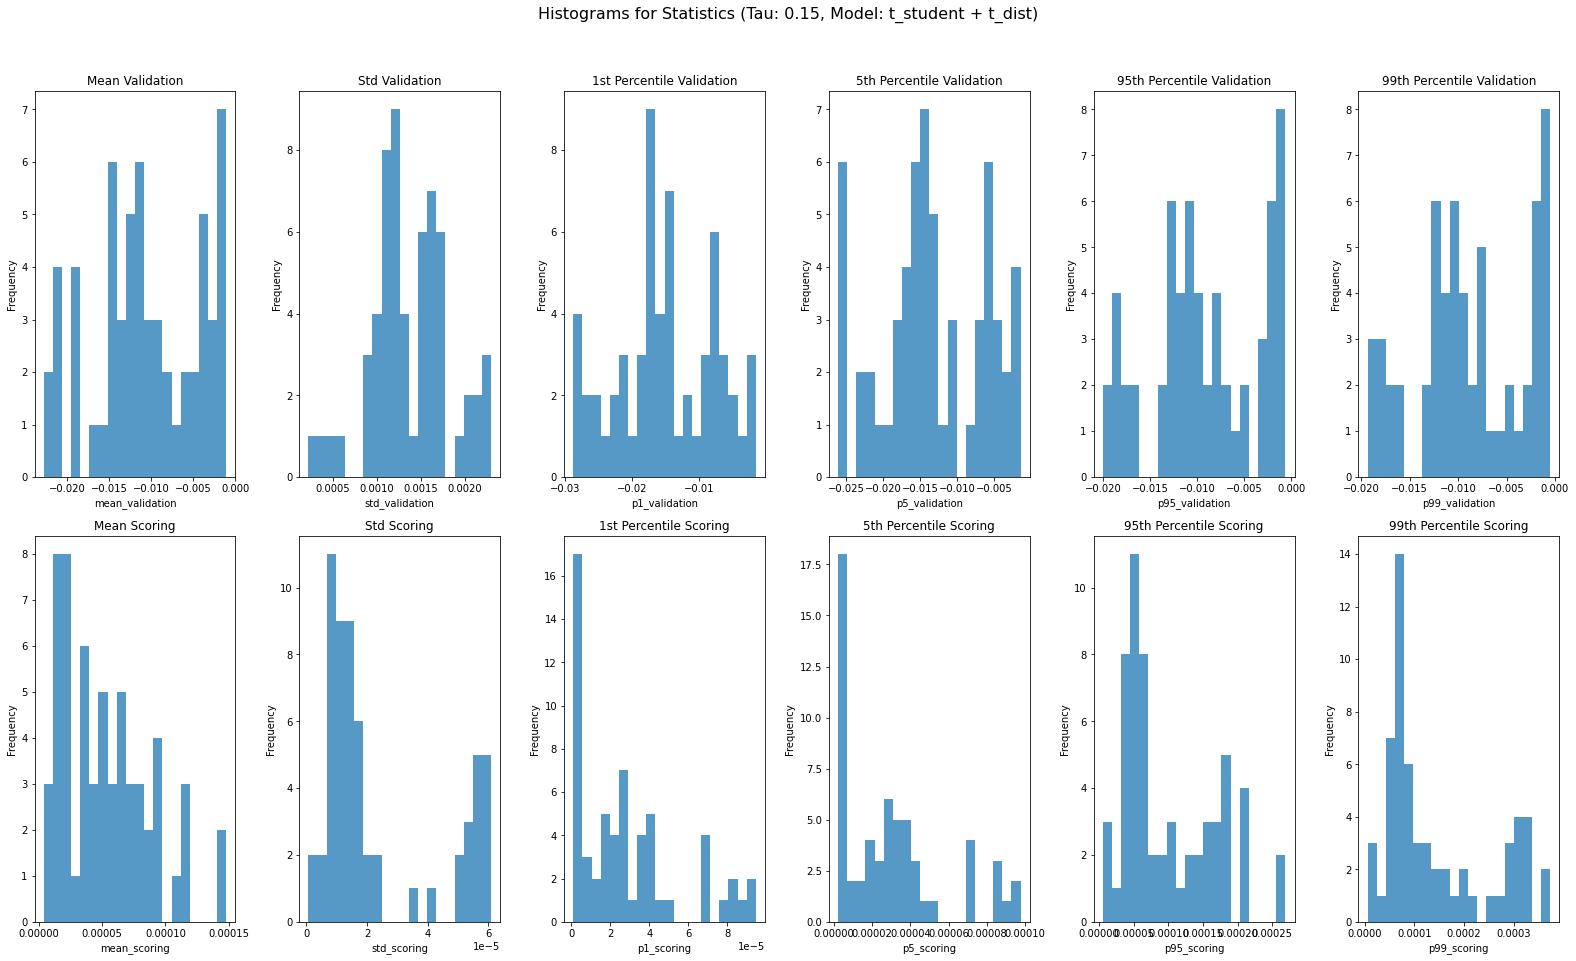

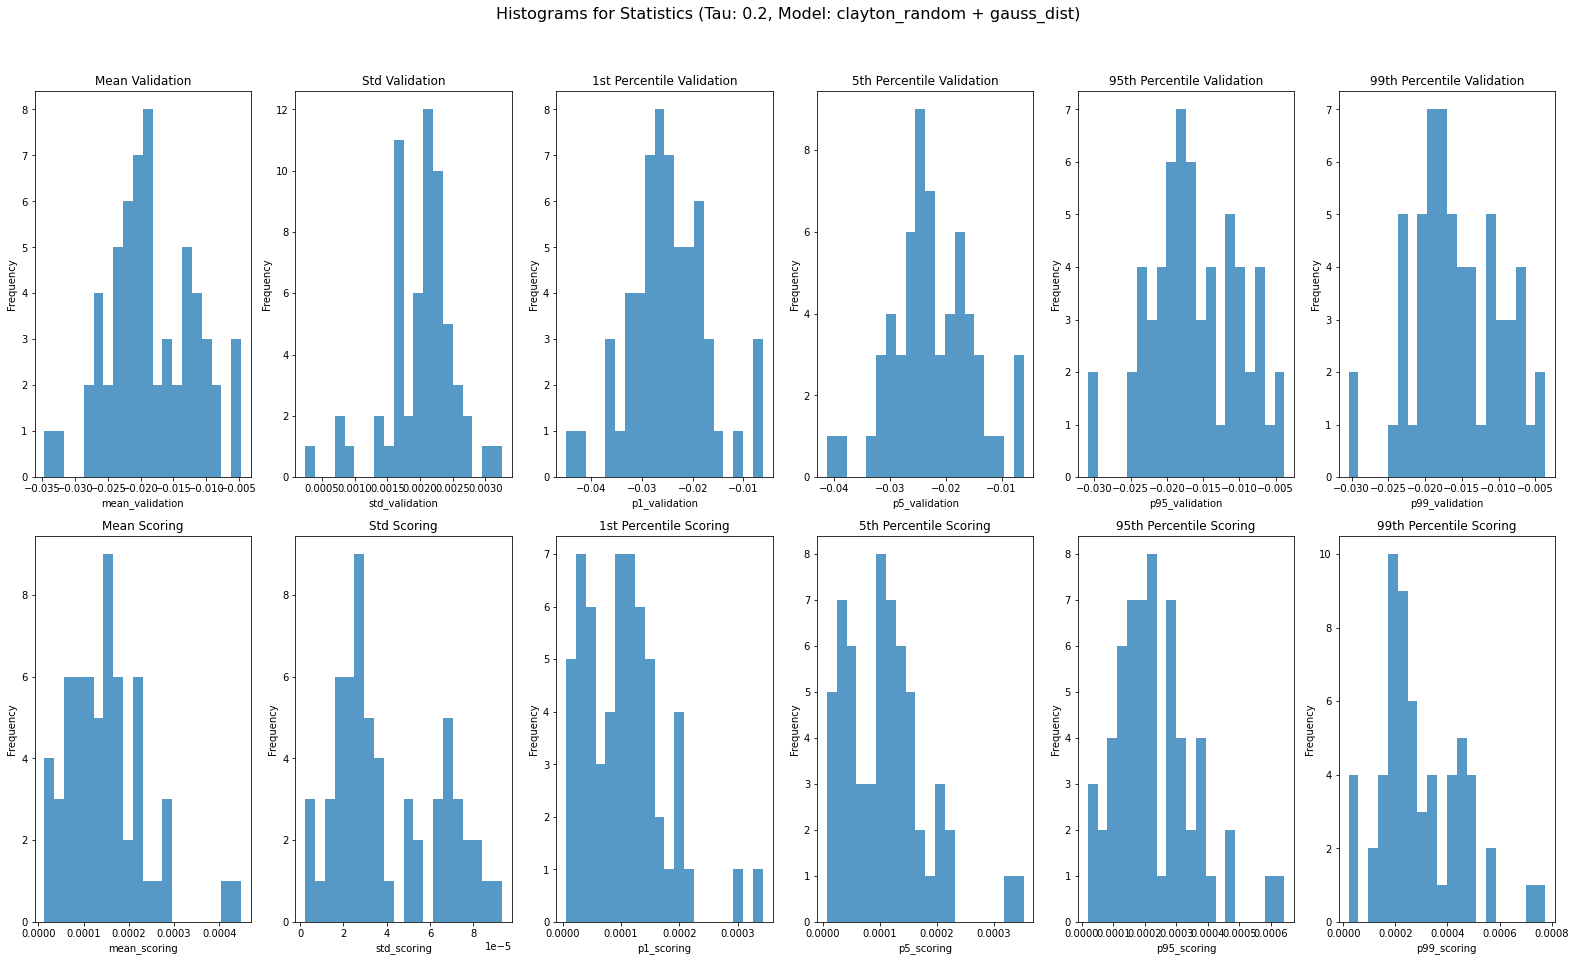

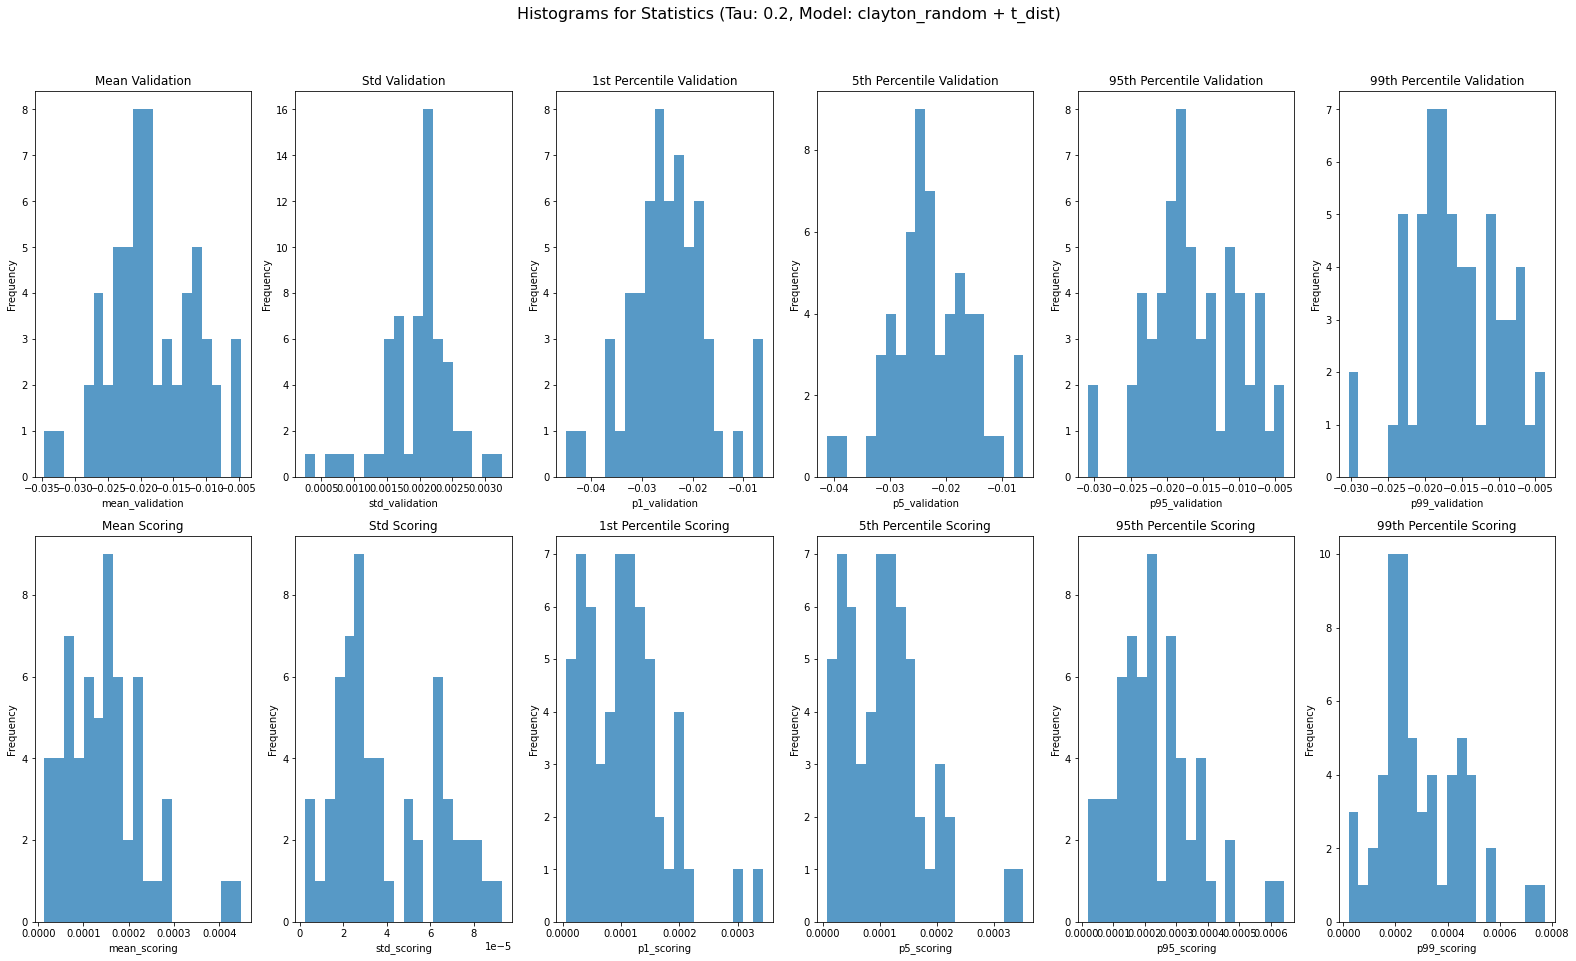

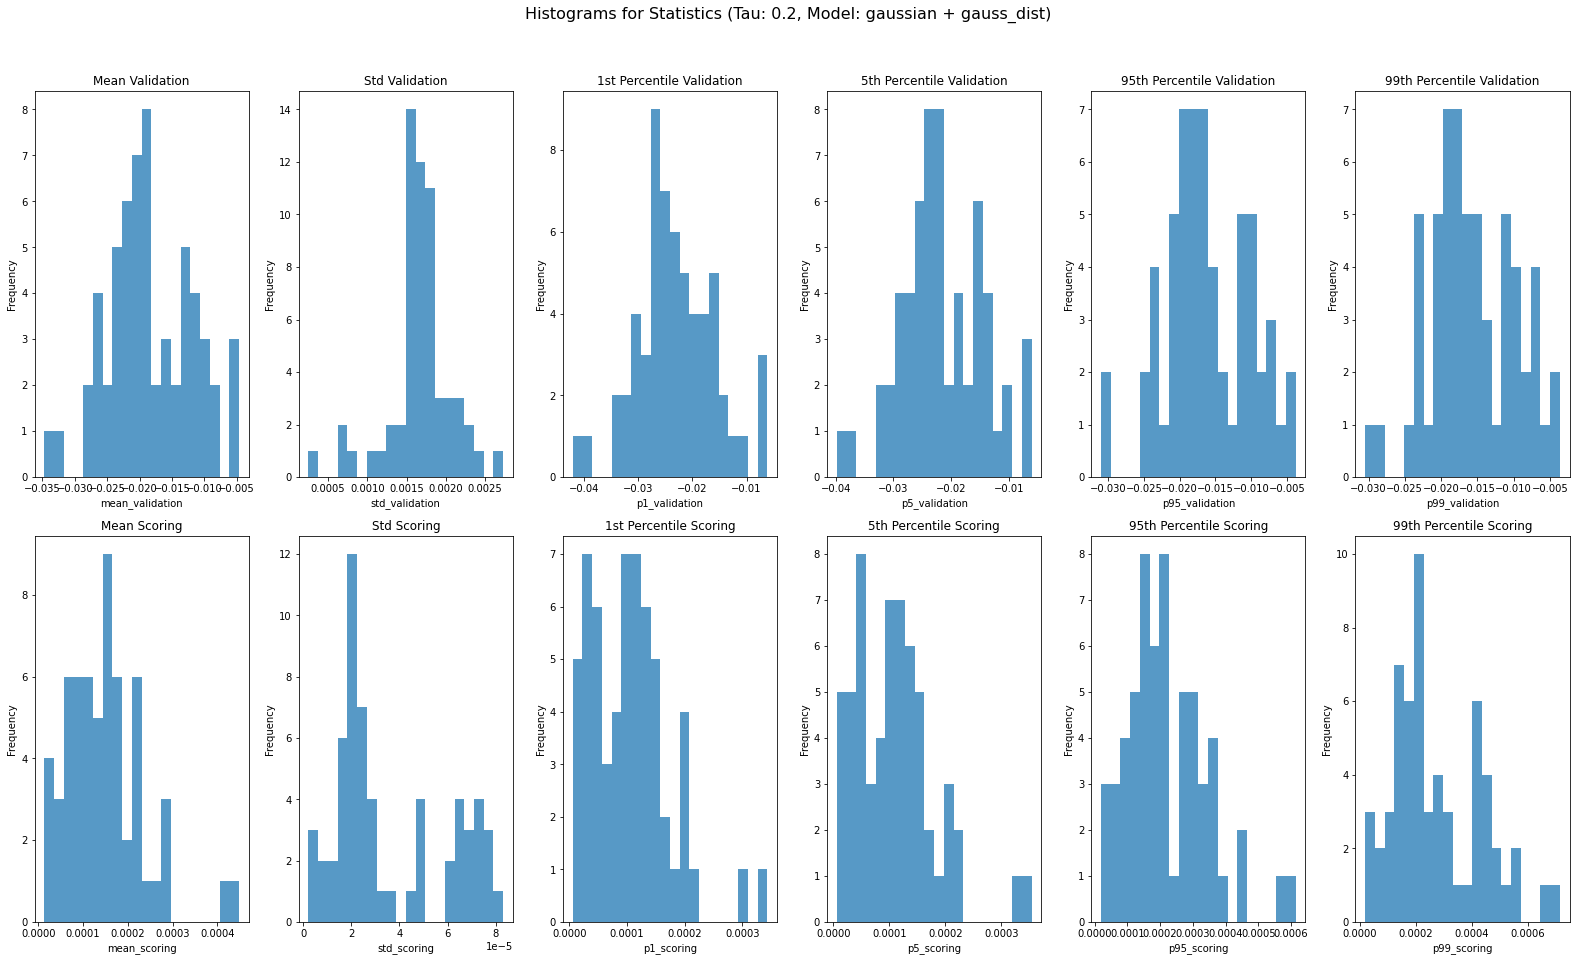

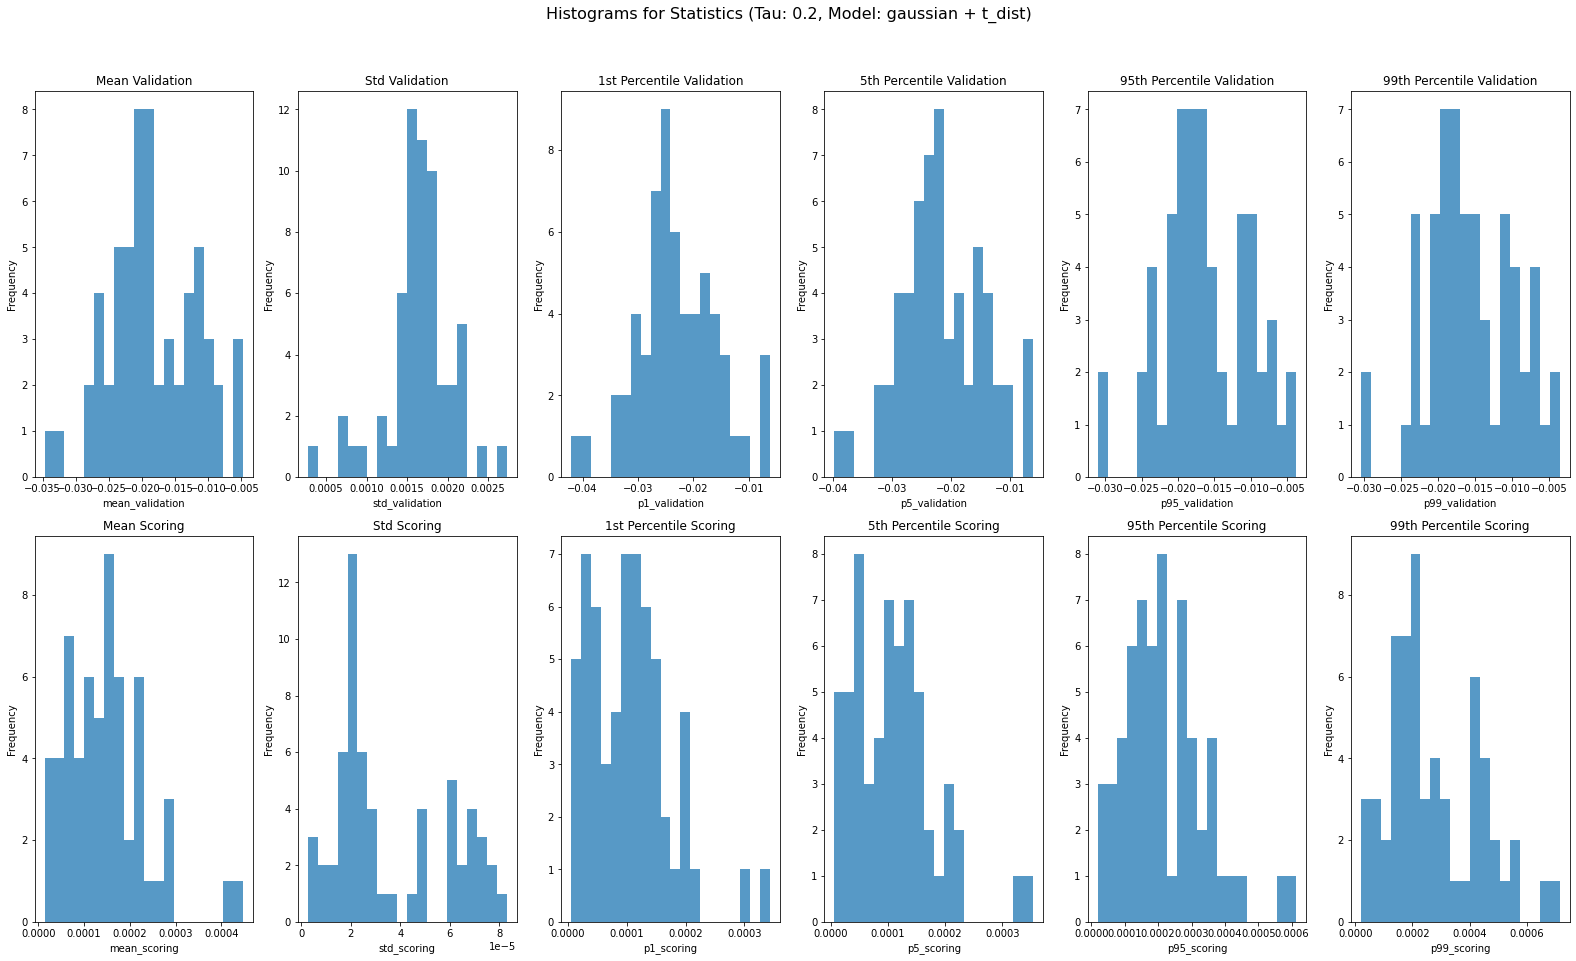

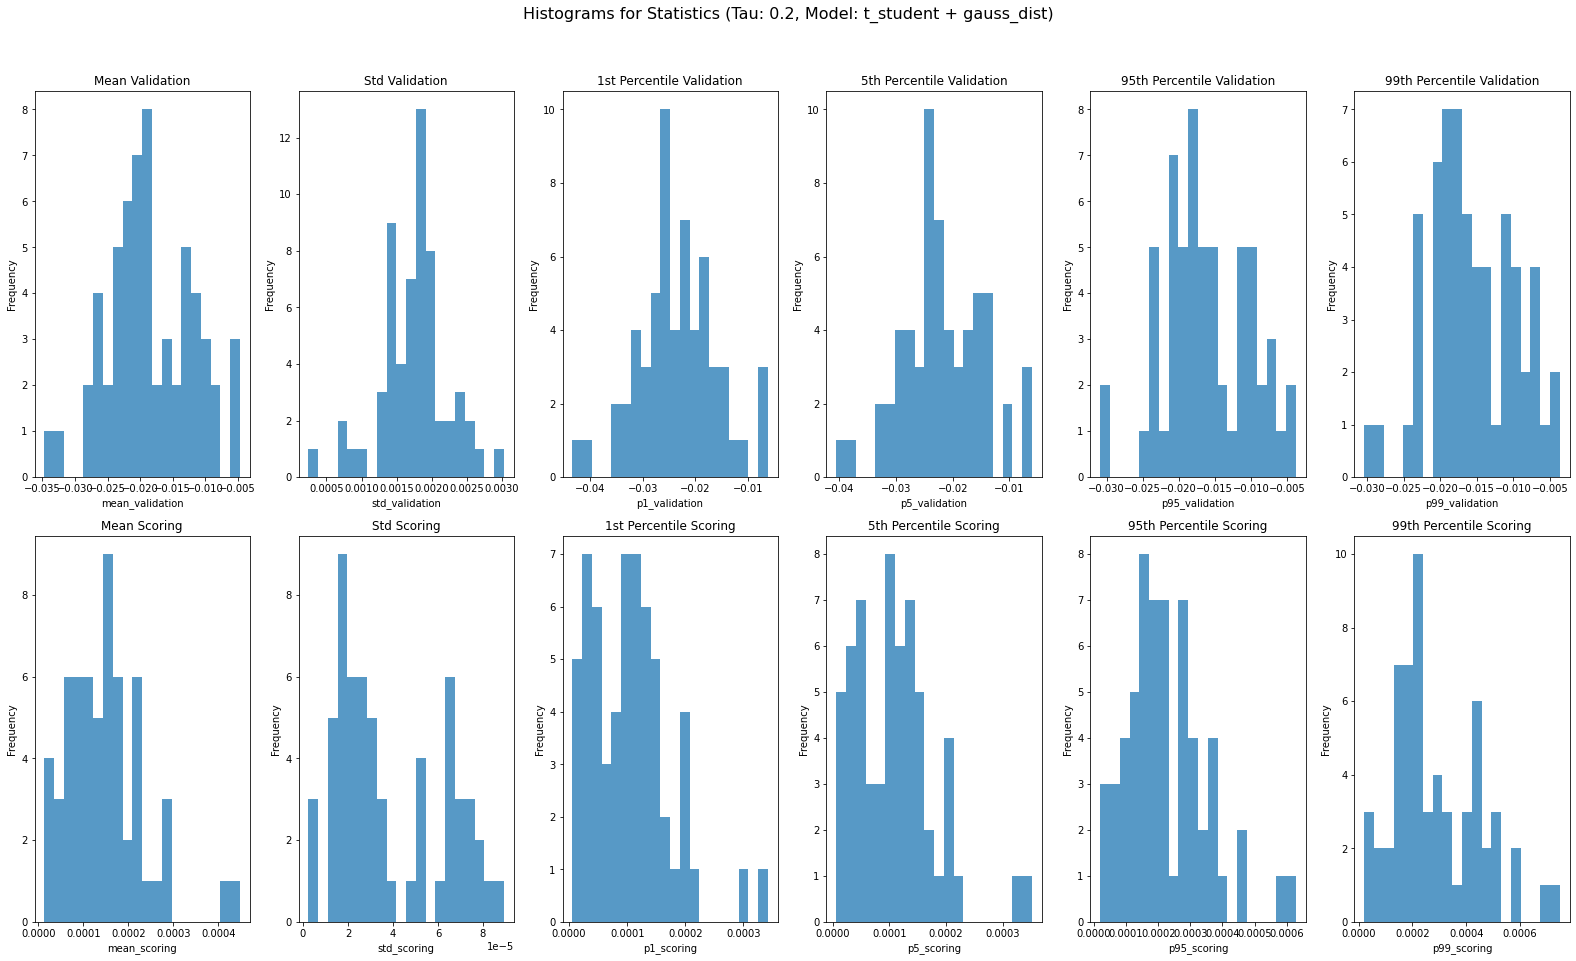

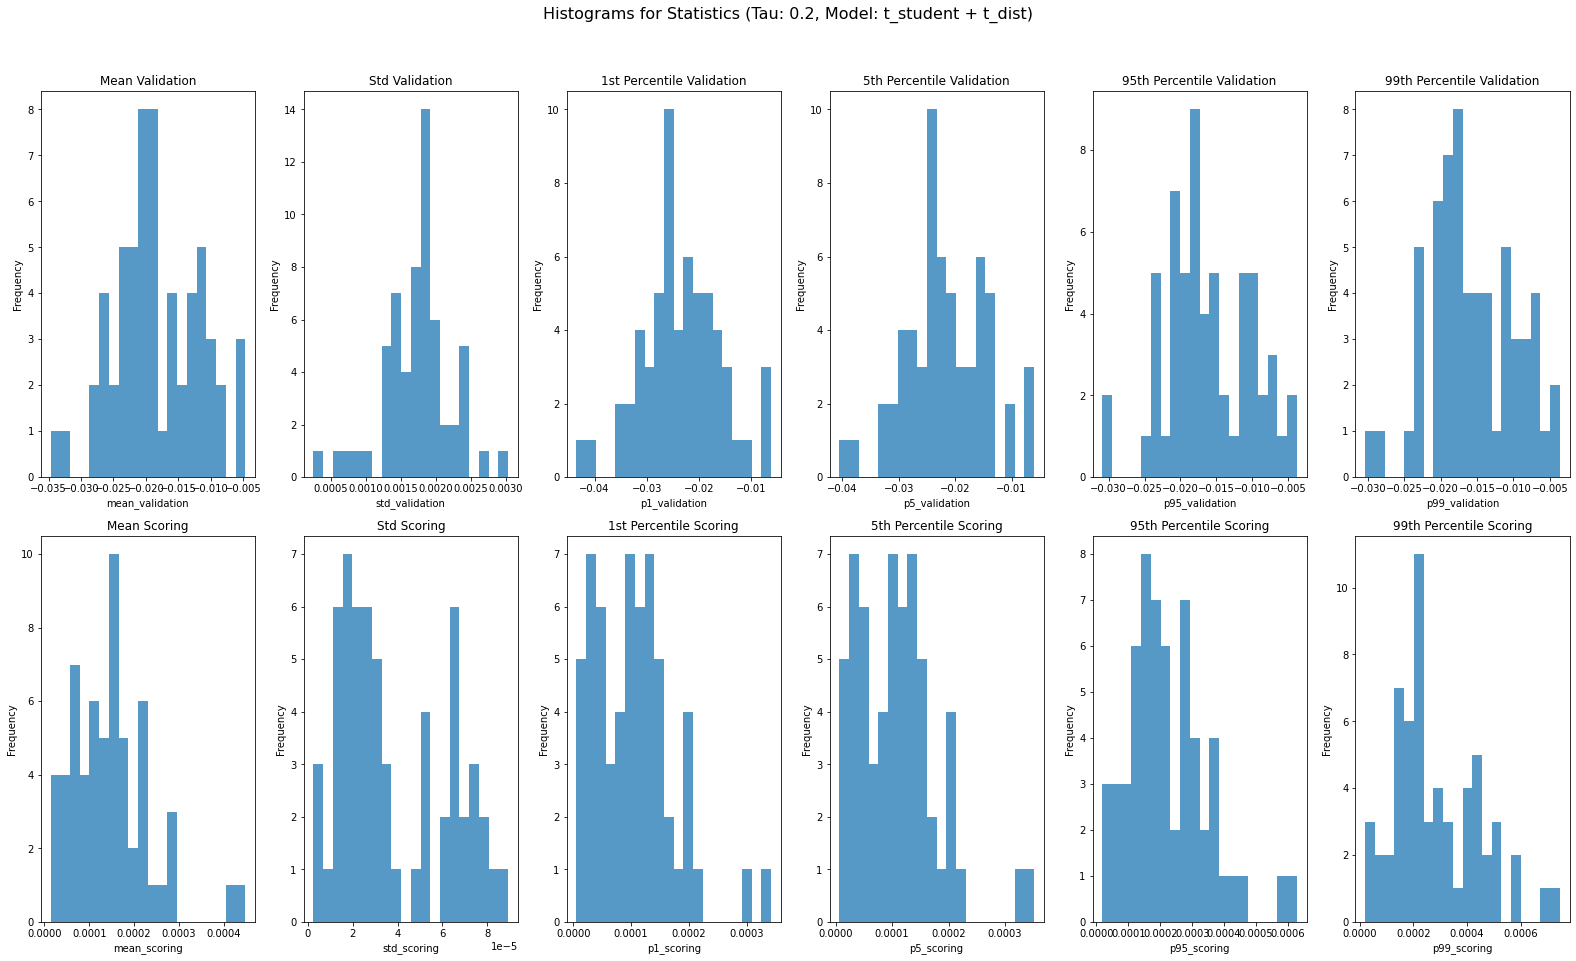

In [62]:
import matplotlib.pyplot as plt

unique_models = [(copula, dist) for copula in copulas for dist in distributions]

for tau_idx, tau_data in enumerate(all_tau_dfs):
    for model_comb in unique_models:
        model_data = []

        for model_df in tau_data:
            if not model_df.empty:
                filtered_df = model_df[(model_df['Copula'] == model_comb[0]) & (model_df['Distribution'] == model_comb[1])]
                if not filtered_df.empty:
                    model_data.append(filtered_df)

        if model_data:
            combined_df = pd.concat(model_data, ignore_index=True)

            if not combined_df.empty:
                fig, axes = plt.subplots(2, 6, figsize=(22, 14))
                fig.suptitle(f'Histograms for Statistics (Tau: {taus[tau_idx]}, Model: {model_comb[0]} + {model_comb[1]})', fontsize=16)

                stats = ['mean_validation', 'std_validation', 'p1_validation', 'p5_validation', 'p95_validation', 'p99_validation',
                         'mean_scoring', 'std_scoring', 'p1_scoring', 'p5_scoring', 'p95_scoring', 'p99_scoring']
                titles = ['Mean Validation', 'Std Validation', '1st Percentile Validation', '5th Percentile Validation', '95th Percentile Validation', '99th Percentile Validation',
                          'Mean Scoring', 'Std Scoring', '1st Percentile Scoring', '5th Percentile Scoring', '95th Percentile Scoring', '99th Percentile Scoring']

                for i, stat in enumerate(stats):
                    row, col = divmod(i, 6)
                    axes[row, col].hist(combined_df[stat].dropna(), bins=20, alpha=0.75)
                    axes[row, col].set_title(titles[i])
                    axes[row, col].set_xlabel(stat)
                    axes[row, col].set_ylabel('Frequency')

                plt.tight_layout(rect=[0, 0.03, 1, 0.95])
                plt.show()



In [117]:
def evaluate_model_performance_by_tau(all_tau_dfs, unique_models, taus):
    tau_evaluation_results = {}

    for tau_idx, tau_value in enumerate(taus):
        evaluation_results = []
        tau_data = all_tau_dfs[tau_idx]

        for model_comb in unique_models:
            model_data = []

            for model_df in tau_data:
                if not model_df.empty:
                    filtered_df = model_df[(model_df['Copula'] == model_comb[0]) & (model_df['Distribution'] == model_comb[1])]
                    if not filtered_df.empty:
                        model_data.append(filtered_df)

            if model_data:
                combined_df = pd.concat(model_data, ignore_index=True)
                # mean_val = combined_df['mean_validation'].mean()
                # std_val = combined_df['mean_validation'].std()
                # p5_val = np.percentile(combined_df['mean_validation'], 5)
                # p50_val = np.percentile(combined_df['mean_validation'], 50)  # Median
                # p95_val = np.percentile(combined_df['mean_validation'], 95)

                mean_of_mean_val = combined_df['mean_validation'].mean()
                mean_of_std_val = combined_df['std_validation'].mean()
                mean_of_p5_val = combined_df['p5_validation'].mean()
                mean_of_p95_val = combined_df['p95_validation'].mean()

                mean_of_mean_sco = combined_df['mean_scoring'].mean()
                mean_of_std_sco = combined_df['std_scoring'].mean()
                mean_of_p5_sco = combined_df['p5_scoring'].mean()
                mean_of_p95_sco = combined_df['p95_scoring'].mean()

                evaluation_results.append({
                    'Model': f'{model_comb[0]} + {model_comb[1]}',
                    'Mean_Val': mean_of_mean_val,
                    'Std_Val': mean_of_std_val,
                    'P5_Val': mean_of_p5_val,
                    'P95_Val': mean_of_p95_val,
                    'Mean_Sco': mean_of_mean_sco,
                    'Std_Sco': mean_of_std_sco,
                    'P5_Sco': mean_of_p5_sco,
                    'P95_Sco': mean_of_p95_sco,
                })

        evaluation_df = pd.DataFrame(evaluation_results)
        evaluation_df = evaluation_df.sort_values(by='Mean_Val')
        tau_evaluation_results[tau_value] = evaluation_df

    return tau_evaluation_results



In [118]:
# Usage:
tau_evaluation_results = evaluate_model_performance_by_tau(all_tau_dfs, unique_models, taus)



In [130]:
tau_evaluation_results[0.0005]


Model  Mean_Val   Std_Val    P5_Val   P95_Val  \
0  clayton_random + gauss_dist -0.000054  0.000113 -0.000149 -0.000027   
2        gaussian + gauss_dist -0.000054  0.000105 -0.000154 -0.000028   
4       t_student + gauss_dist -0.000053  0.000106 -0.000149 -0.000028   
1      clayton_random + t_dist -0.000053  0.000113 -0.000137 -0.000027   
3            gaussian + t_dist -0.000053  0.000104 -0.000144 -0.000028   
5           t_student + t_dist -0.000053  0.000106 -0.000138 -0.000028   

   Mean_Sco       Std_Sco    P5_Sco   P95_Sco  
0  0.000002  2.130245e-07  0.000002  0.000003  
2  0.000002  1.936066e-07  0.000002  0.000003  
4  0.000002  2.007847e-07  0.000002  0.000003  
1  0.000002  2.033628e-07  0.000002  0.000003  
3  0.000002  1.860557e-07  0.000002  0.000003  
5  0.000002  1.932050e-07  0.000002  0.000003

In [127]:
tau_evaluation_results[0.001]

Model  Mean_Val   Std_Val    P5_Val   P95_Val  \
0  clayton_random + gauss_dist -0.000084  0.000116 -0.000186 -0.000054   
2        gaussian + gauss_dist -0.000084  0.000108 -0.000191 -0.000055   
4       t_student + gauss_dist -0.000083  0.000109 -0.000186 -0.000054   
1      clayton_random + t_dist -0.000083  0.000116 -0.000175 -0.000054   
3            gaussian + t_dist -0.000083  0.000107 -0.000181 -0.000055   
5           t_student + t_dist -0.000082  0.000109 -0.000176 -0.000055   

   Mean_Sco       Std_Sco    P5_Sco   P95_Sco  
0  0.000004  4.227837e-07  0.000004  0.000005  
2  0.000004  3.841893e-07  0.000004  0.000005  
4  0.000004  3.986591e-07  0.000004  0.000005  
1  0.000004  4.036508e-07  0.000004  0.000005  
3  0.000004  3.692667e-07  0.000004  0.000005  
5  0.000004  3.836527e-07  0.000004  0.000005

In [126]:
tau_evaluation_results[0.002]

Model  Mean_Val   Std_Val    P5_Val   P95_Val  \
0  clayton_random + gauss_dist -0.000142  0.000124 -0.000259 -0.000105   
2        gaussian + gauss_dist -0.000142  0.000116 -0.000264 -0.000107   
4       t_student + gauss_dist -0.000141  0.000117 -0.000259 -0.000106   
1      clayton_random + t_dist -0.000141  0.000124 -0.000248 -0.000106   
3            gaussian + t_dist -0.000141  0.000115 -0.000254 -0.000107   
5           t_student + t_dist -0.000141  0.000117 -0.000249 -0.000107   

   Mean_Sco       Std_Sco    P5_Sco  P95_Sco  
0  0.000008  8.348264e-07  0.000007  0.00001  
2  0.000008  7.595991e-07  0.000007  0.00001  
4  0.000008  7.880162e-07  0.000007  0.00001  
1  0.000008  7.970313e-07  0.000007  0.00001  
3  0.000008  7.300078e-07  0.000007  0.00001  
5  0.000008  7.582439e-07  0.000007  0.00001

In [125]:
tau_evaluation_results[0.005]

Model  Mean_Val   Std_Val    P5_Val   P95_Val  \
0  clayton_random + gauss_dist -0.000302  0.000141 -0.000468 -0.000245   
2        gaussian + gauss_dist -0.000302  0.000129 -0.000468 -0.000249   
4       t_student + gauss_dist -0.000301  0.000133 -0.000468 -0.000248   
1      clayton_random + t_dist -0.000301  0.000141 -0.000457 -0.000246   
3            gaussian + t_dist -0.000301  0.000128 -0.000459 -0.000249   
5           t_student + t_dist -0.000301  0.000132 -0.000458 -0.000248   

   Mean_Sco   Std_Sco    P5_Sco   P95_Sco  
0  0.000018  0.000002  0.000015  0.000022  
2  0.000018  0.000002  0.000016  0.000021  
4  0.000018  0.000002  0.000016  0.000022  
1  0.000018  0.000002  0.000015  0.000021  
3  0.000018  0.000002  0.000016  0.000021  
5  0.000018  0.000002  0.000016  0.000021

In [124]:
tau_evaluation_results[0.01]

Model  Mean_Val   Std_Val    P5_Val   P95_Val  \
0  clayton_random + gauss_dist -0.000531  0.000171 -0.000771 -0.000440   
2        gaussian + gauss_dist -0.000531  0.000149 -0.000771 -0.000446   
1      clayton_random + t_dist -0.000531  0.000172 -0.000761 -0.000442   
4       t_student + gauss_dist -0.000531  0.000158 -0.000777 -0.000445   
3            gaussian + t_dist -0.000531  0.000149 -0.000765 -0.000448   
5           t_student + t_dist -0.000530  0.000159 -0.000769 -0.000446   

   Mean_Sco   Std_Sco    P5_Sco   P95_Sco  
0   0.00003  0.000004  0.000025  0.000036  
2   0.00003  0.000003  0.000025  0.000036  
1   0.00003  0.000003  0.000025  0.000036  
4   0.00003  0.000003  0.000025  0.000036  
3   0.00003  0.000003  0.000026  0.000035  
5   0.00003  0.000003  0.000025  0.000036

In [123]:
tau_evaluation_results[0.02]

Model  Mean_Val   Std_Val    P5_Val   P95_Val  \
0  clayton_random + gauss_dist -0.000970  0.000245 -0.001349 -0.000799   
2        gaussian + gauss_dist -0.000970  0.000201 -0.001350 -0.000811   
4       t_student + gauss_dist -0.000969  0.000220 -0.001367 -0.000807   
1      clayton_random + t_dist -0.000967  0.000246 -0.001331 -0.000803   
3            gaussian + t_dist -0.000967  0.000201 -0.001336 -0.000814   
5           t_student + t_dist -0.000966  0.000220 -0.001351 -0.000810   

   Mean_Sco   Std_Sco    P5_Sco   P95_Sco  
0  0.000041  0.000006  0.000033  0.000052  
2  0.000041  0.000005  0.000034  0.000051  
4  0.000041  0.000006  0.000034  0.000052  
1  0.000041  0.000006  0.000033  0.000051  
3  0.000041  0.000005  0.000034  0.000051  
5  0.000041  0.000005  0.000034  0.000051

In [122]:
tau_evaluation_results[0.05]

Model  Mean_Val   Std_Val    P5_Val   P95_Val  \
0  clayton_random + gauss_dist -0.001972  0.000505 -0.002909 -0.001538   
2        gaussian + gauss_dist -0.001971  0.000390 -0.002771 -0.001565   
4       t_student + gauss_dist -0.001970  0.000440 -0.002860 -0.001551   
1      clayton_random + t_dist -0.001959  0.000498 -0.002851 -0.001542   
3            gaussian + t_dist -0.001959  0.000384 -0.002744 -0.001568   
5           t_student + t_dist -0.001958  0.000433 -0.002824 -0.001554   

   Mean_Sco   Std_Sco    P5_Sco   P95_Sco  
0  0.000037  0.000010  0.000024  0.000055  
2  0.000037  0.000009  0.000026  0.000054  
4  0.000037  0.000009  0.000025  0.000055  
1  0.000036  0.000009  0.000025  0.000053  
3  0.000036  0.000008  0.000026  0.000052  
5  0.000036  0.000009  0.000026  0.000053

In [121]:
tau_evaluation_results[0.1]

Model  Mean_Val   Std_Val    P5_Val   P95_Val  \
0  clayton_random + gauss_dist -0.004109  0.001089 -0.006381 -0.003112   
2        gaussian + gauss_dist -0.004109  0.000825 -0.005763 -0.003153   
4       t_student + gauss_dist -0.004106  0.000926 -0.005981 -0.003114   
1      clayton_random + t_dist -0.004056  0.001060 -0.006235 -0.003103   
3            gaussian + t_dist -0.004056  0.000804 -0.005681 -0.003142   
5           t_student + t_dist -0.004053  0.000903 -0.005881 -0.003105   

   Mean_Sco   Std_Sco    P5_Sco   P95_Sco  
0  0.000025  0.000017  0.000009  0.000060  
2  0.000025  0.000016  0.000010  0.000059  
4  0.000025  0.000017  0.000010  0.000060  
1  0.000024  0.000016  0.000009  0.000058  
3  0.000024  0.000015  0.000010  0.000056  
5  0.000024  0.000016  0.000010  0.000058

In [120]:
tau_evaluation_results[0.15]

Model  Mean_Val   Std_Val    P5_Val   P95_Val  \
0  clayton_random + gauss_dist -0.010798  0.001637 -0.014202 -0.009079   
2        gaussian + gauss_dist -0.010798  0.001300 -0.013276 -0.009123   
4       t_student + gauss_dist -0.010795  0.001401 -0.013519 -0.009084   
1      clayton_random + t_dist -0.010740  0.001612 -0.014082 -0.009064   
3            gaussian + t_dist -0.010739  0.001280 -0.013189 -0.009105   
5           t_student + t_dist -0.010736  0.001379 -0.013423 -0.009067   

   Mean_Sco   Std_Sco    P5_Sco   P95_Sco  
0  0.000054  0.000025  0.000031  0.000105  
2  0.000054  0.000024  0.000031  0.000103  
4  0.000054  0.000025  0.000031  0.000104  
1  0.000053  0.000024  0.000031  0.000103  
3  0.000053  0.000023  0.000031  0.000100  
5  0.000053  0.000024  0.000031  0.000101

In [119]:
tau_evaluation_results[0.2]

Model  Mean_Val   Std_Val    P5_Val   P95_Val  \
0  clayton_random + gauss_dist -0.018414  0.002000 -0.022486 -0.016101   
2        gaussian + gauss_dist -0.018414  0.001670 -0.021528 -0.016133   
4       t_student + gauss_dist -0.018410  0.001753 -0.021727 -0.016101   
1      clayton_random + t_dist -0.018377  0.001977 -0.022400 -0.016104   
3            gaussian + t_dist -0.018377  0.001652 -0.021462 -0.016134   
5           t_student + t_dist -0.018373  0.001733 -0.021657 -0.016101   

   Mean_Sco   Std_Sco    P5_Sco   P95_Sco  
0  0.000149  0.000040  0.000109  0.000232  
2  0.000149  0.000036  0.000110  0.000221  
4  0.000149  0.000038  0.000109  0.000225  
1  0.000148  0.000040  0.000109  0.000230  
3  0.000148  0.000036  0.000110  0.000219  
5  0.000148  0.000038  0.000109  0.000223